In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
from clustering import compute_clusters, lag_ccf

The path where the parquet of the cases is saved:

In [7]:
PATH = 'data/cases'

In [4]:
def get_data(state, disease = 'dengue'):
    """
    Create a dataframe with the disease cases in all the cities of the state. 

    Parameters:
    -----------
    state : str
        UF name
    disease: str
        disease name options: 'dengue' or 'chik'

    Returns:
    --------
    pd.DataFrame
        Dataframe with datetime index where each colum represents the time series of cases for a city of the state
    """
    
    df = pd.read_parquet(f'{PATH}/{state}_{disease}.parquet',
                    columns = ['municipio_geocodigo', 'casos'])
    
    
    geocodes = df.municipio_geocodigo.unique()
        
    df_ = pd.DataFrame()
    
    for geo in geocodes: 
        
        df_s = df.loc[df.municipio_geocodigo == geo]
        
        df_[f'casos_{geo}'] = df_s.casos
        
        
    return df_

The cell below apply the hierarchial clusterization of the time series of dengue cases in PR. It is used just the data before 2020, to don't introduce bias in the 2023 predictions. 

/tmp/ipykernel_1373203/780518156.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/tmp/ipykernel_1373203/780518156.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/tmp/ipykernel_1373203/780518156.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

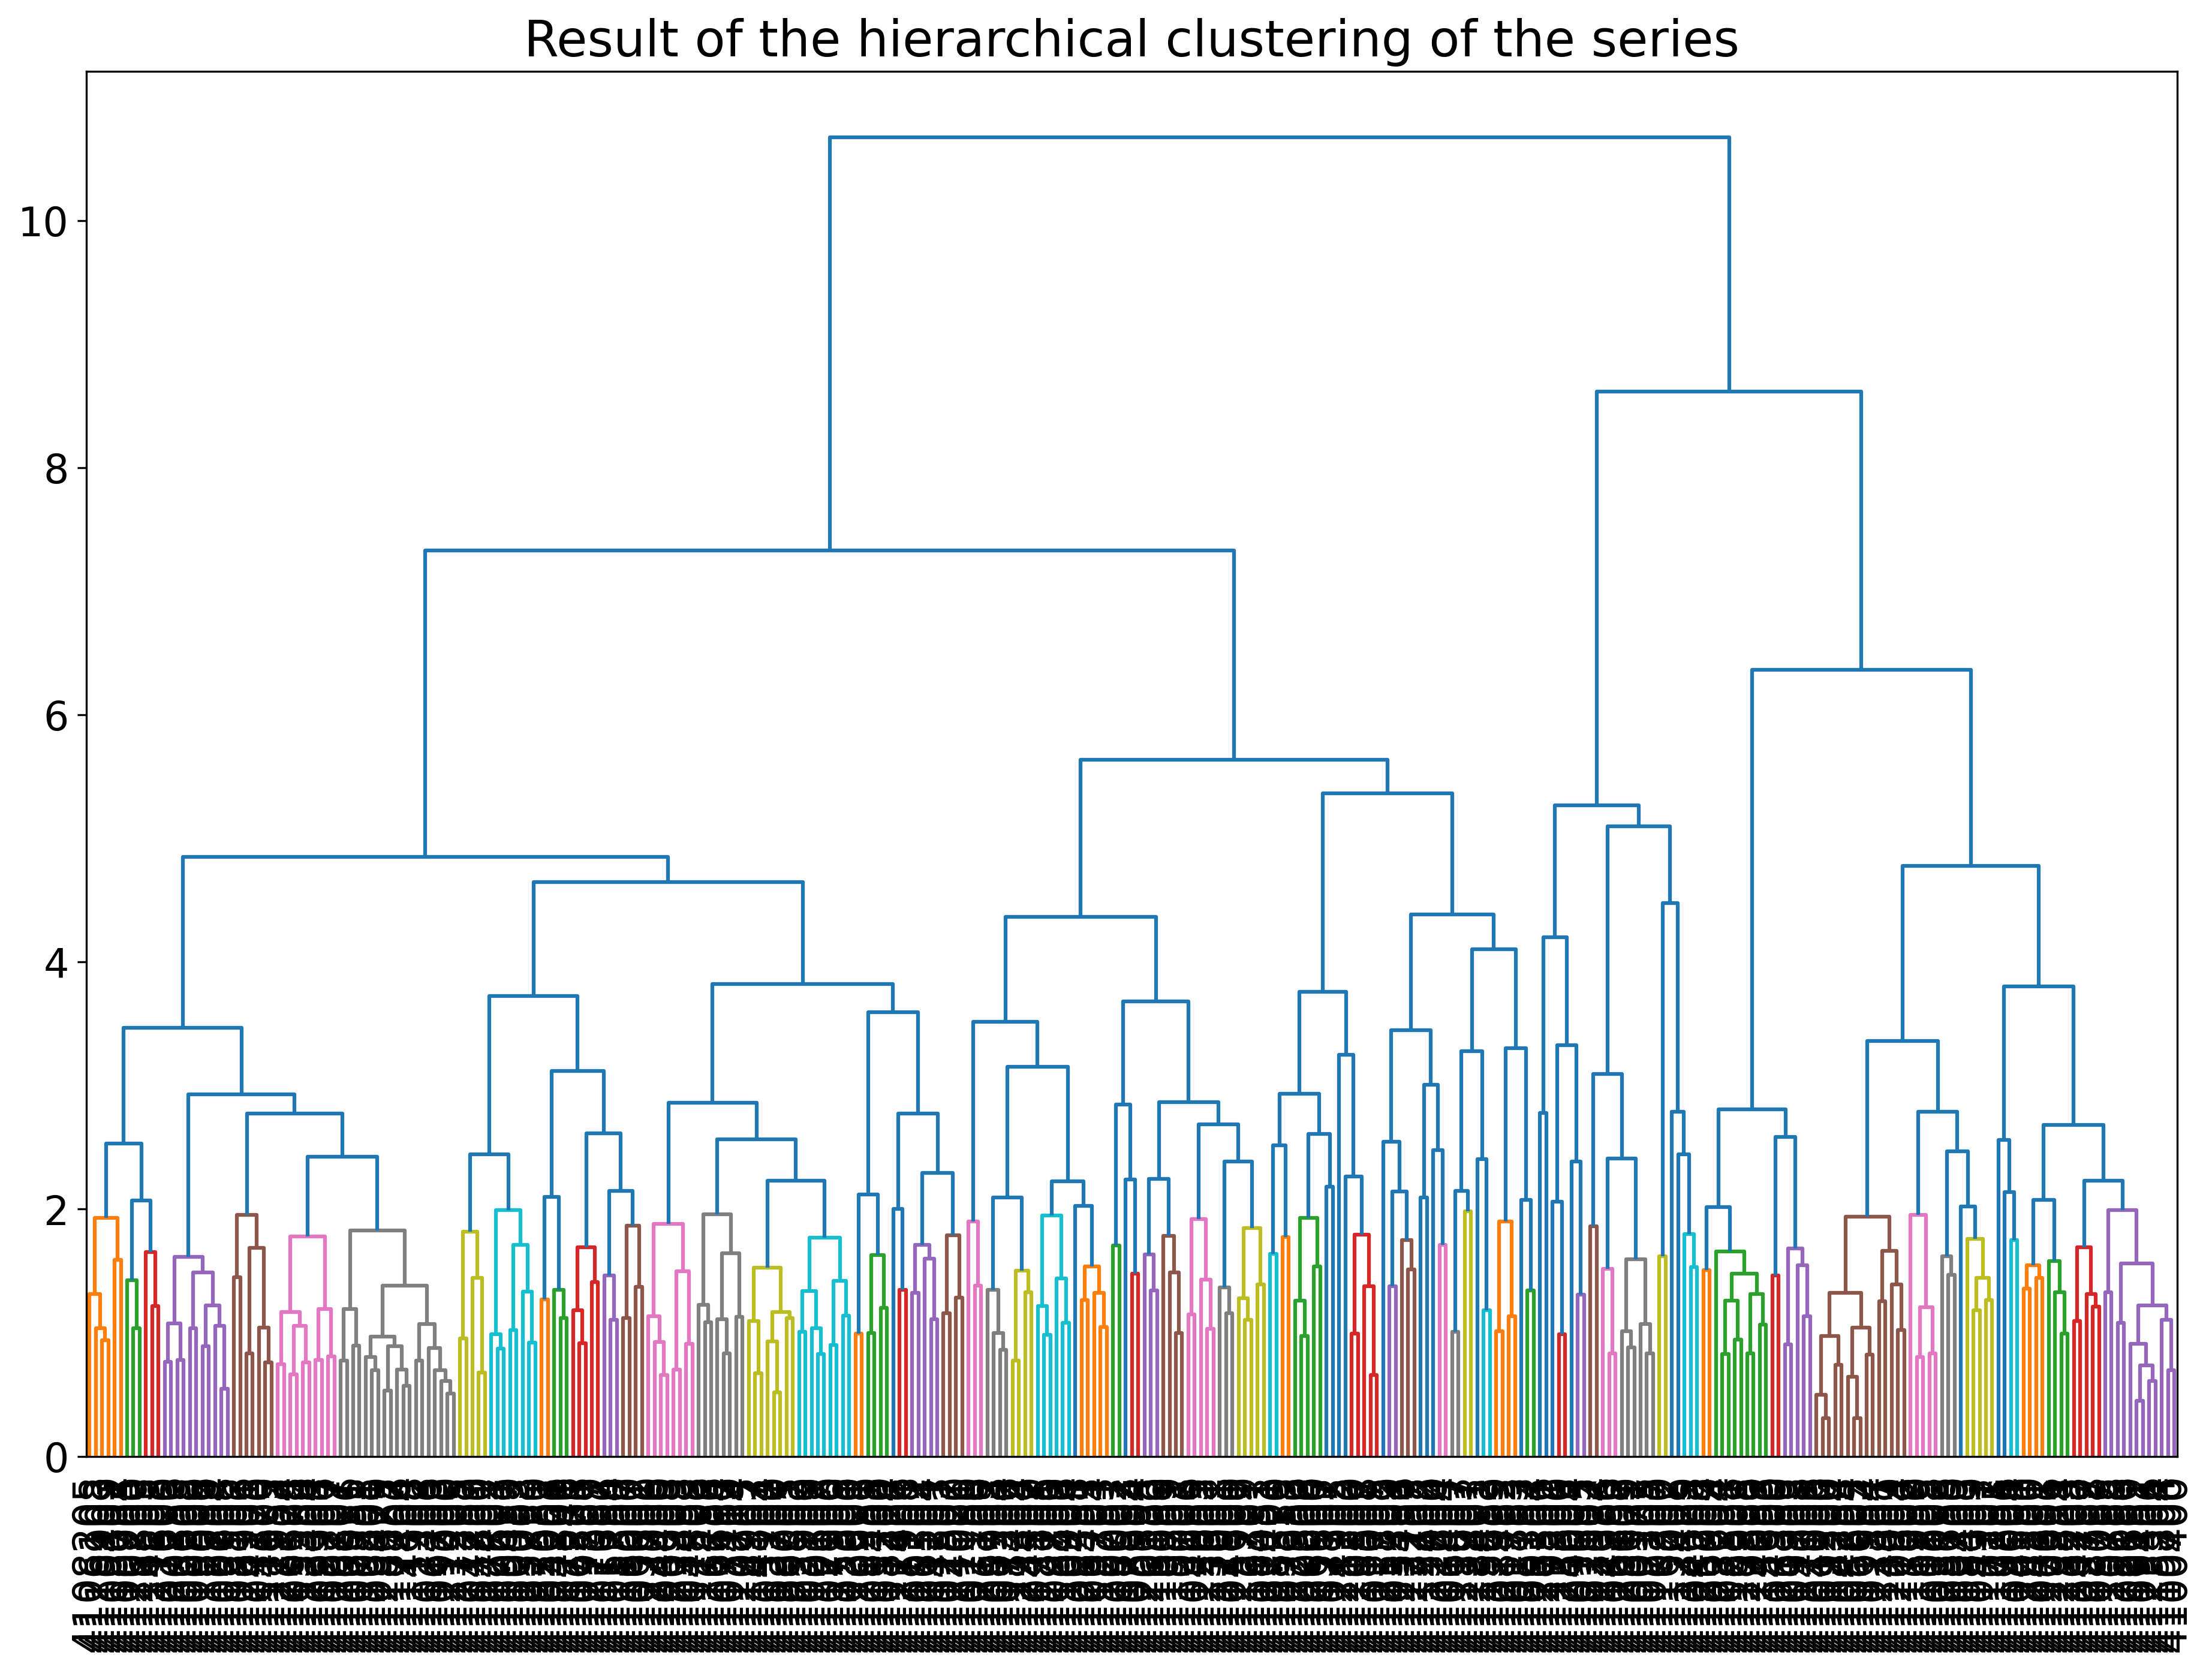

In [8]:
state = 'PR'
df = get_data(state)
    
df = df.loc[df.index.year <= 2020]

for col in df.columns: 

    if sum(df[col]) <= 50:

        df.drop(col, axis =1, inplace = True)

    else:
        df.rename(columns = {col:col[-7:]}, inplace = True)

clusters, fig = compute_clusters(df, lags = 10, t = 2, plot = True)

with open(f'clusters/clusters_{state}.pkl', 'wb') as f:
    pickle.dump(clusters, f)

In [9]:
clusters[0]

array(['4115903', '4110409', '4126108', '4108205', '4108601', '4113734'],
      dtype=object)

In [10]:
brmap = gpd.read_file('muni_br.gpkg', driver='GPKG')

brmap.code_muni = brmap.code_muni.astype(int)

In [11]:
def plot_map(state, city, brmap = brmap):
    '''
    Map of the state highlighting the cities that compose the cluster computed
    
    Parameters:
    -----------
    state : str
        UF name
    city : int
        7 digit ibge code 
    brmap: geopandas Dataframe
        contains the polygons for all the country. 

    Returns:
    --------
    None

    '''
    
    with open(f'clusters/clusters_{state}.pkl', 'rb') as fp:
            clusters = pickle.load(fp)
    
    cluster_city = (list(filter(lambda x: str(city) in x, clusters))[0]).astype(int)
    
    statemap = brmap[brmap.abbrev_state==state]
    
    fig, ax = plt.subplots()

    statemap.plot(ax = ax, color = 'lightgray')
    statemap.loc[statemap.code_muni.isin(cluster_city)].plot(ax = ax, color = 'tab:orange')
    ax.set_axis_off()
    ax.set_title(f'Cities clusterized with {city}')
    plt.show()


Cities clusterized with FOZ DO IGUAÇU (4108304):

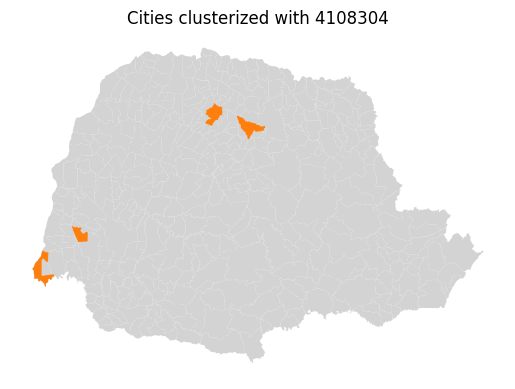

In [12]:
plot_map('PR',4108304)

### Computing the clusters for all the states: 

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/clustering.py:41: RuntimeWarning: overflow encountered in long_scalars
  corr = correlate(x, y, mode="full") / np.sqrt(np.dot(x, x) * np.dot(y, y))
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/clustering.py:41: RuntimeWarning: invalid value encountered in sqrt
  corr = correlate(x, y, mode="full") / np.sqrt(np.dot(x, x) * np.dot(y, y))
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/clustering.py:240: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_[f'casos_{geo}'] = df_s.casos
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_32513/2710431904.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

ValueError: The number of observations cannot be determined on an empty distance matrix.

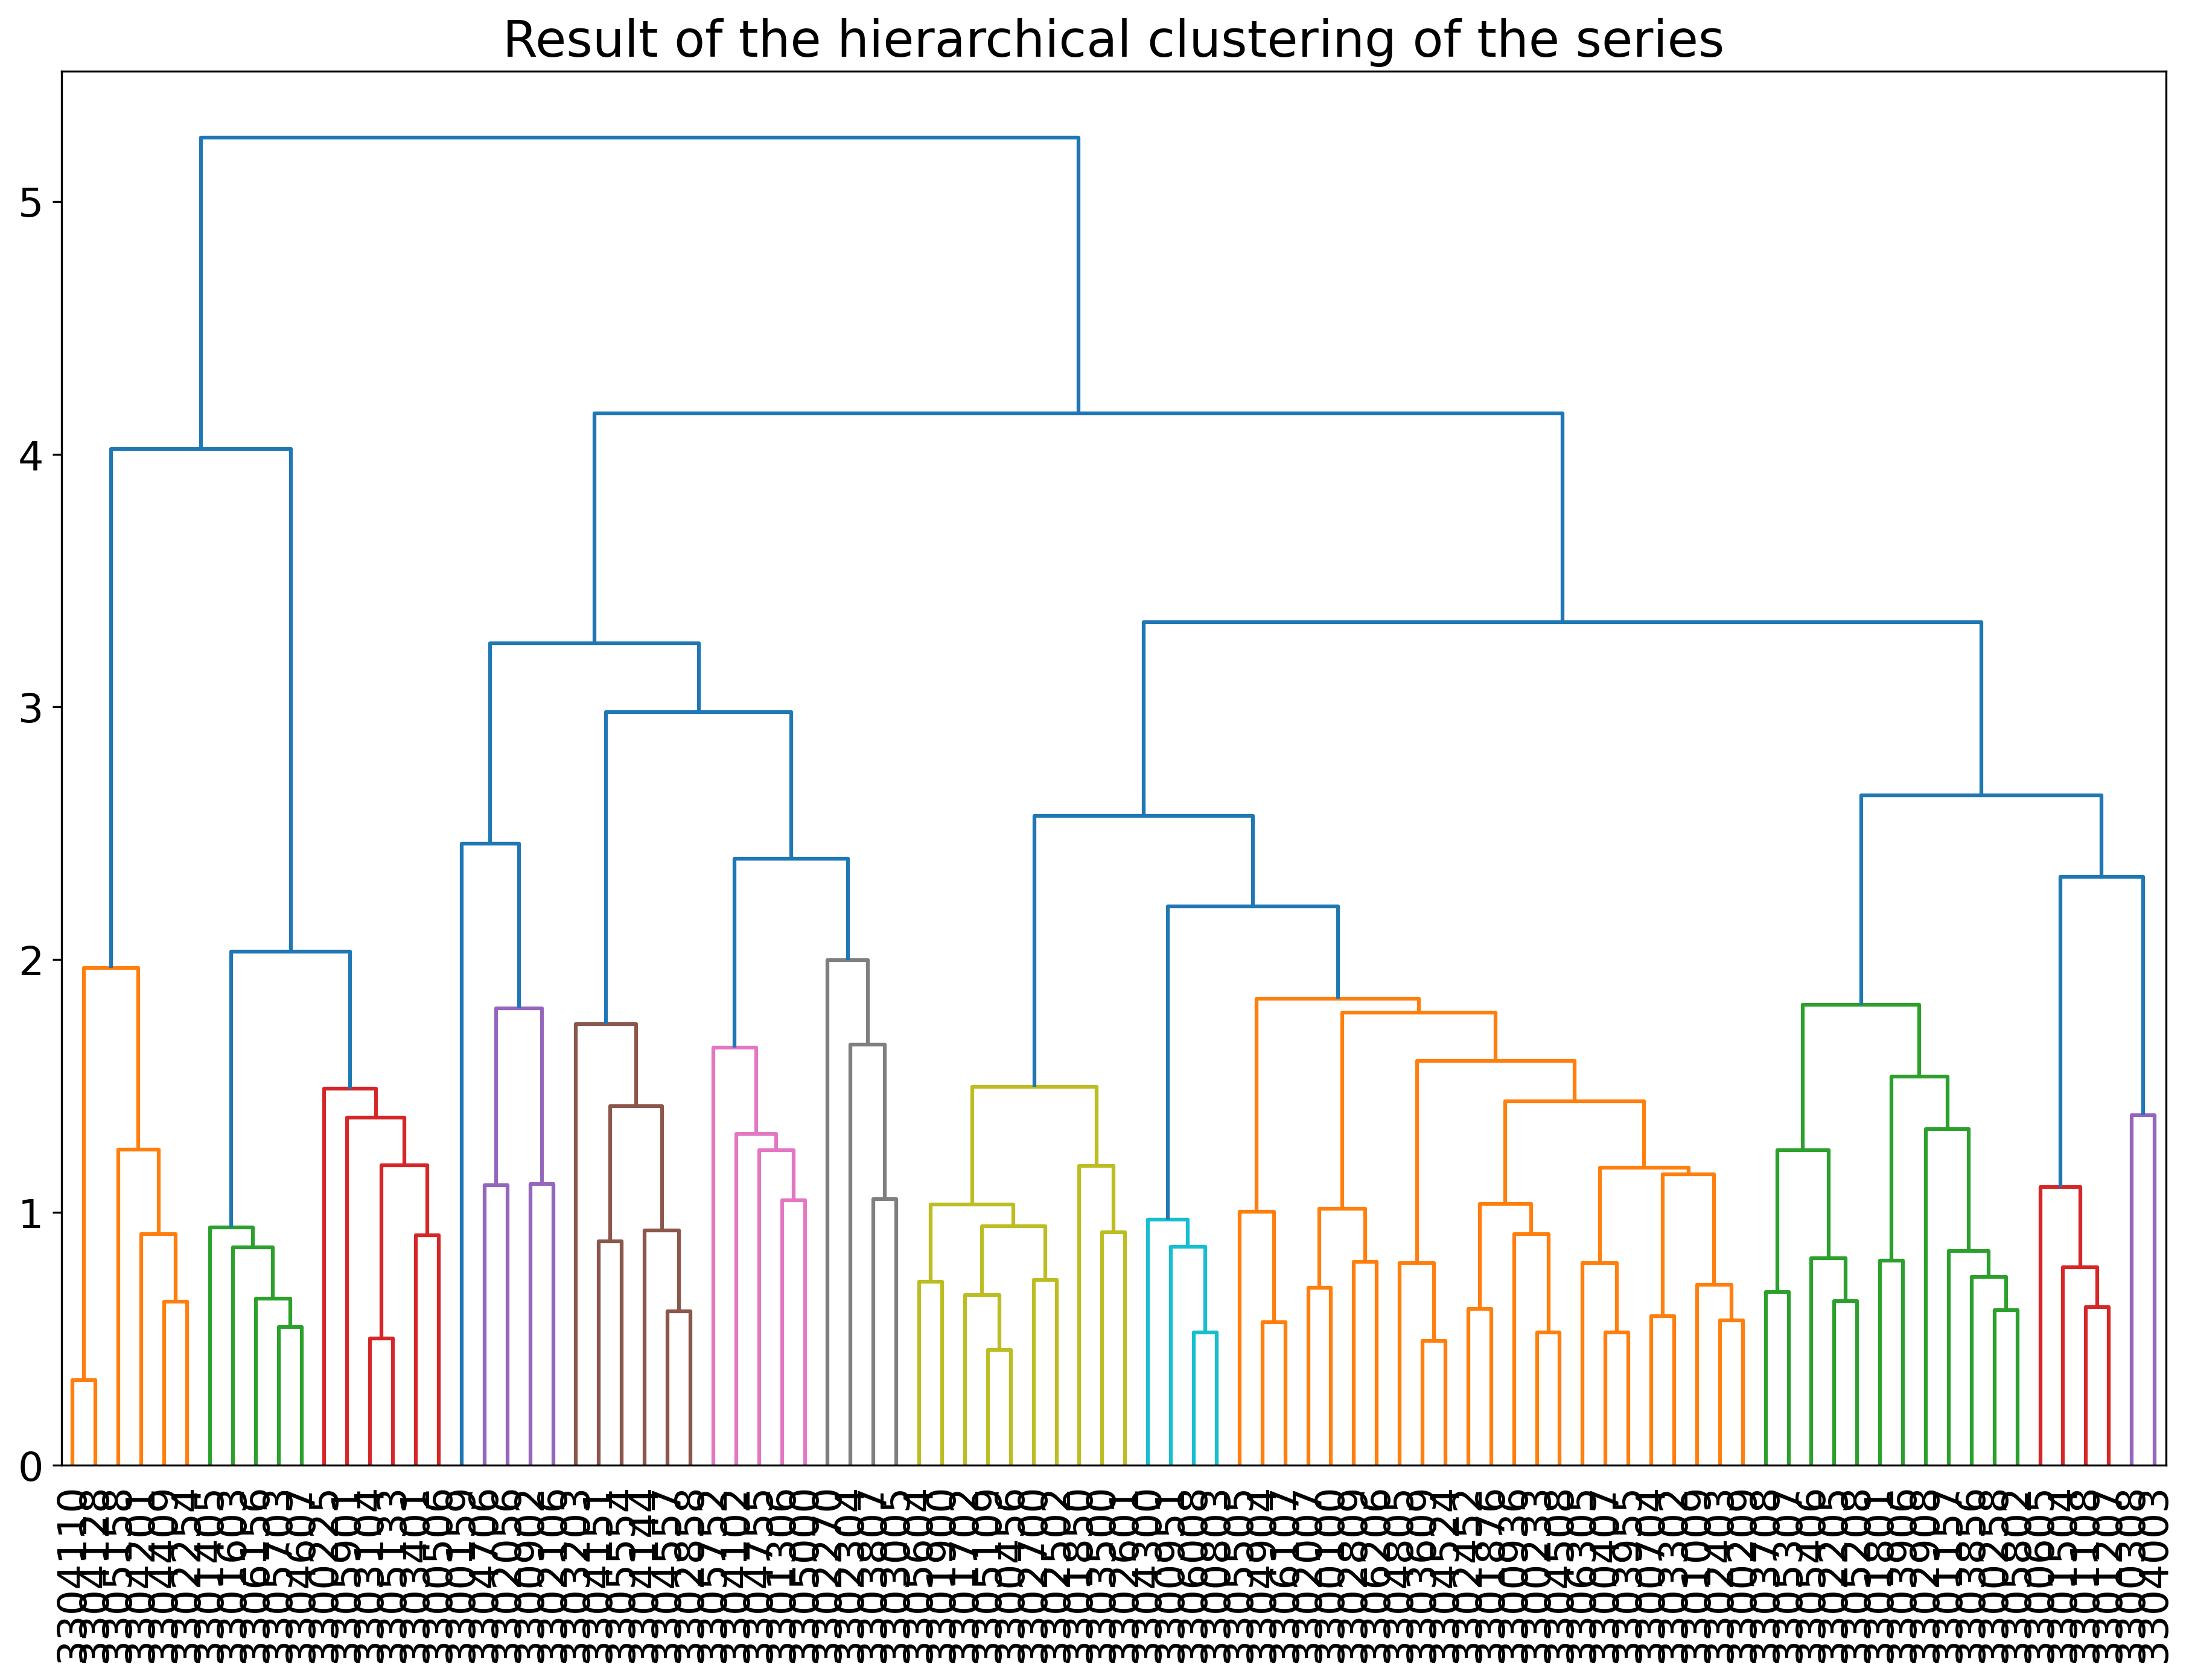

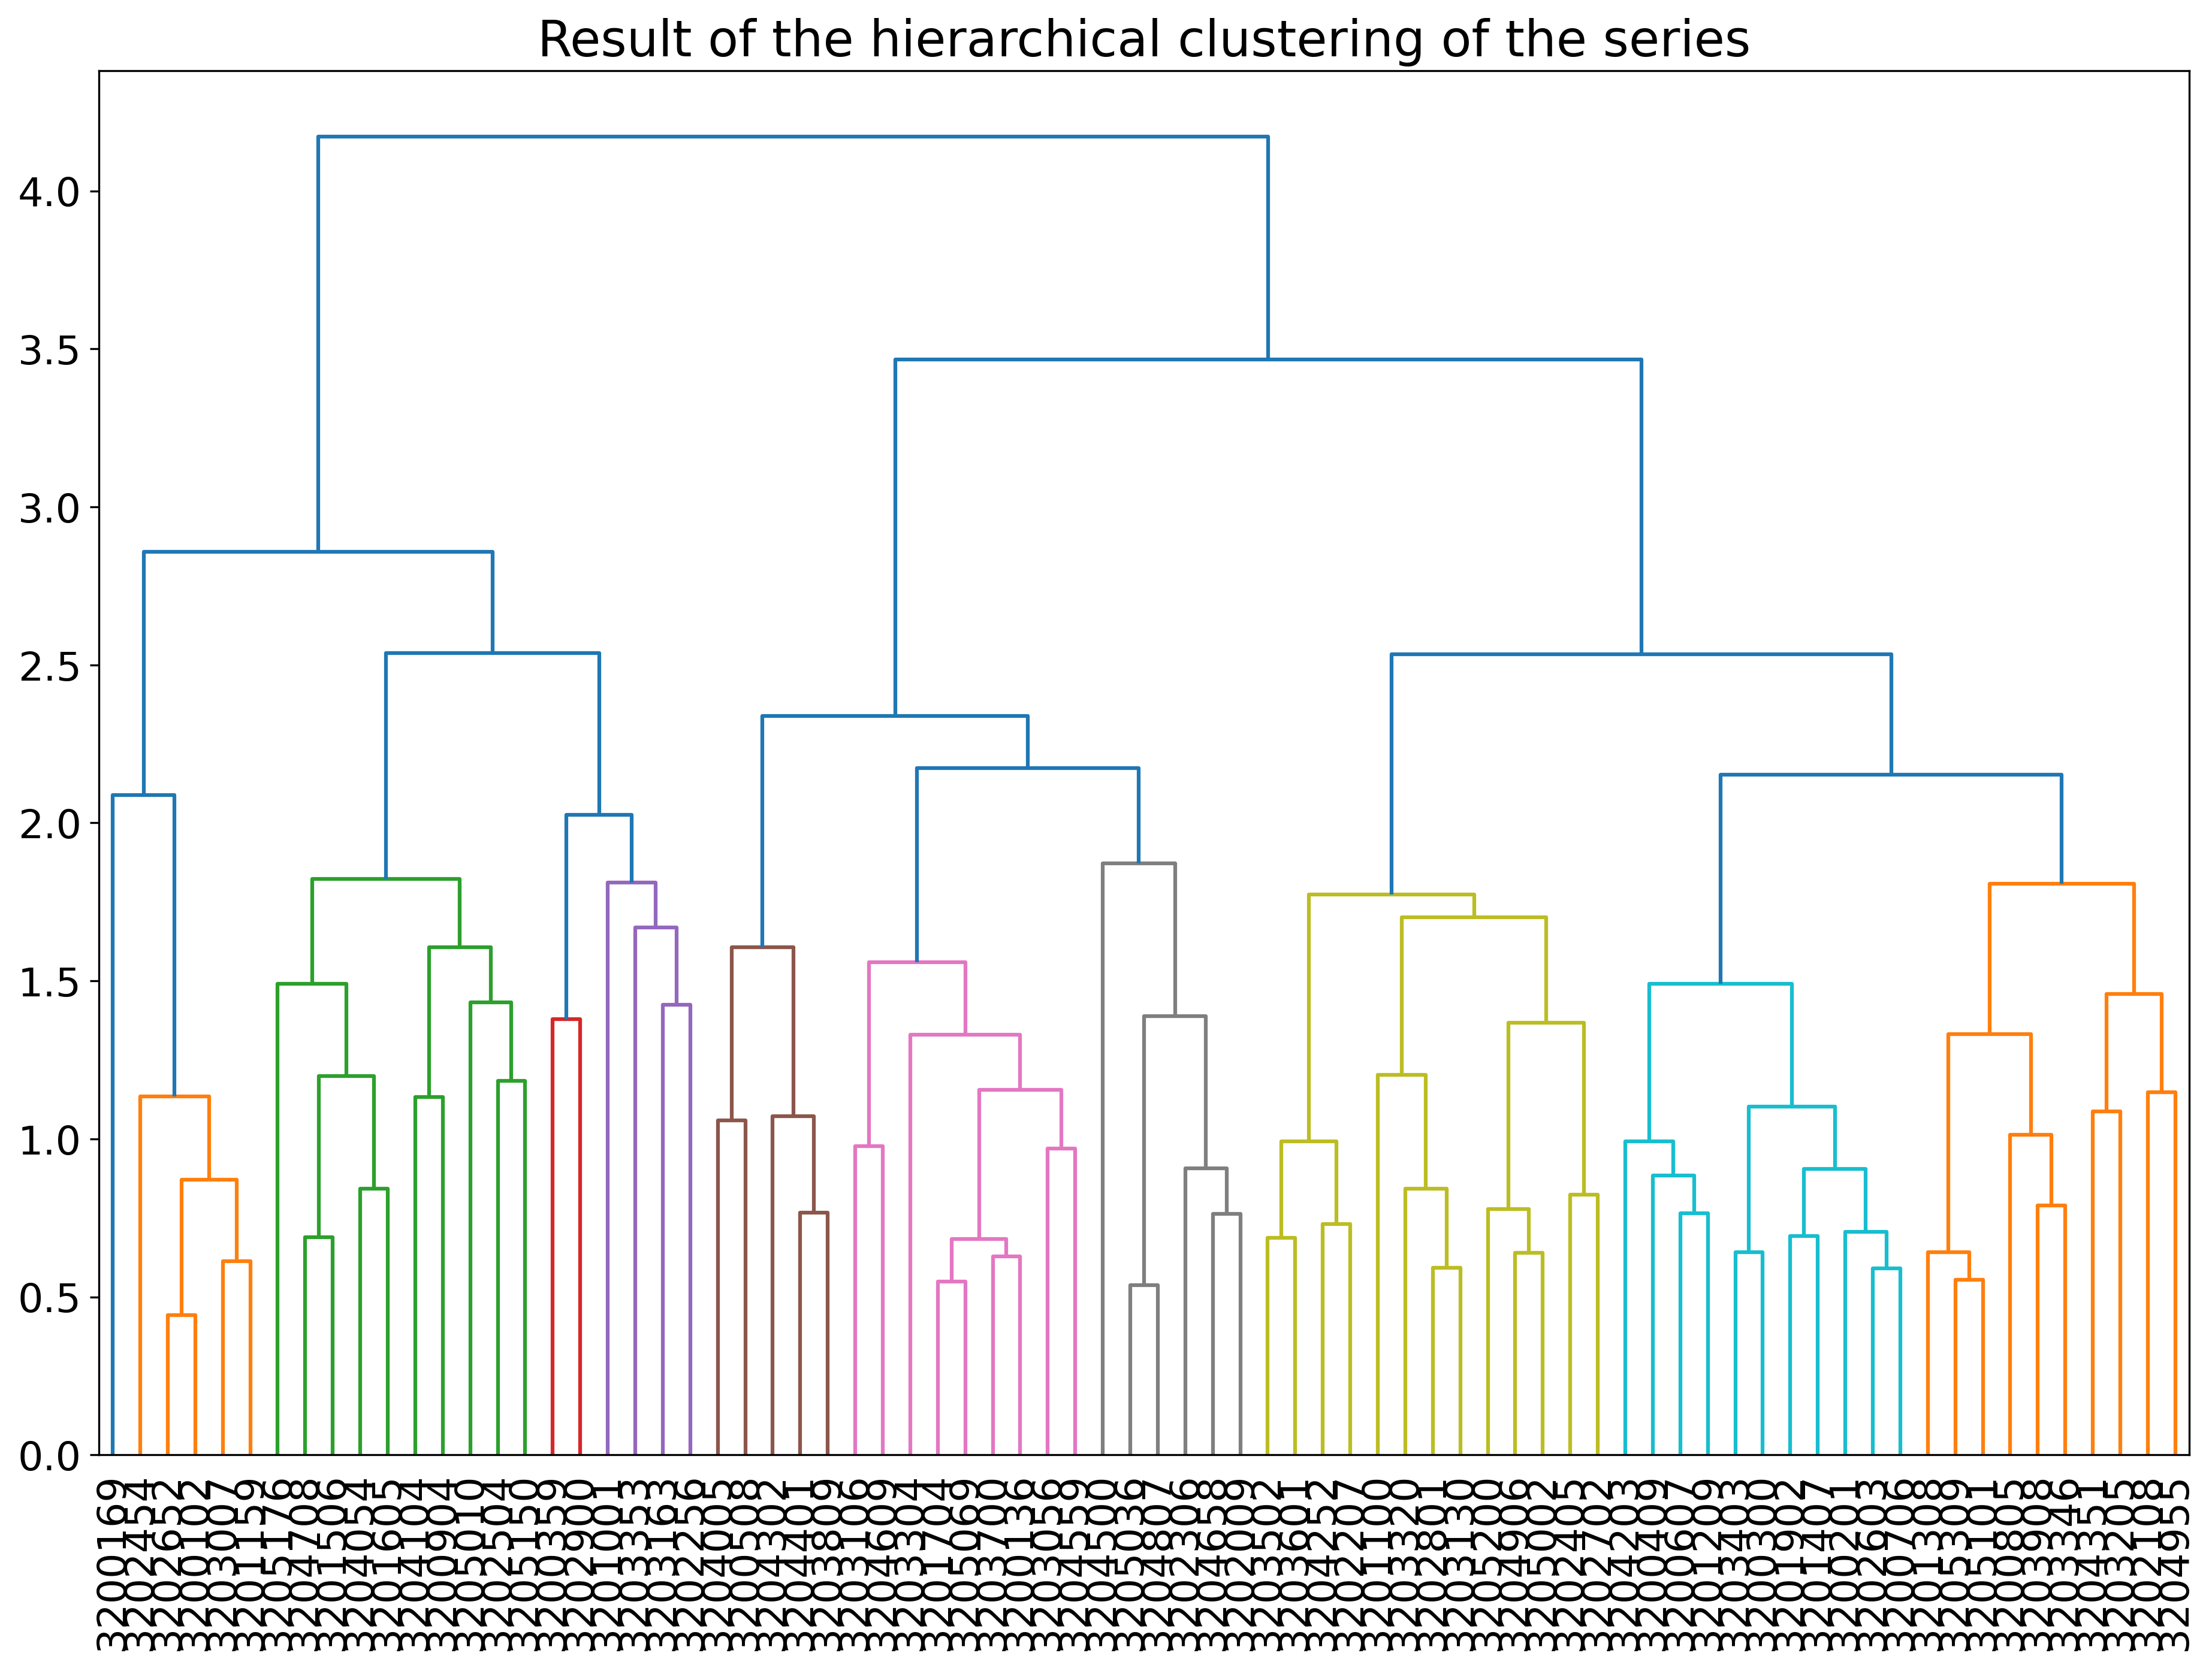

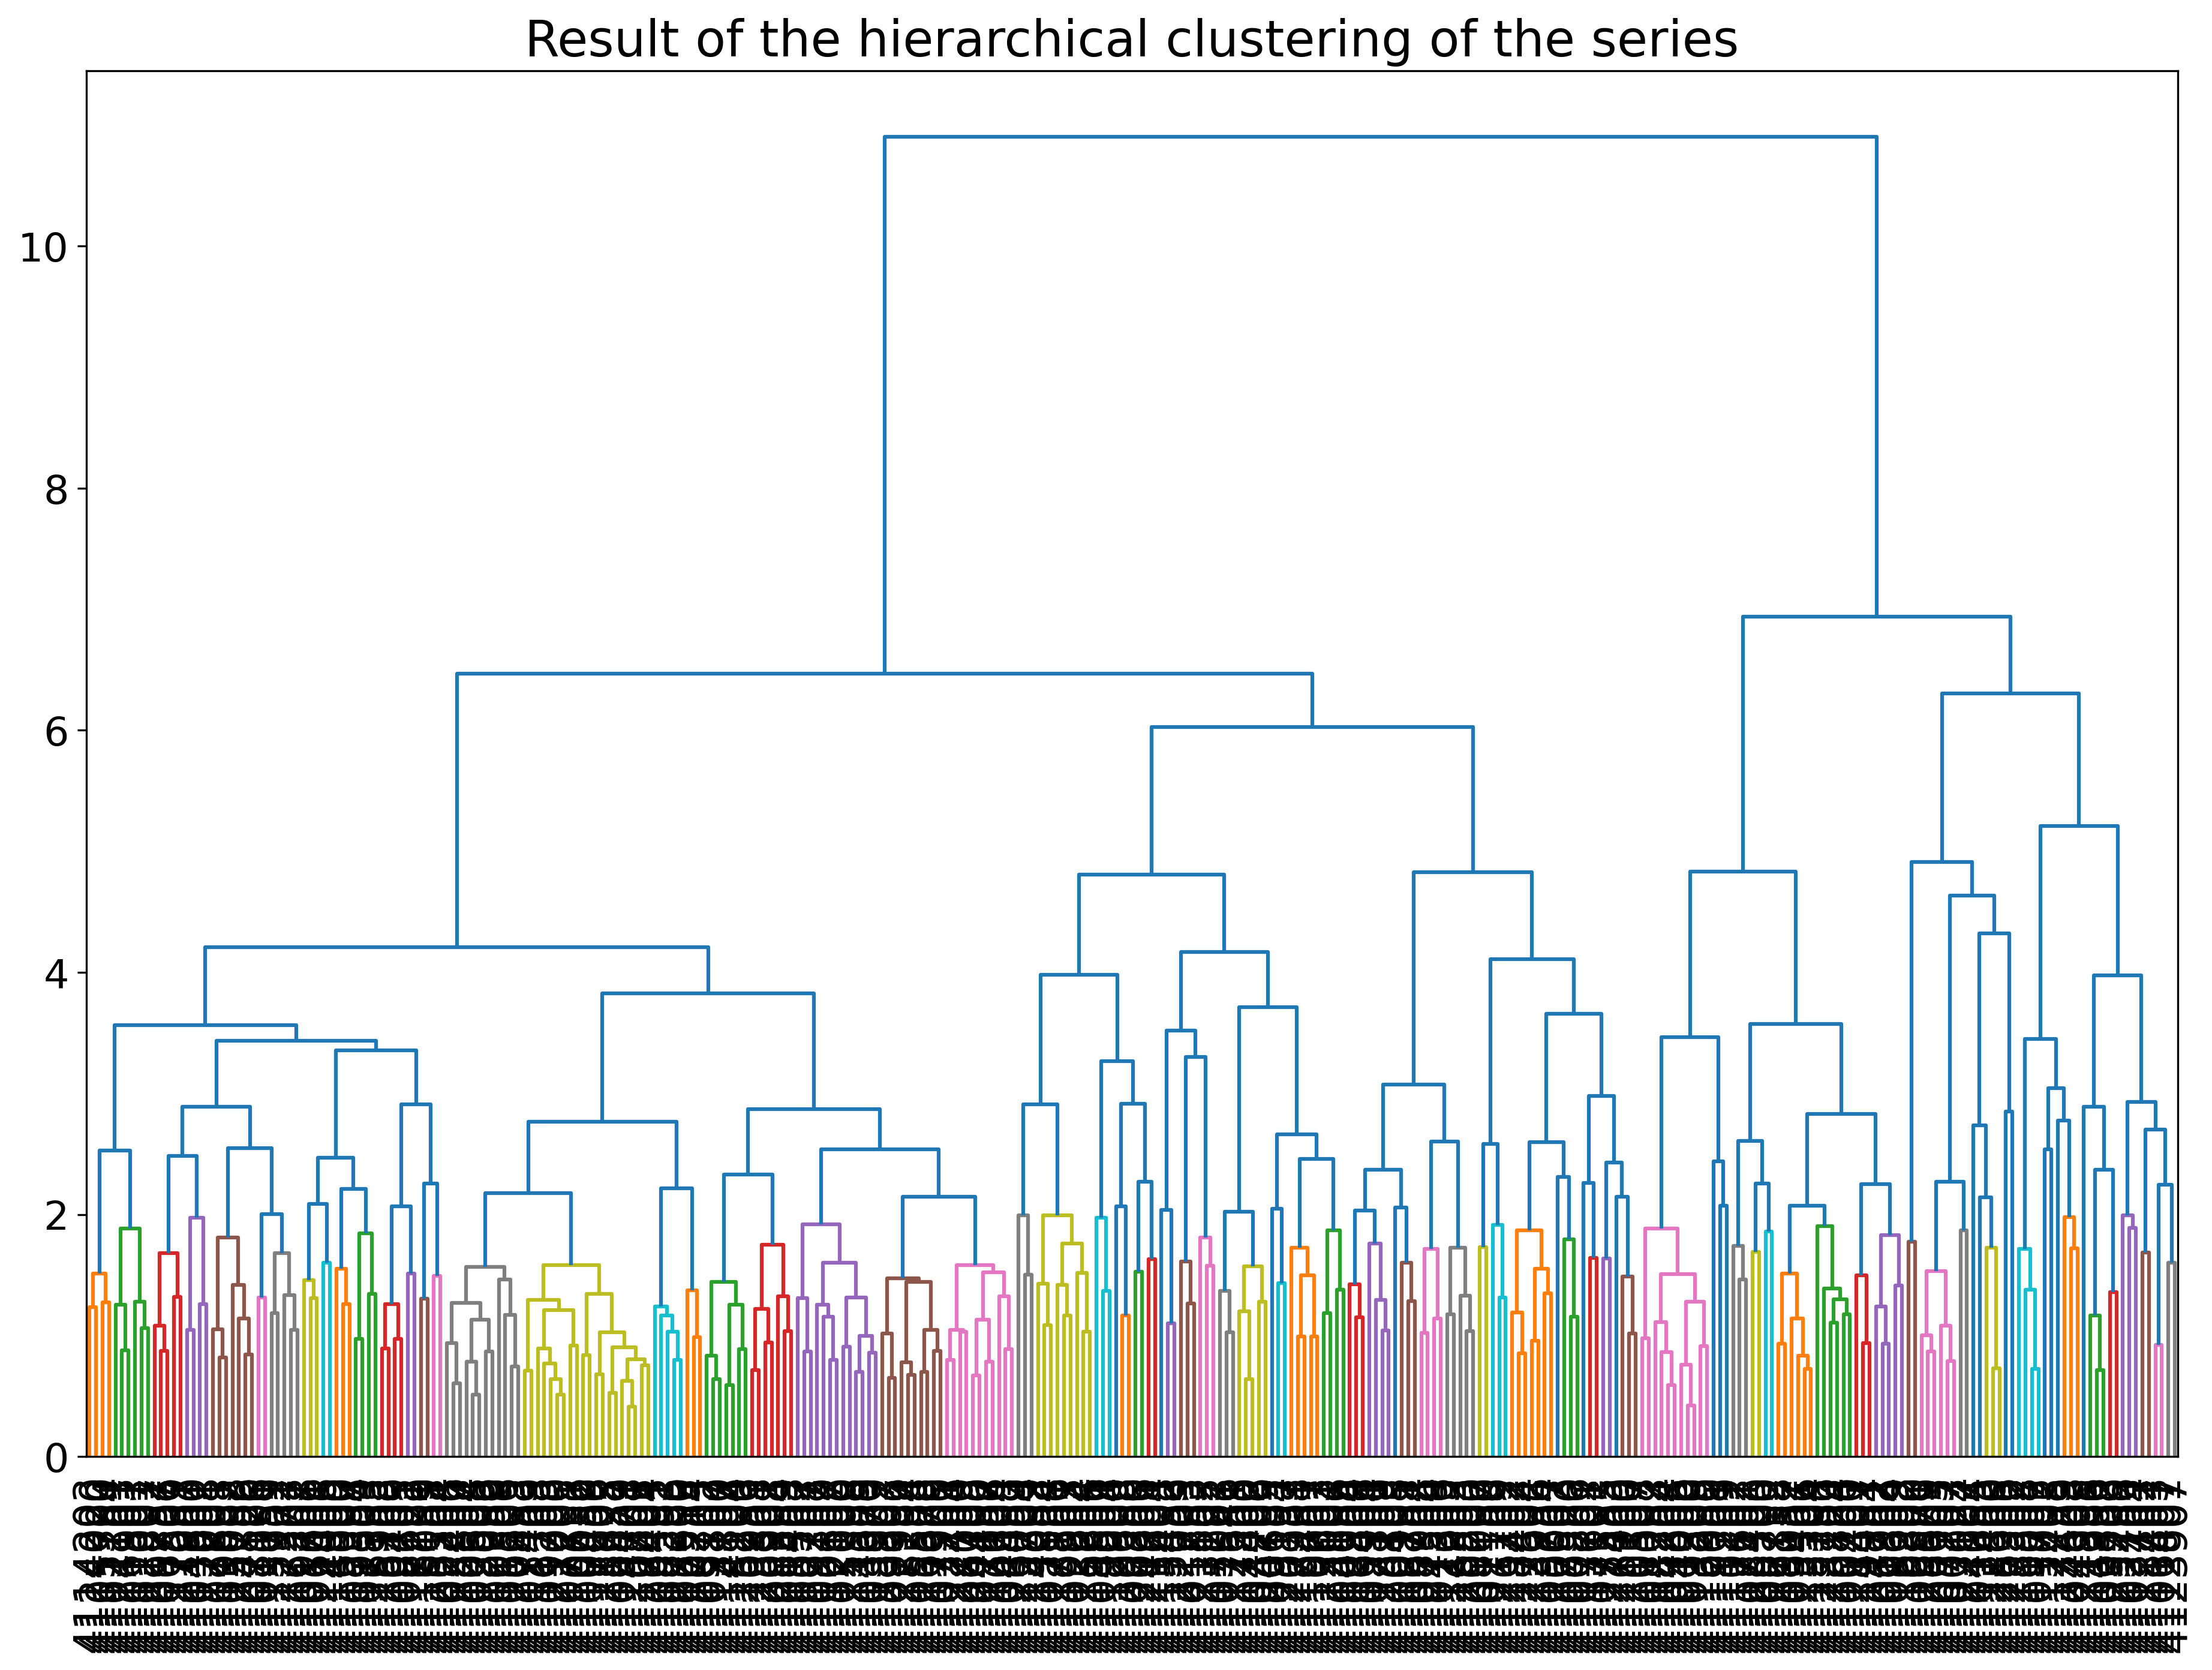

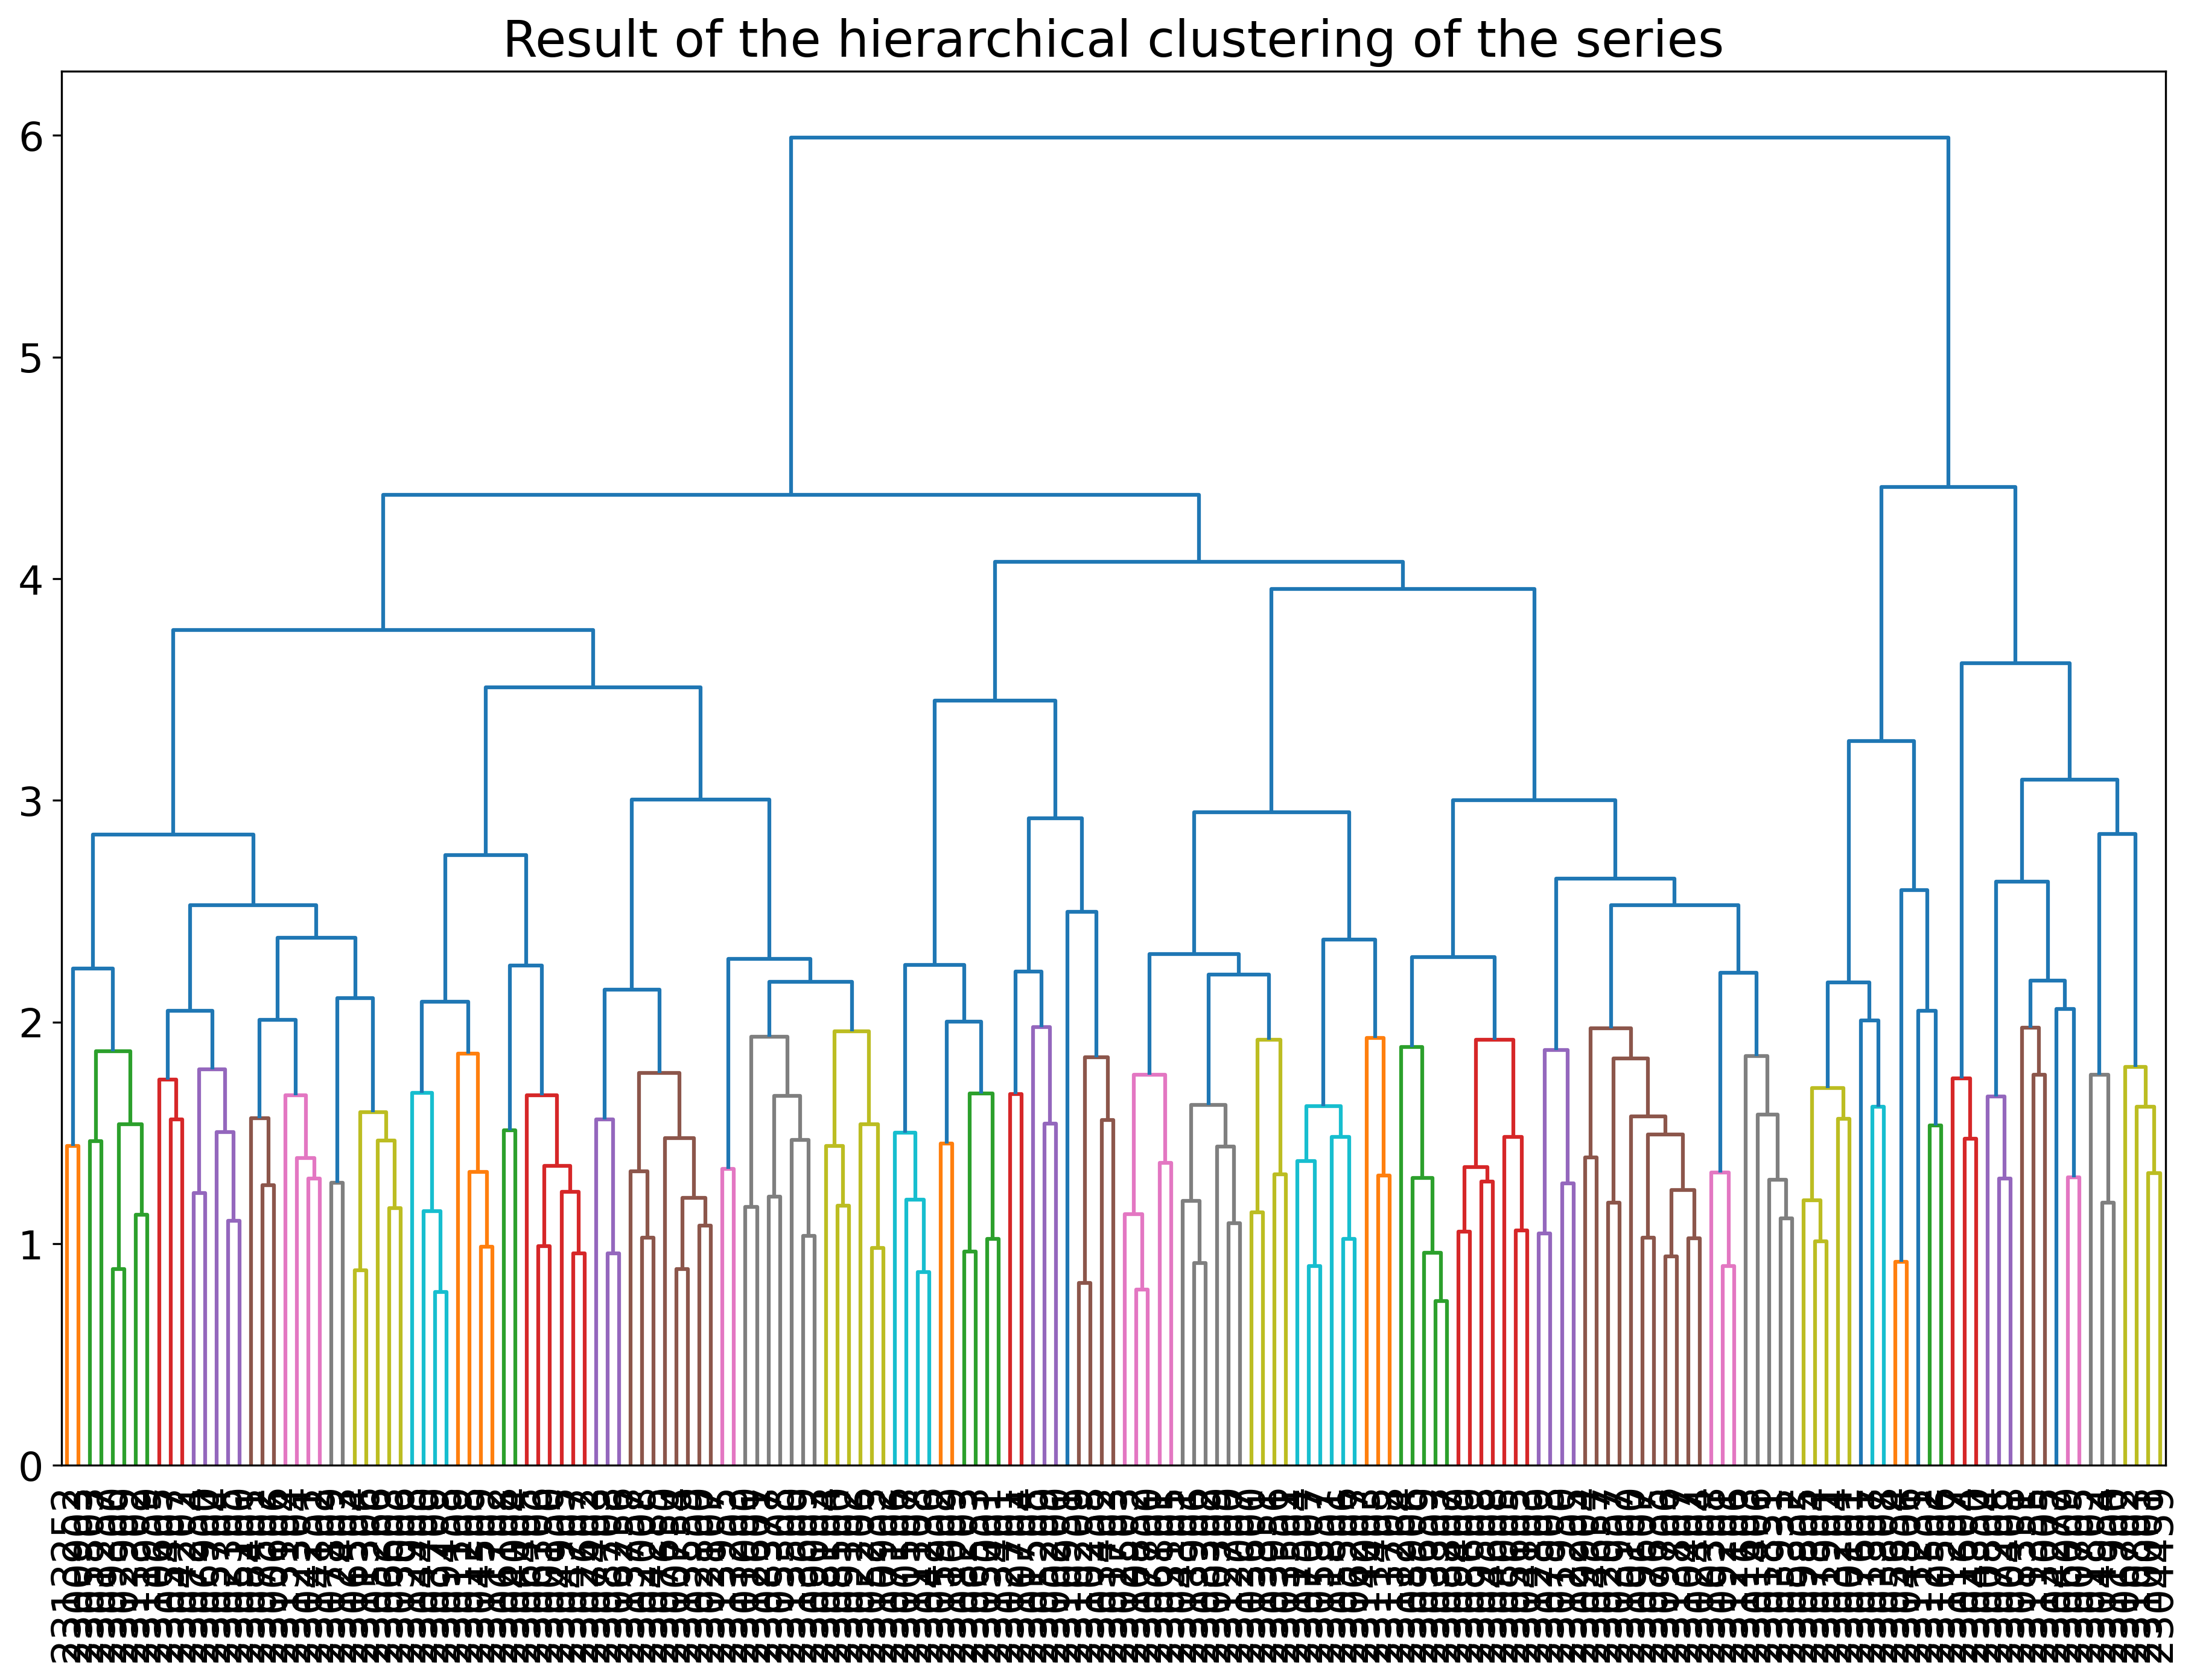

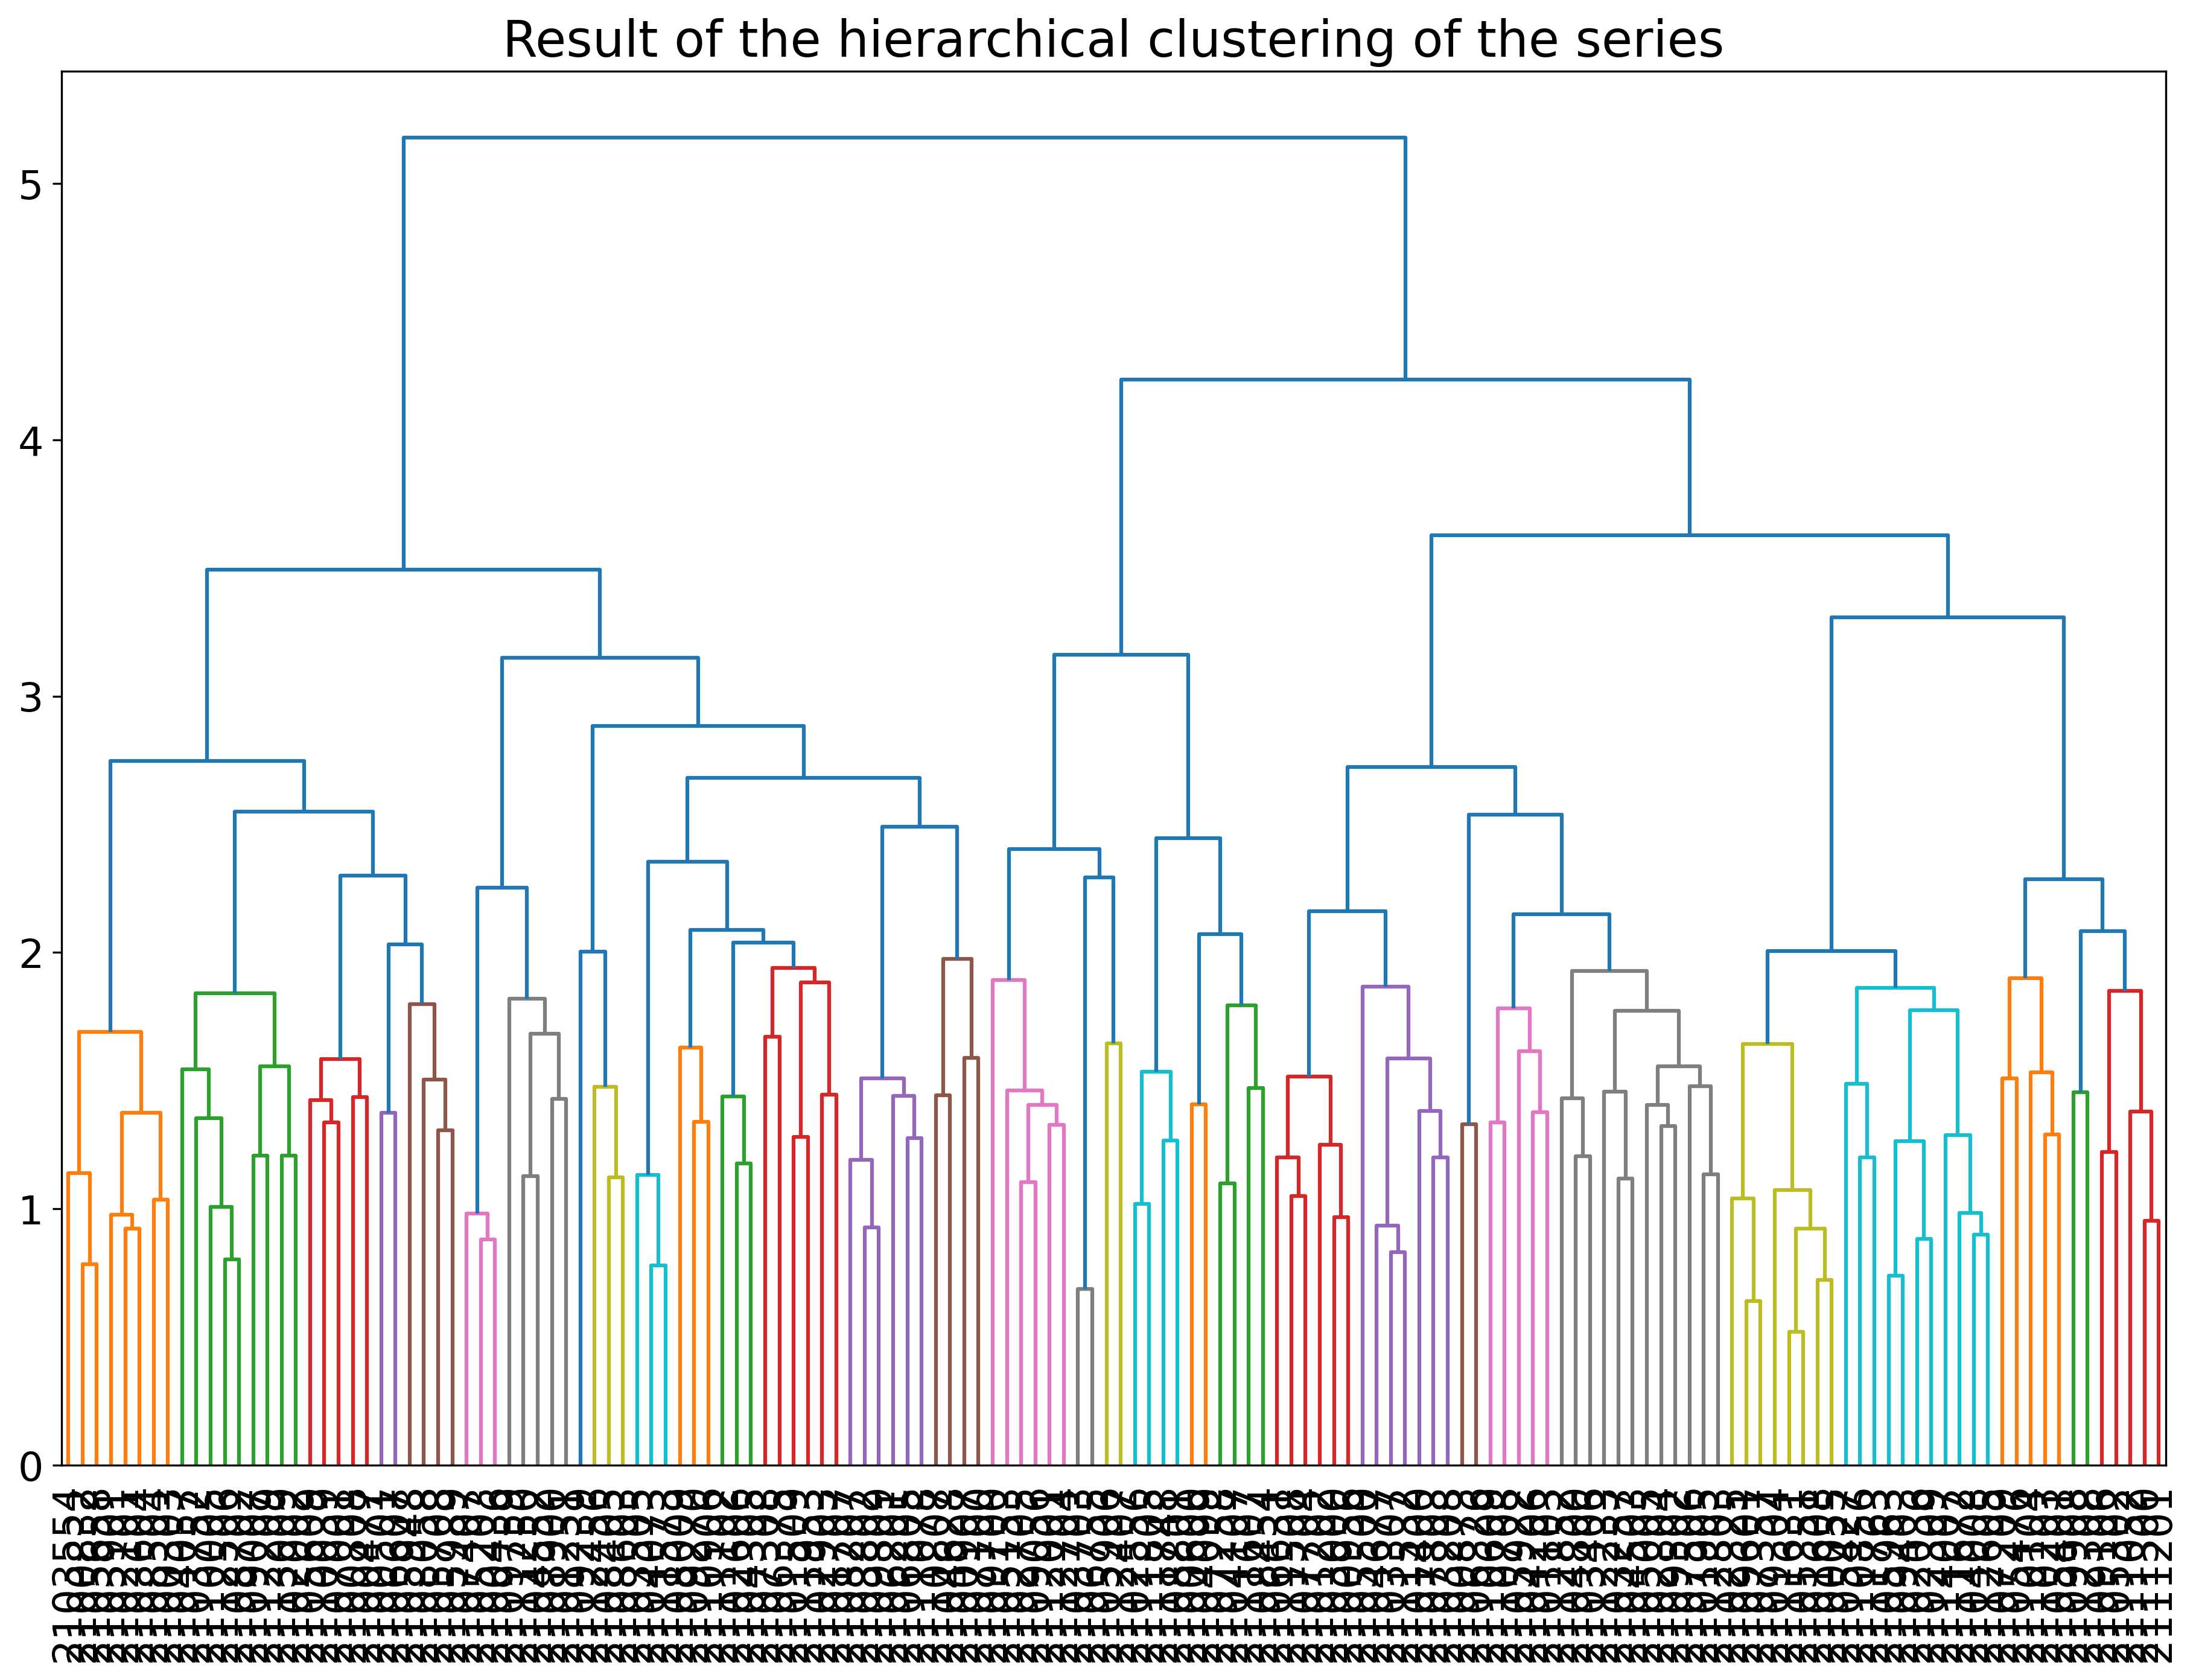

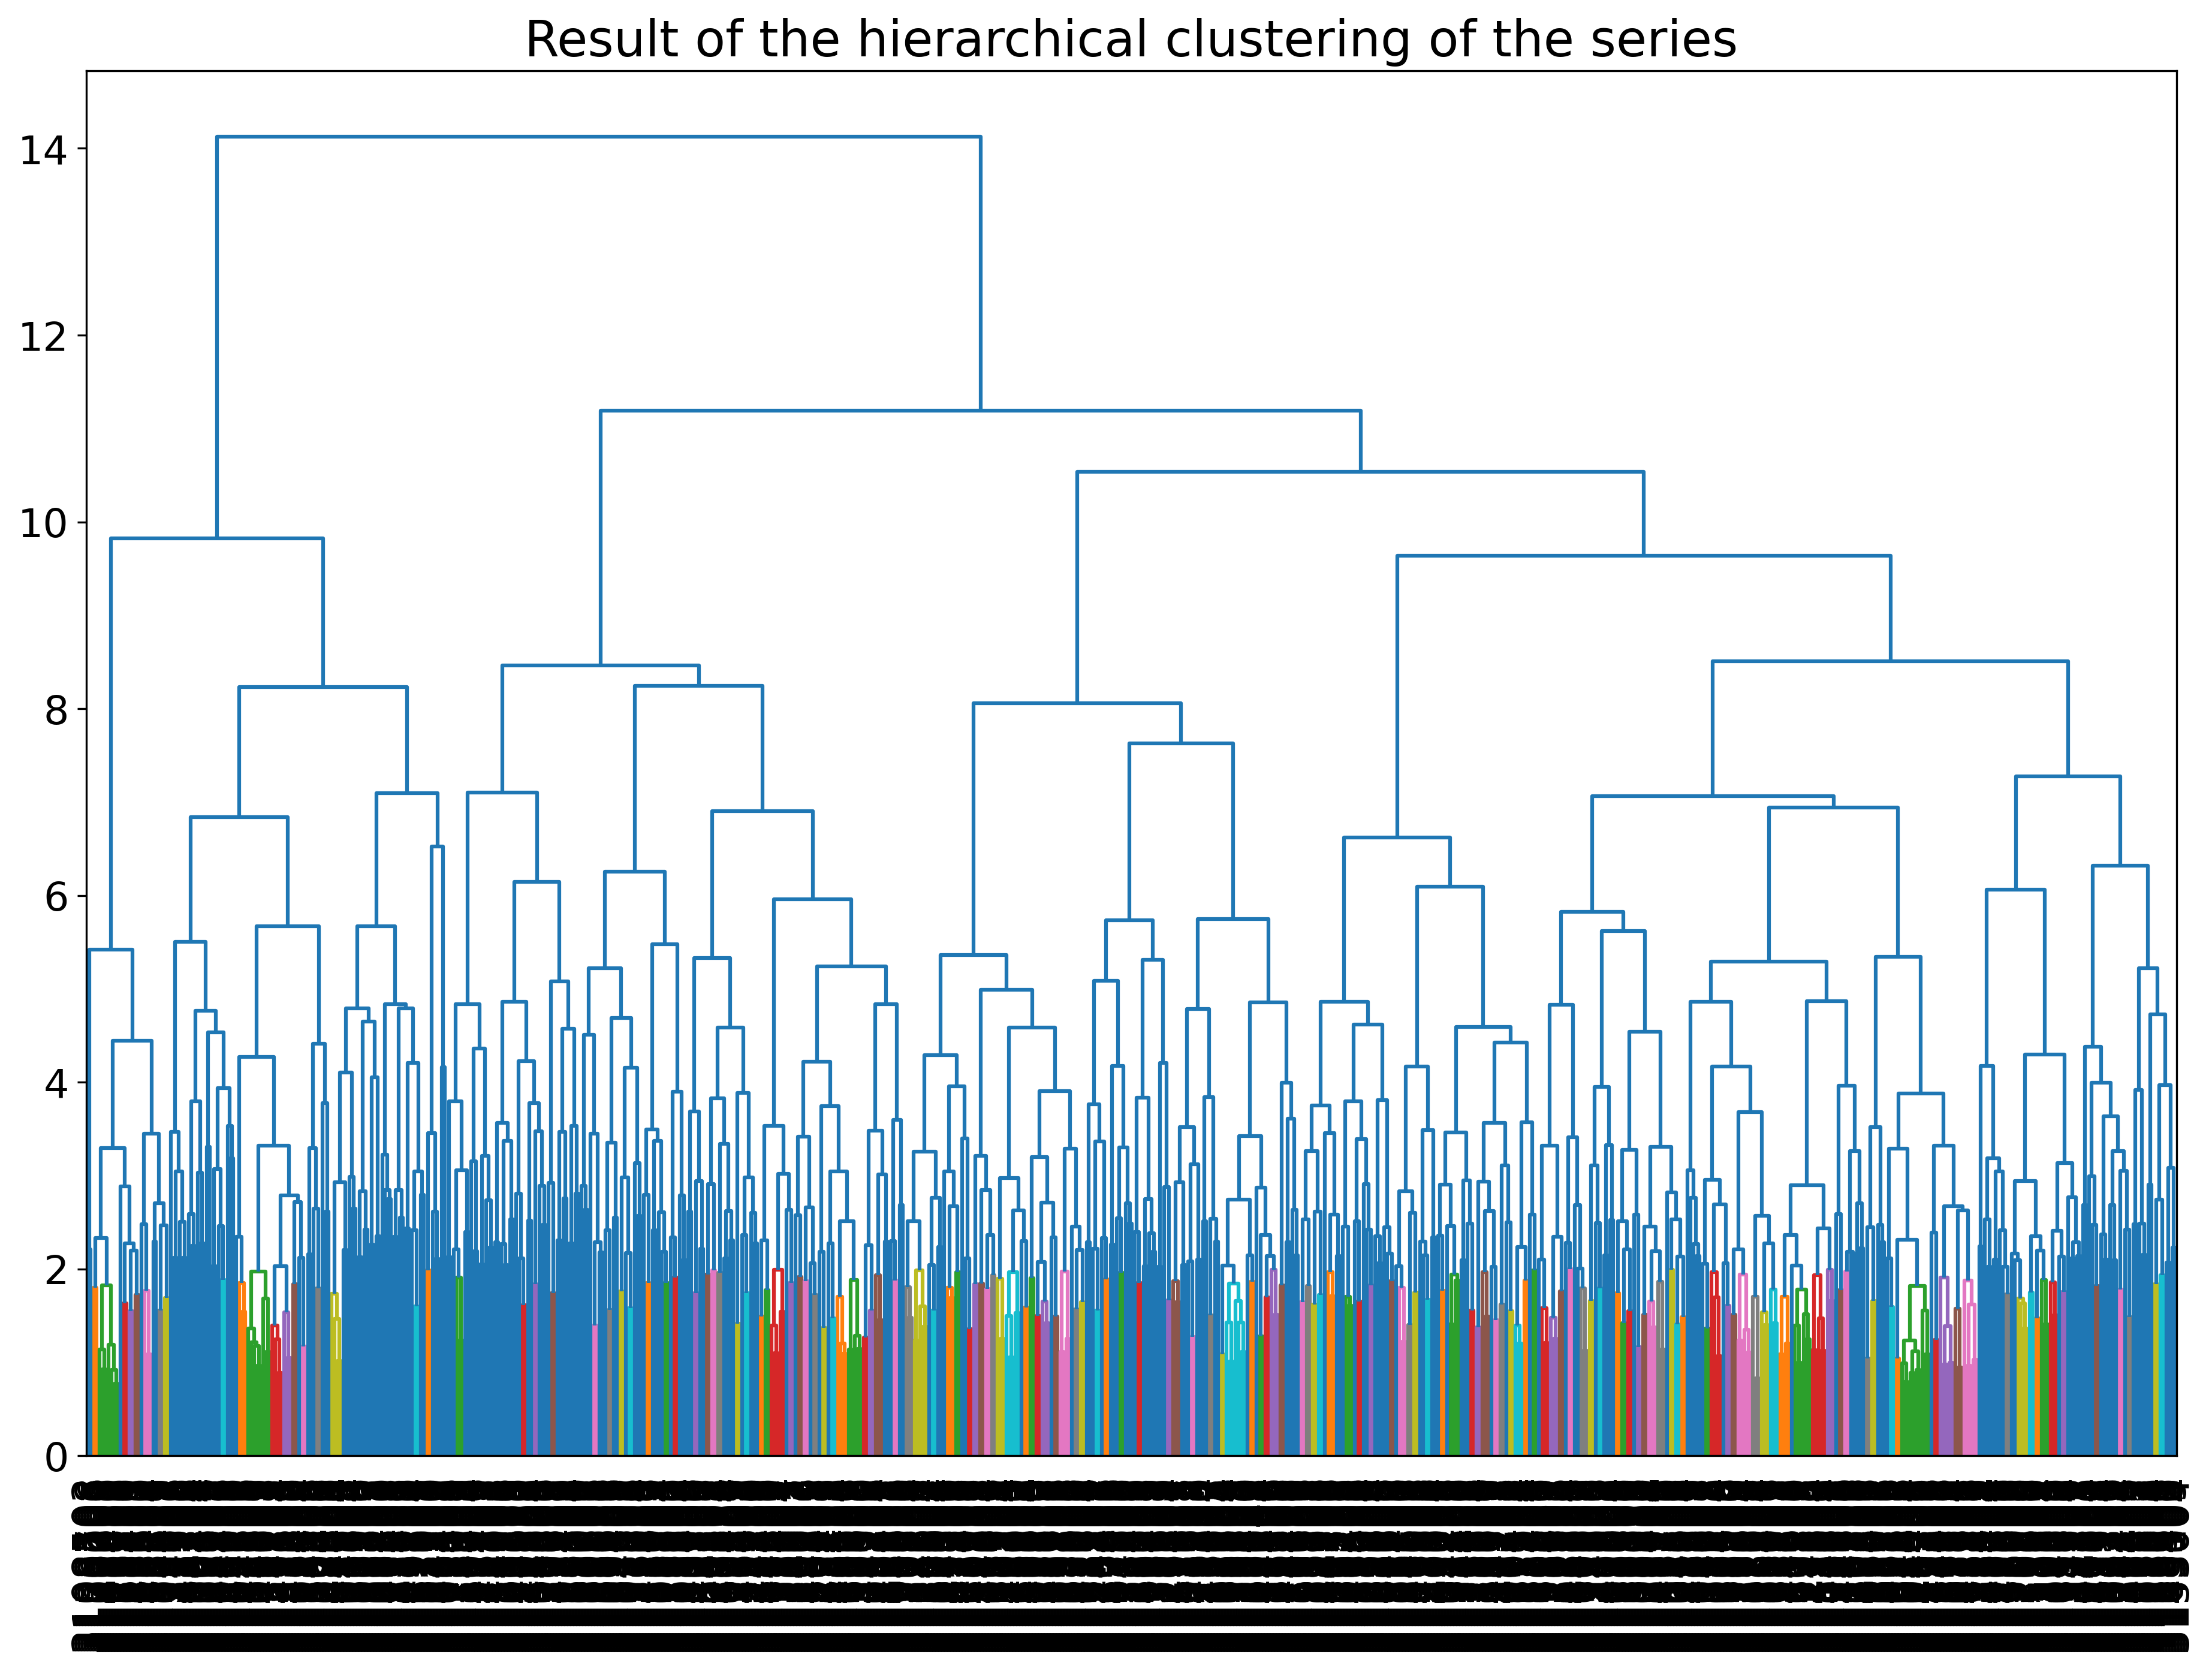

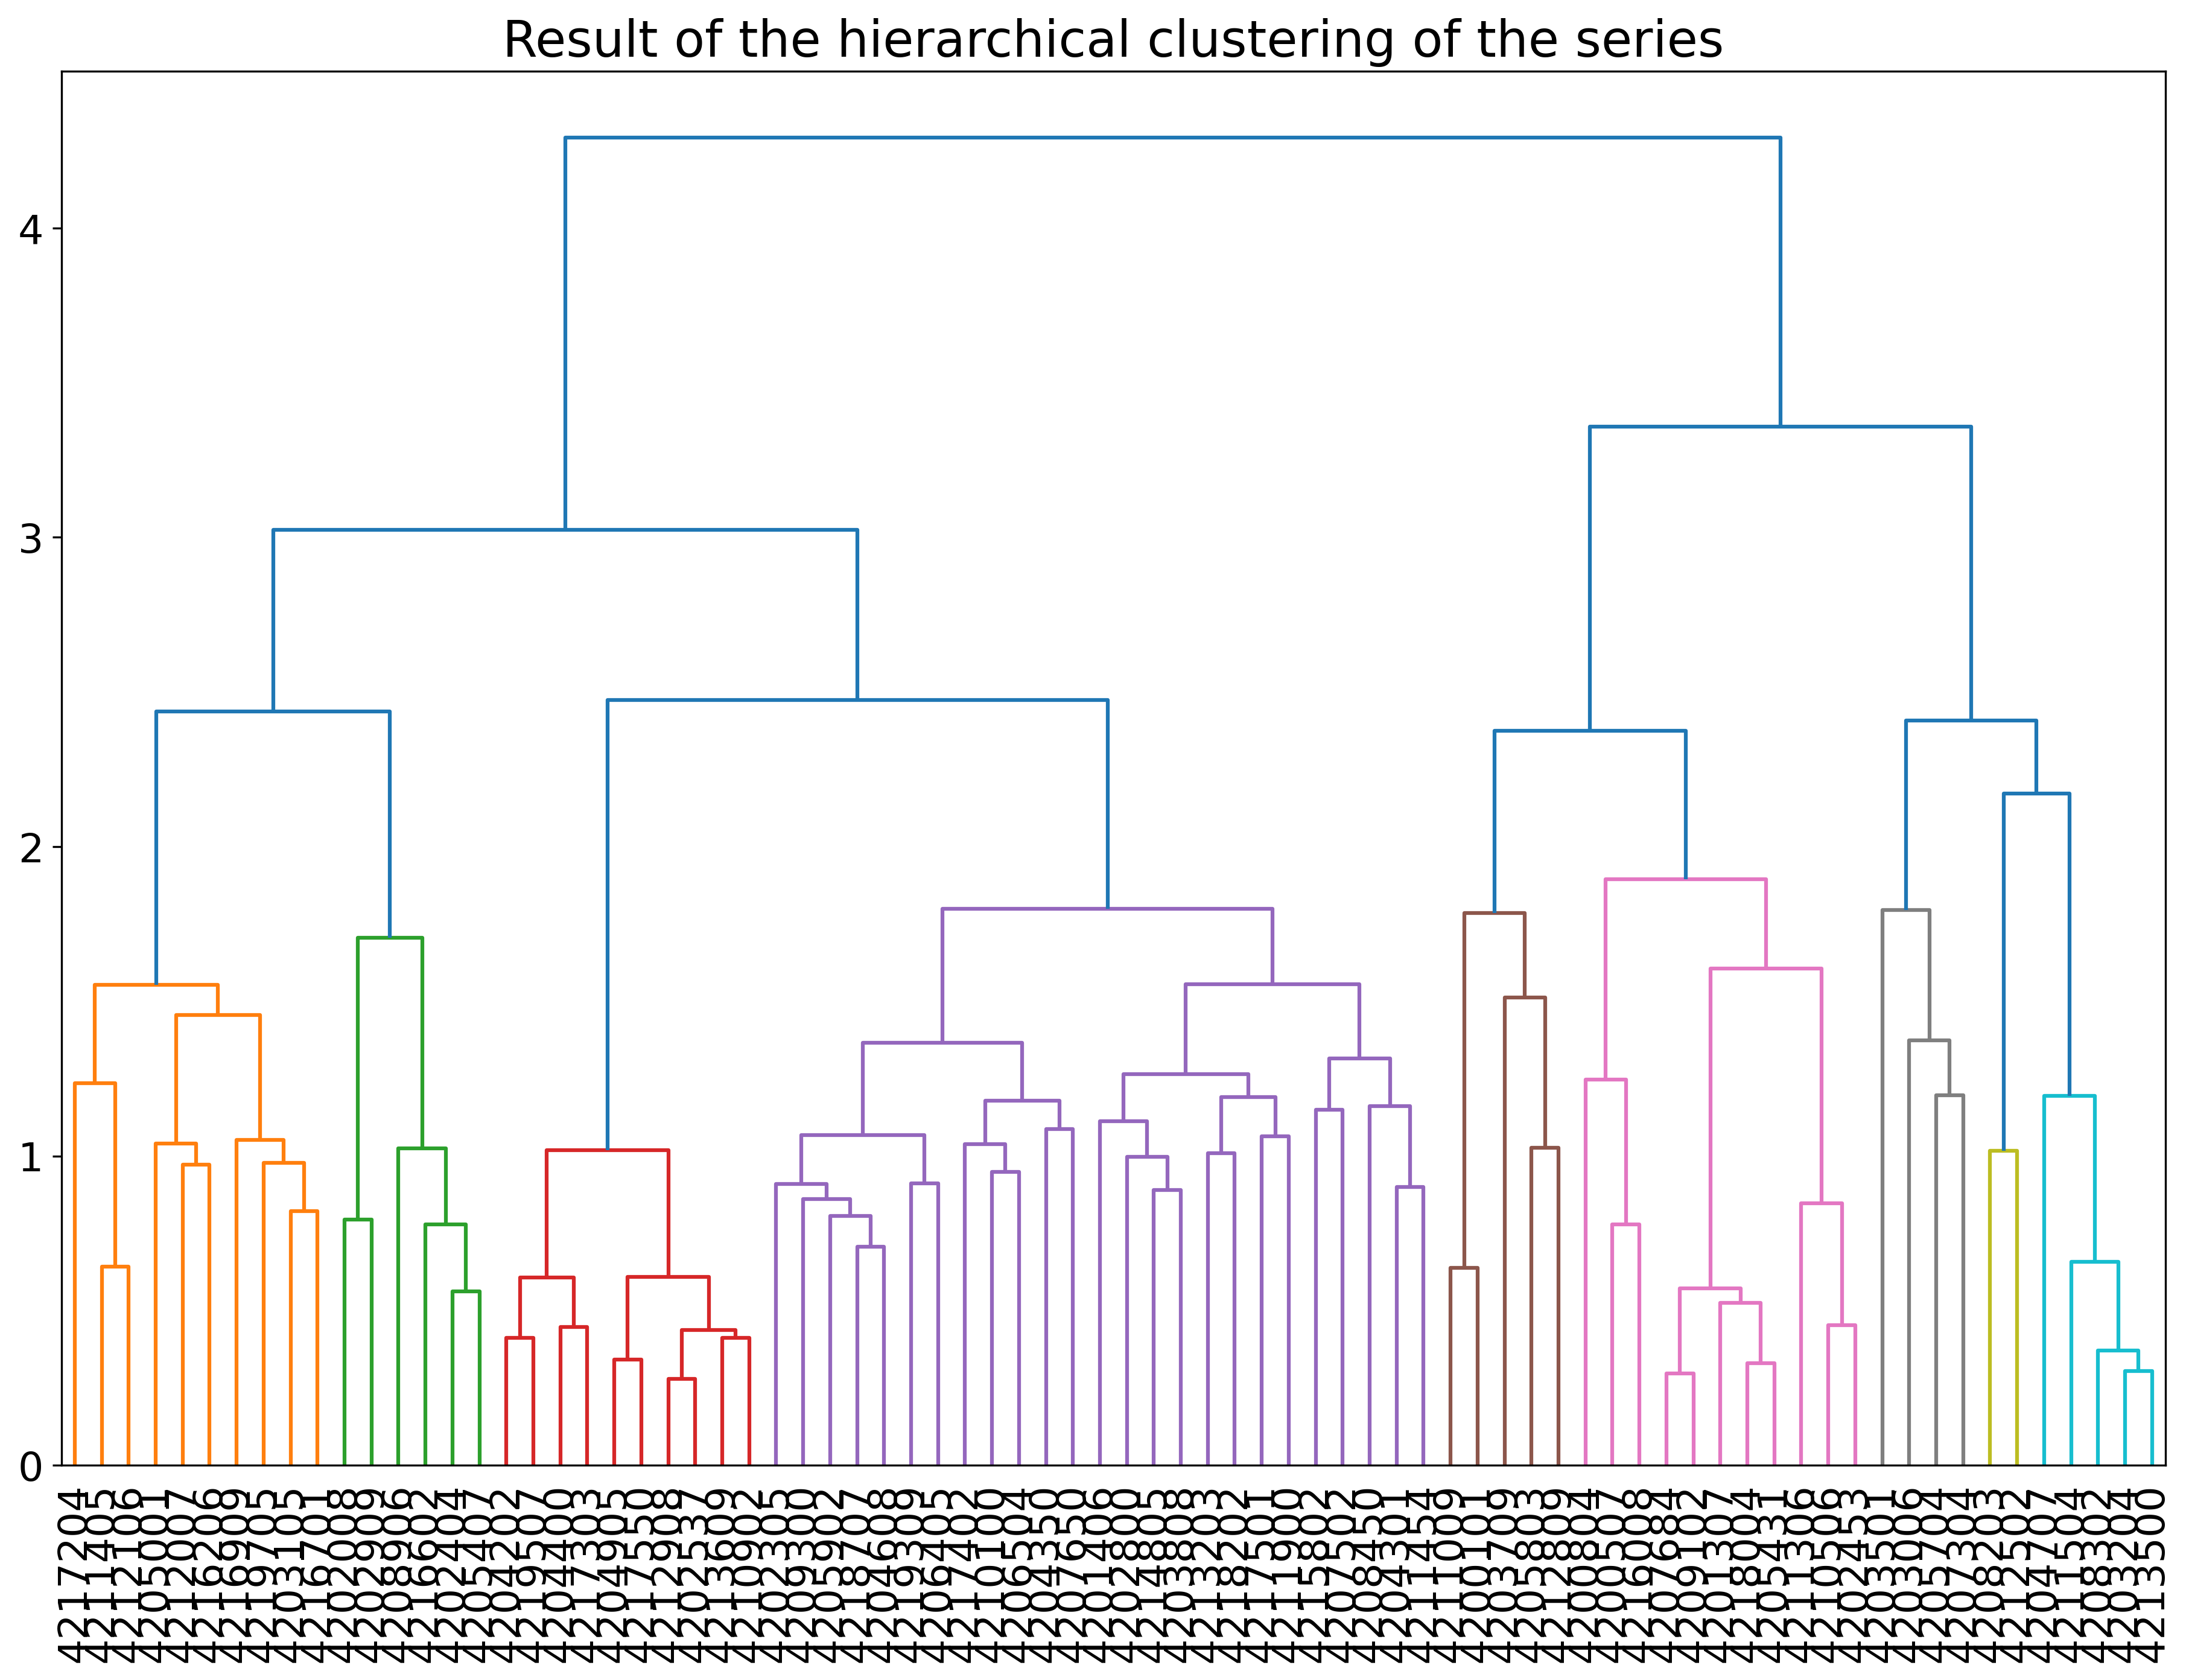

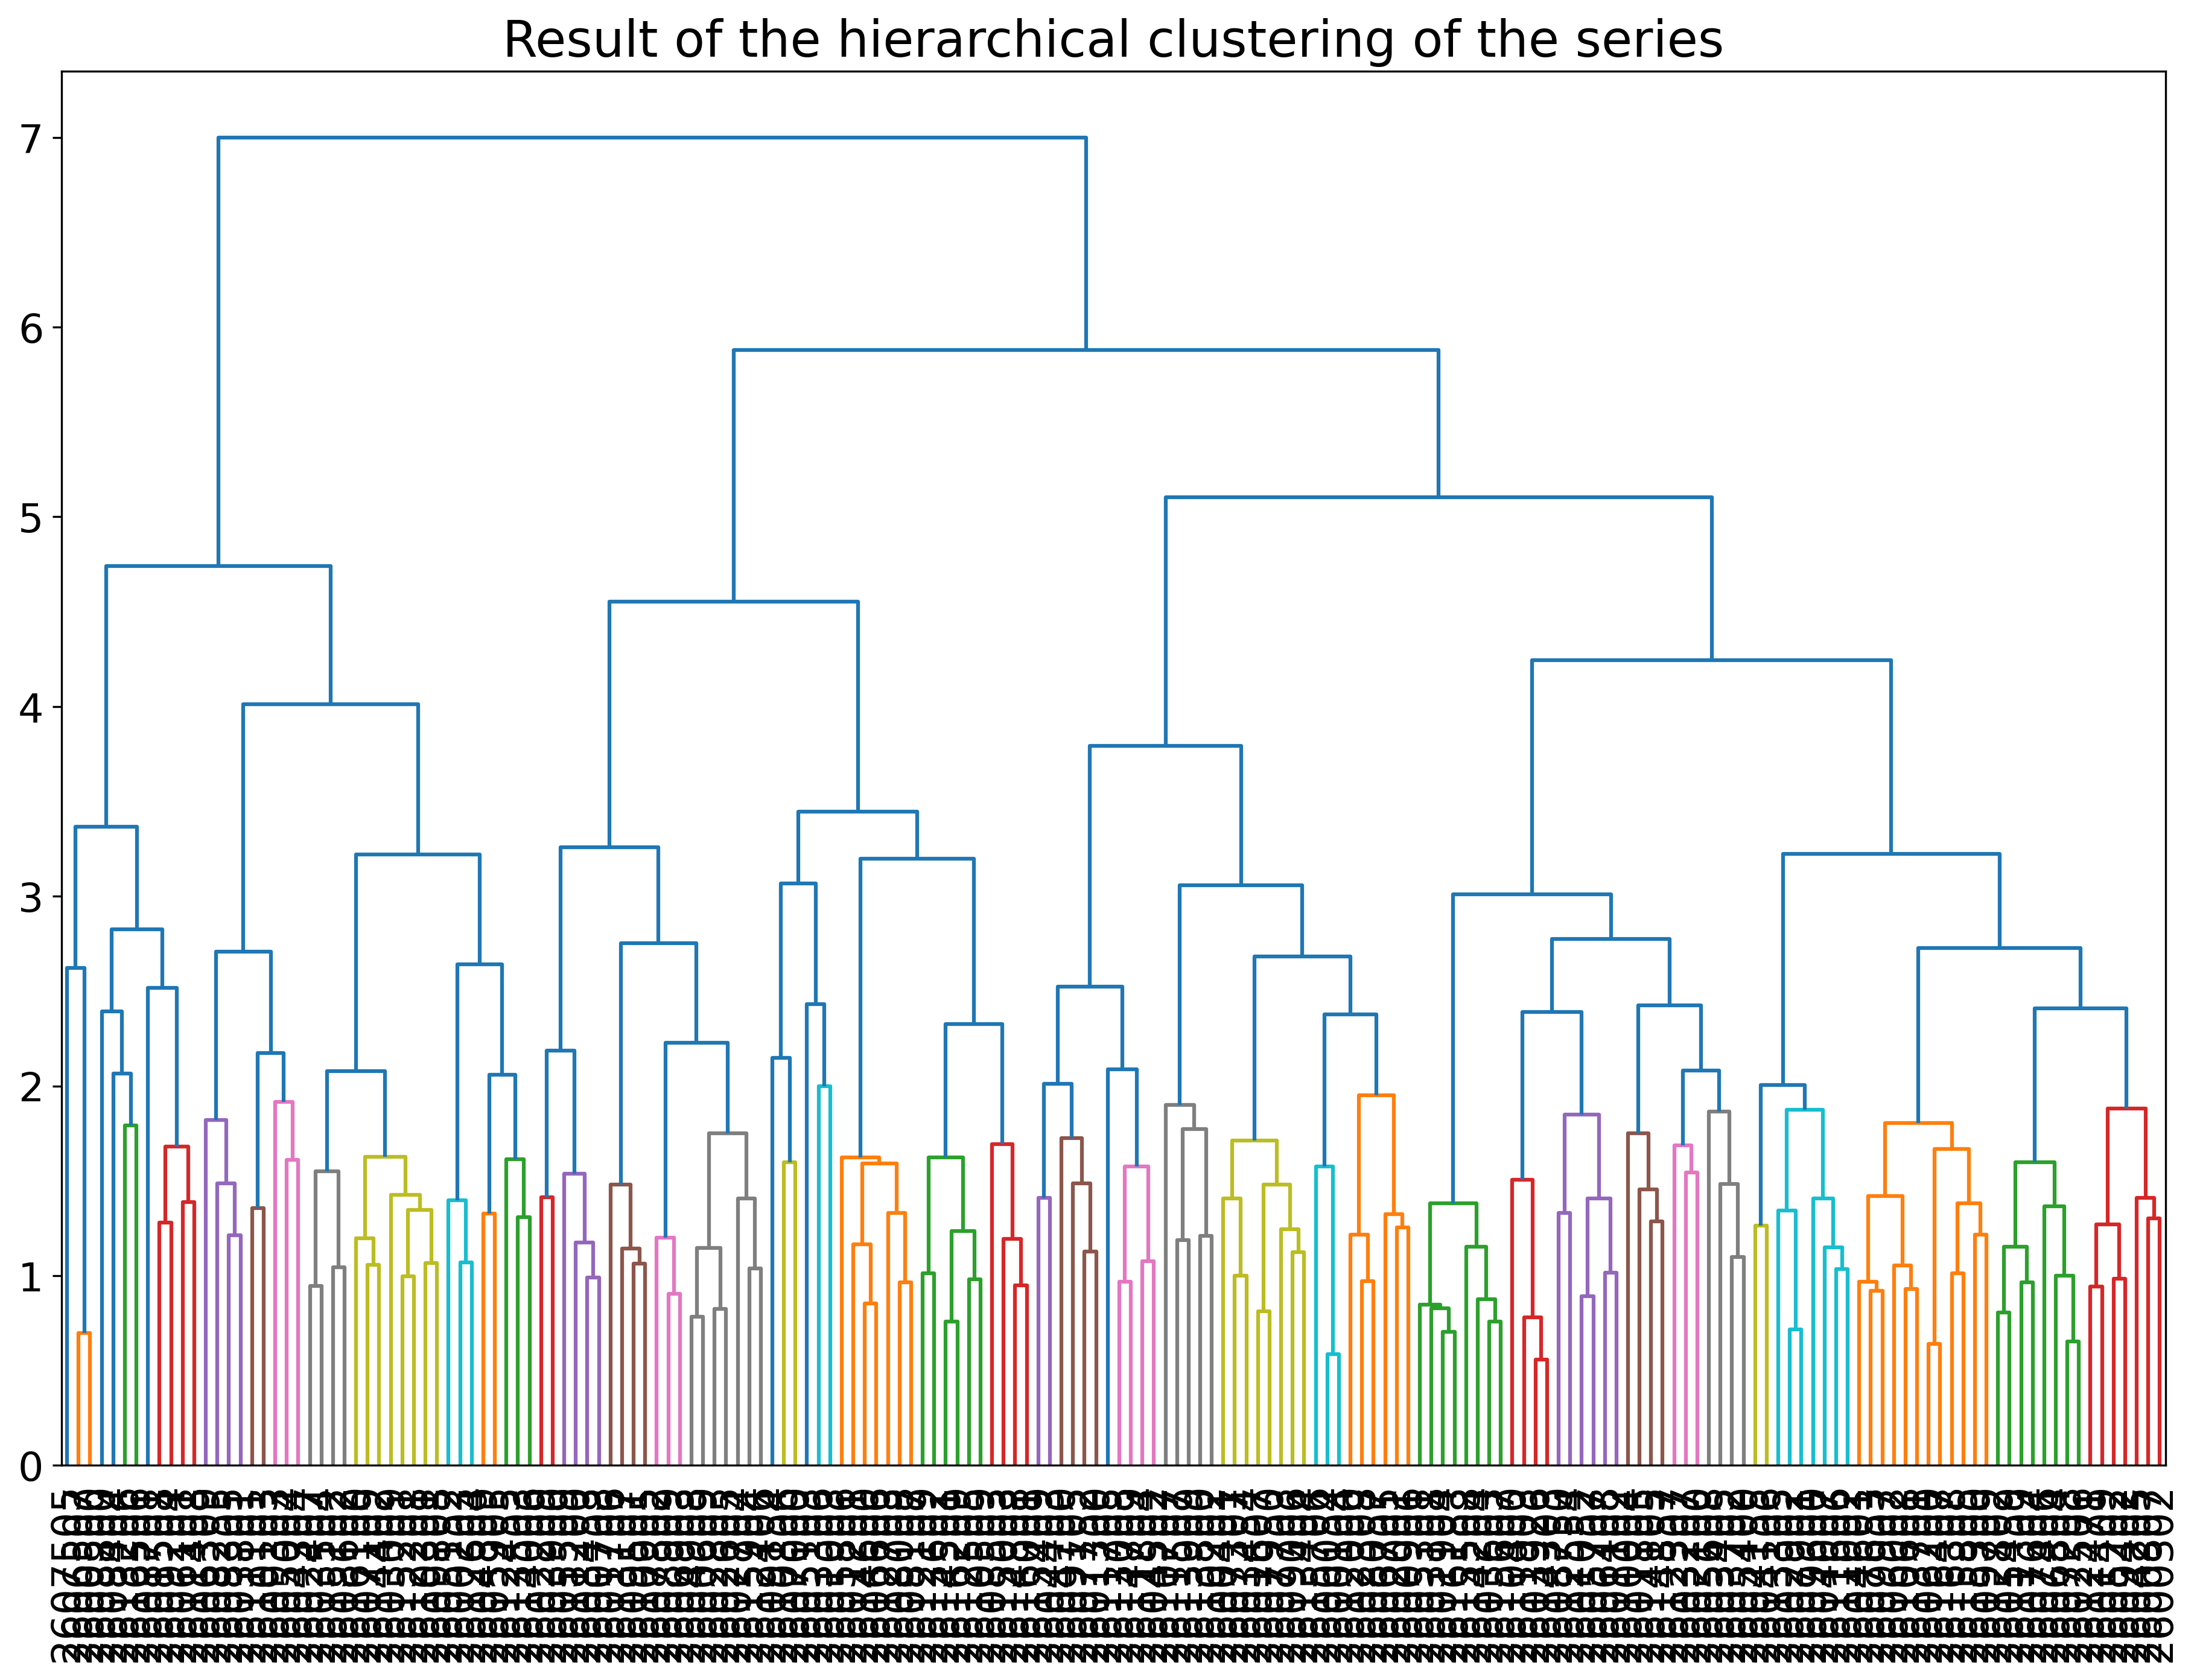

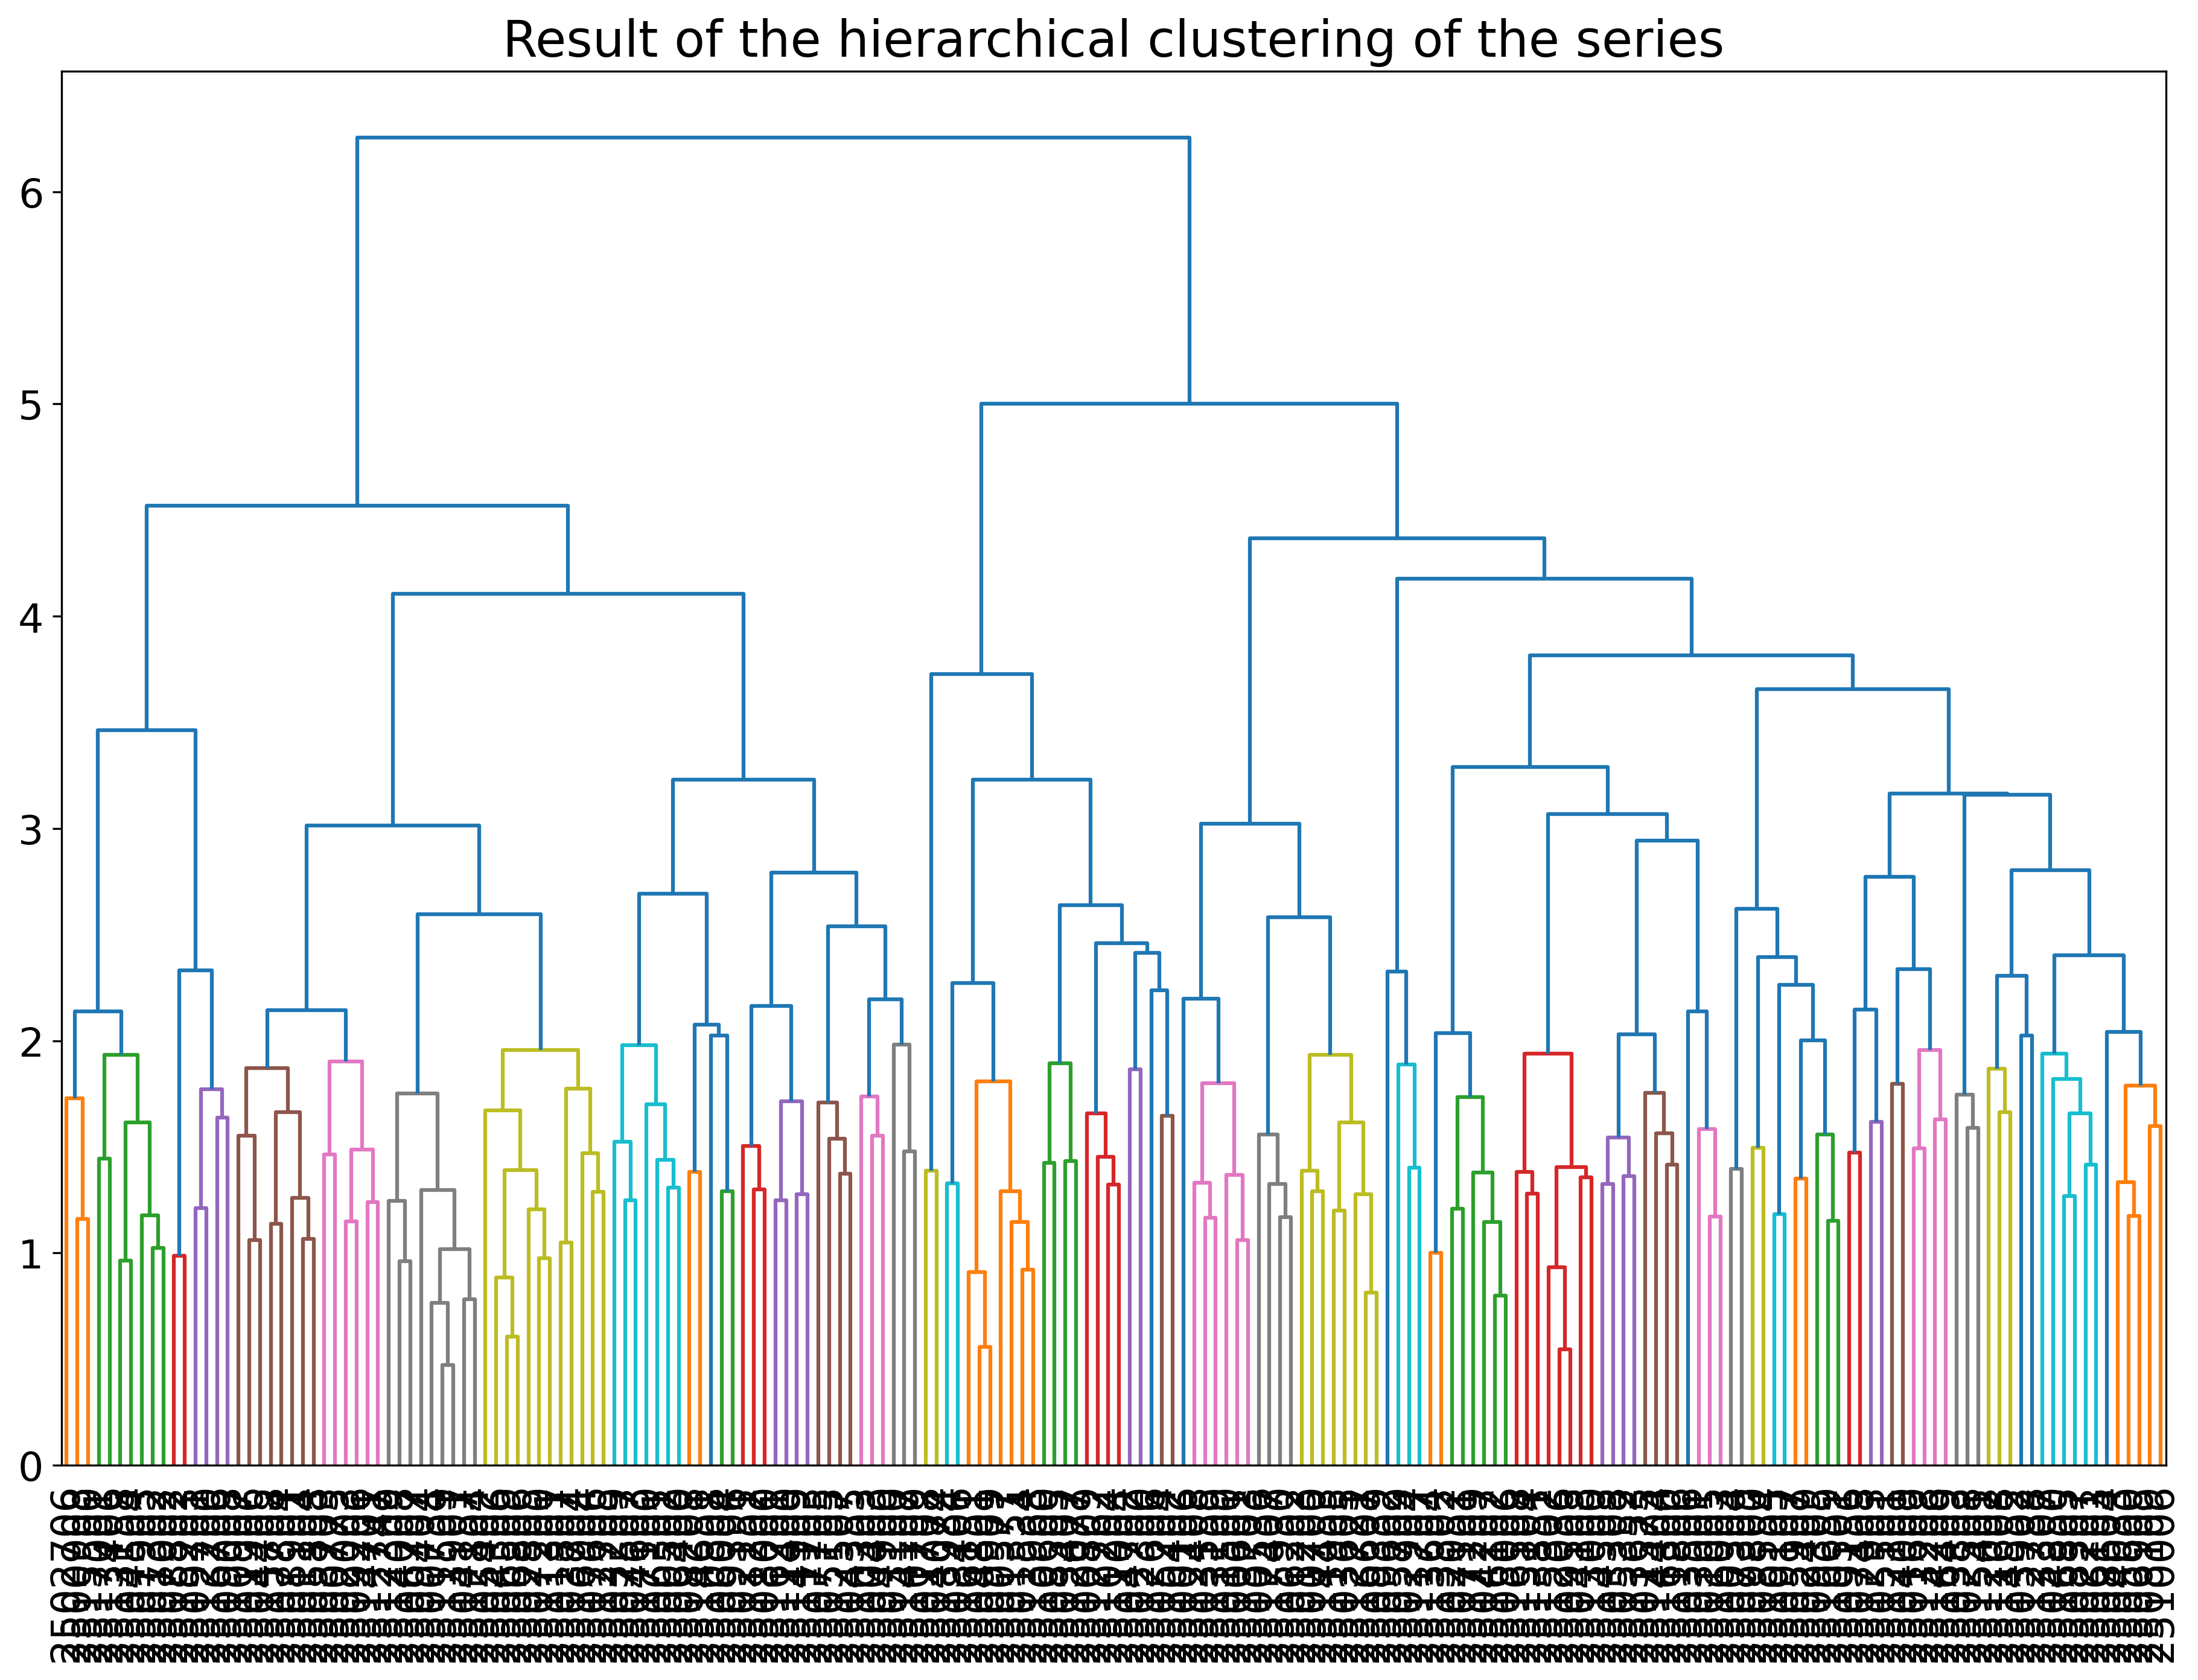

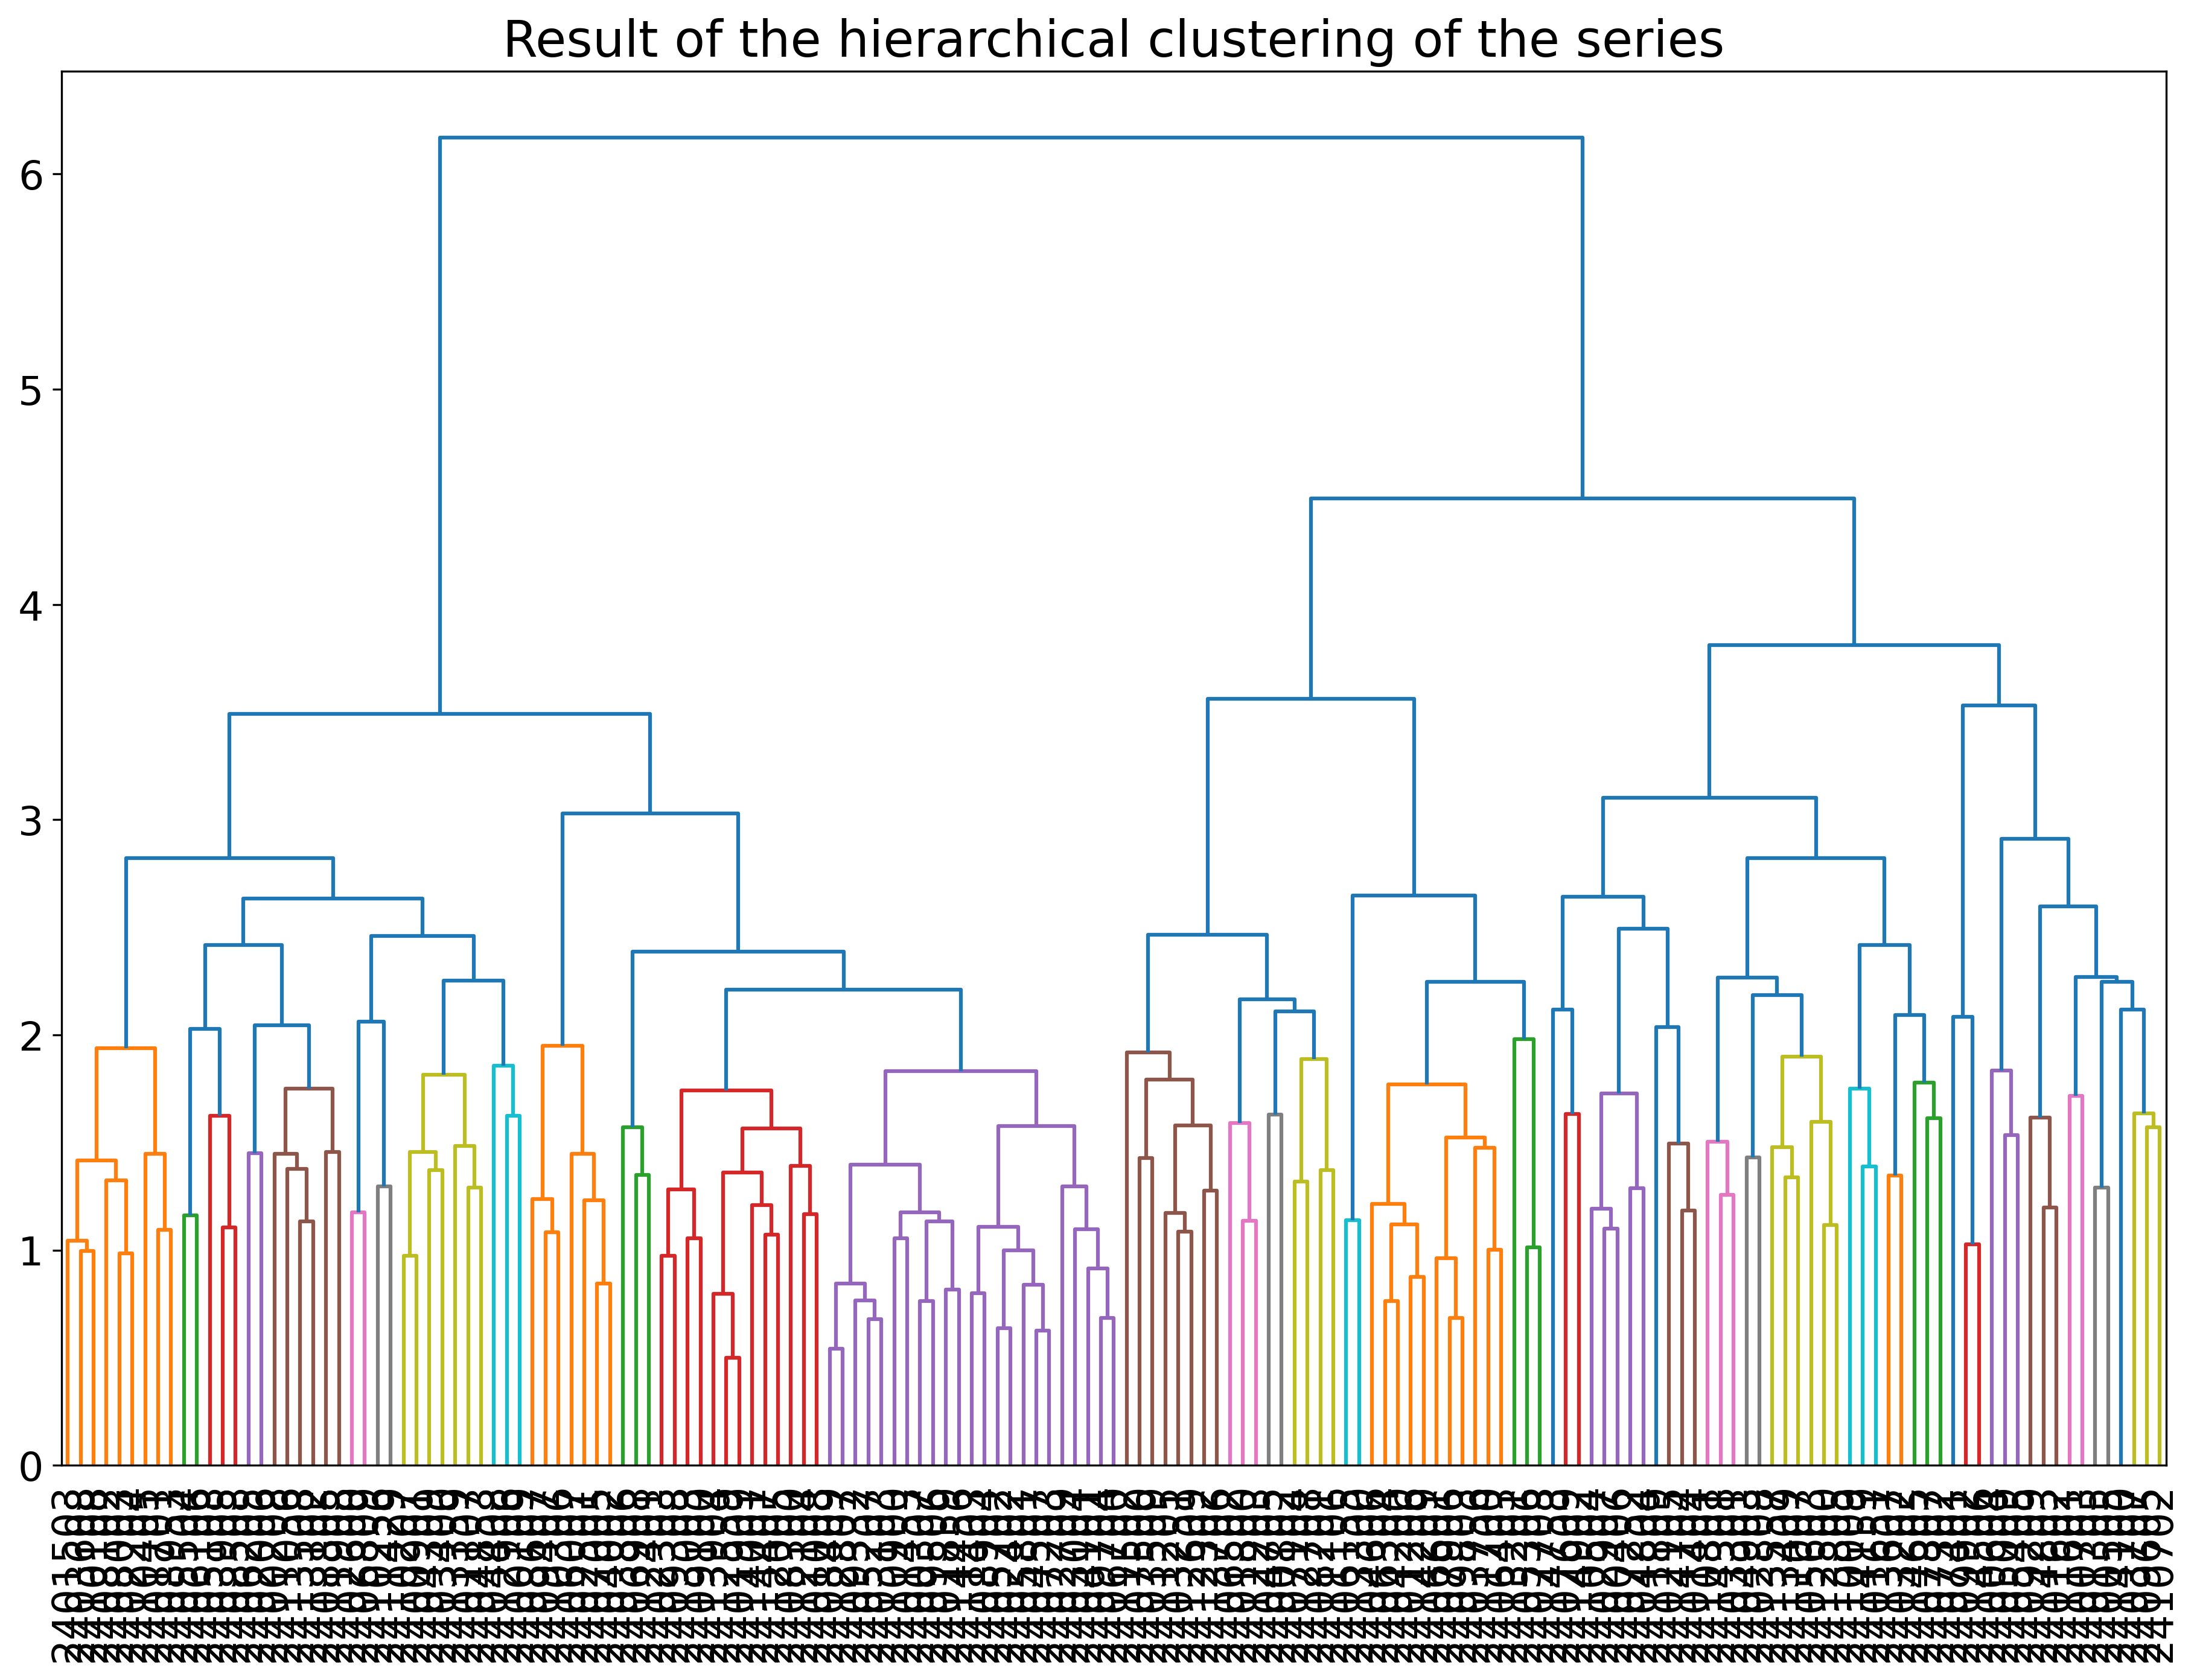

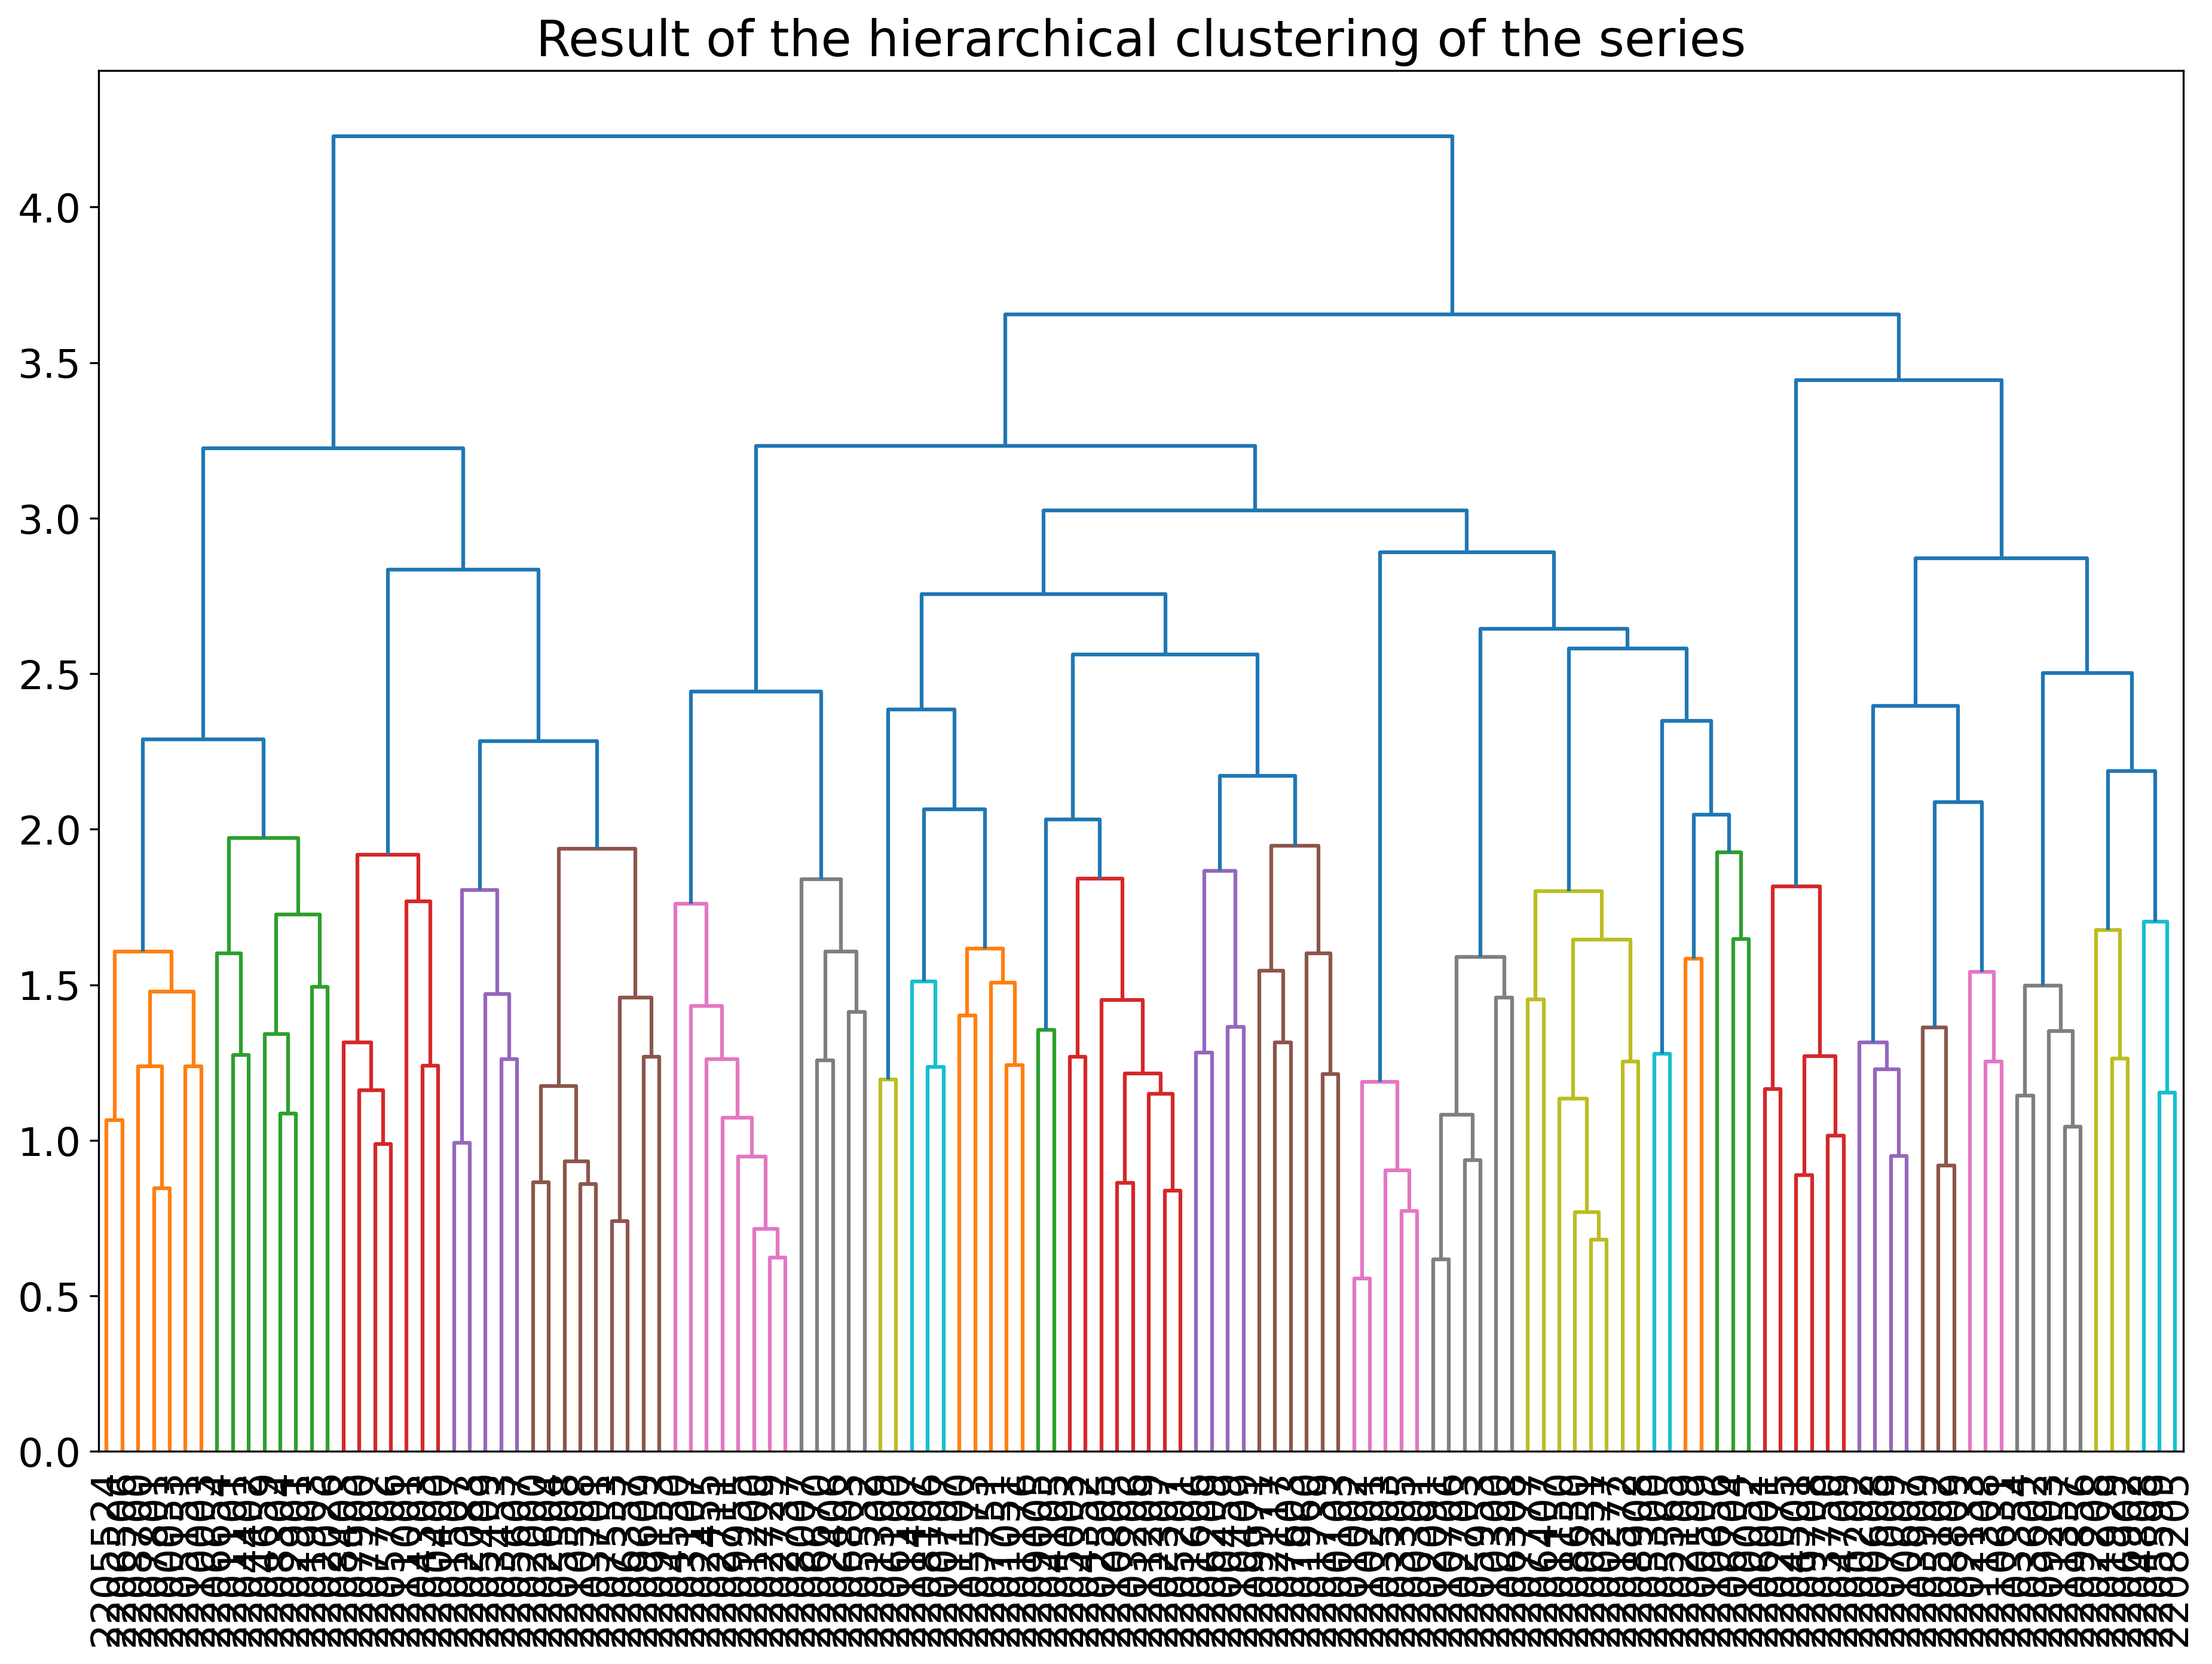

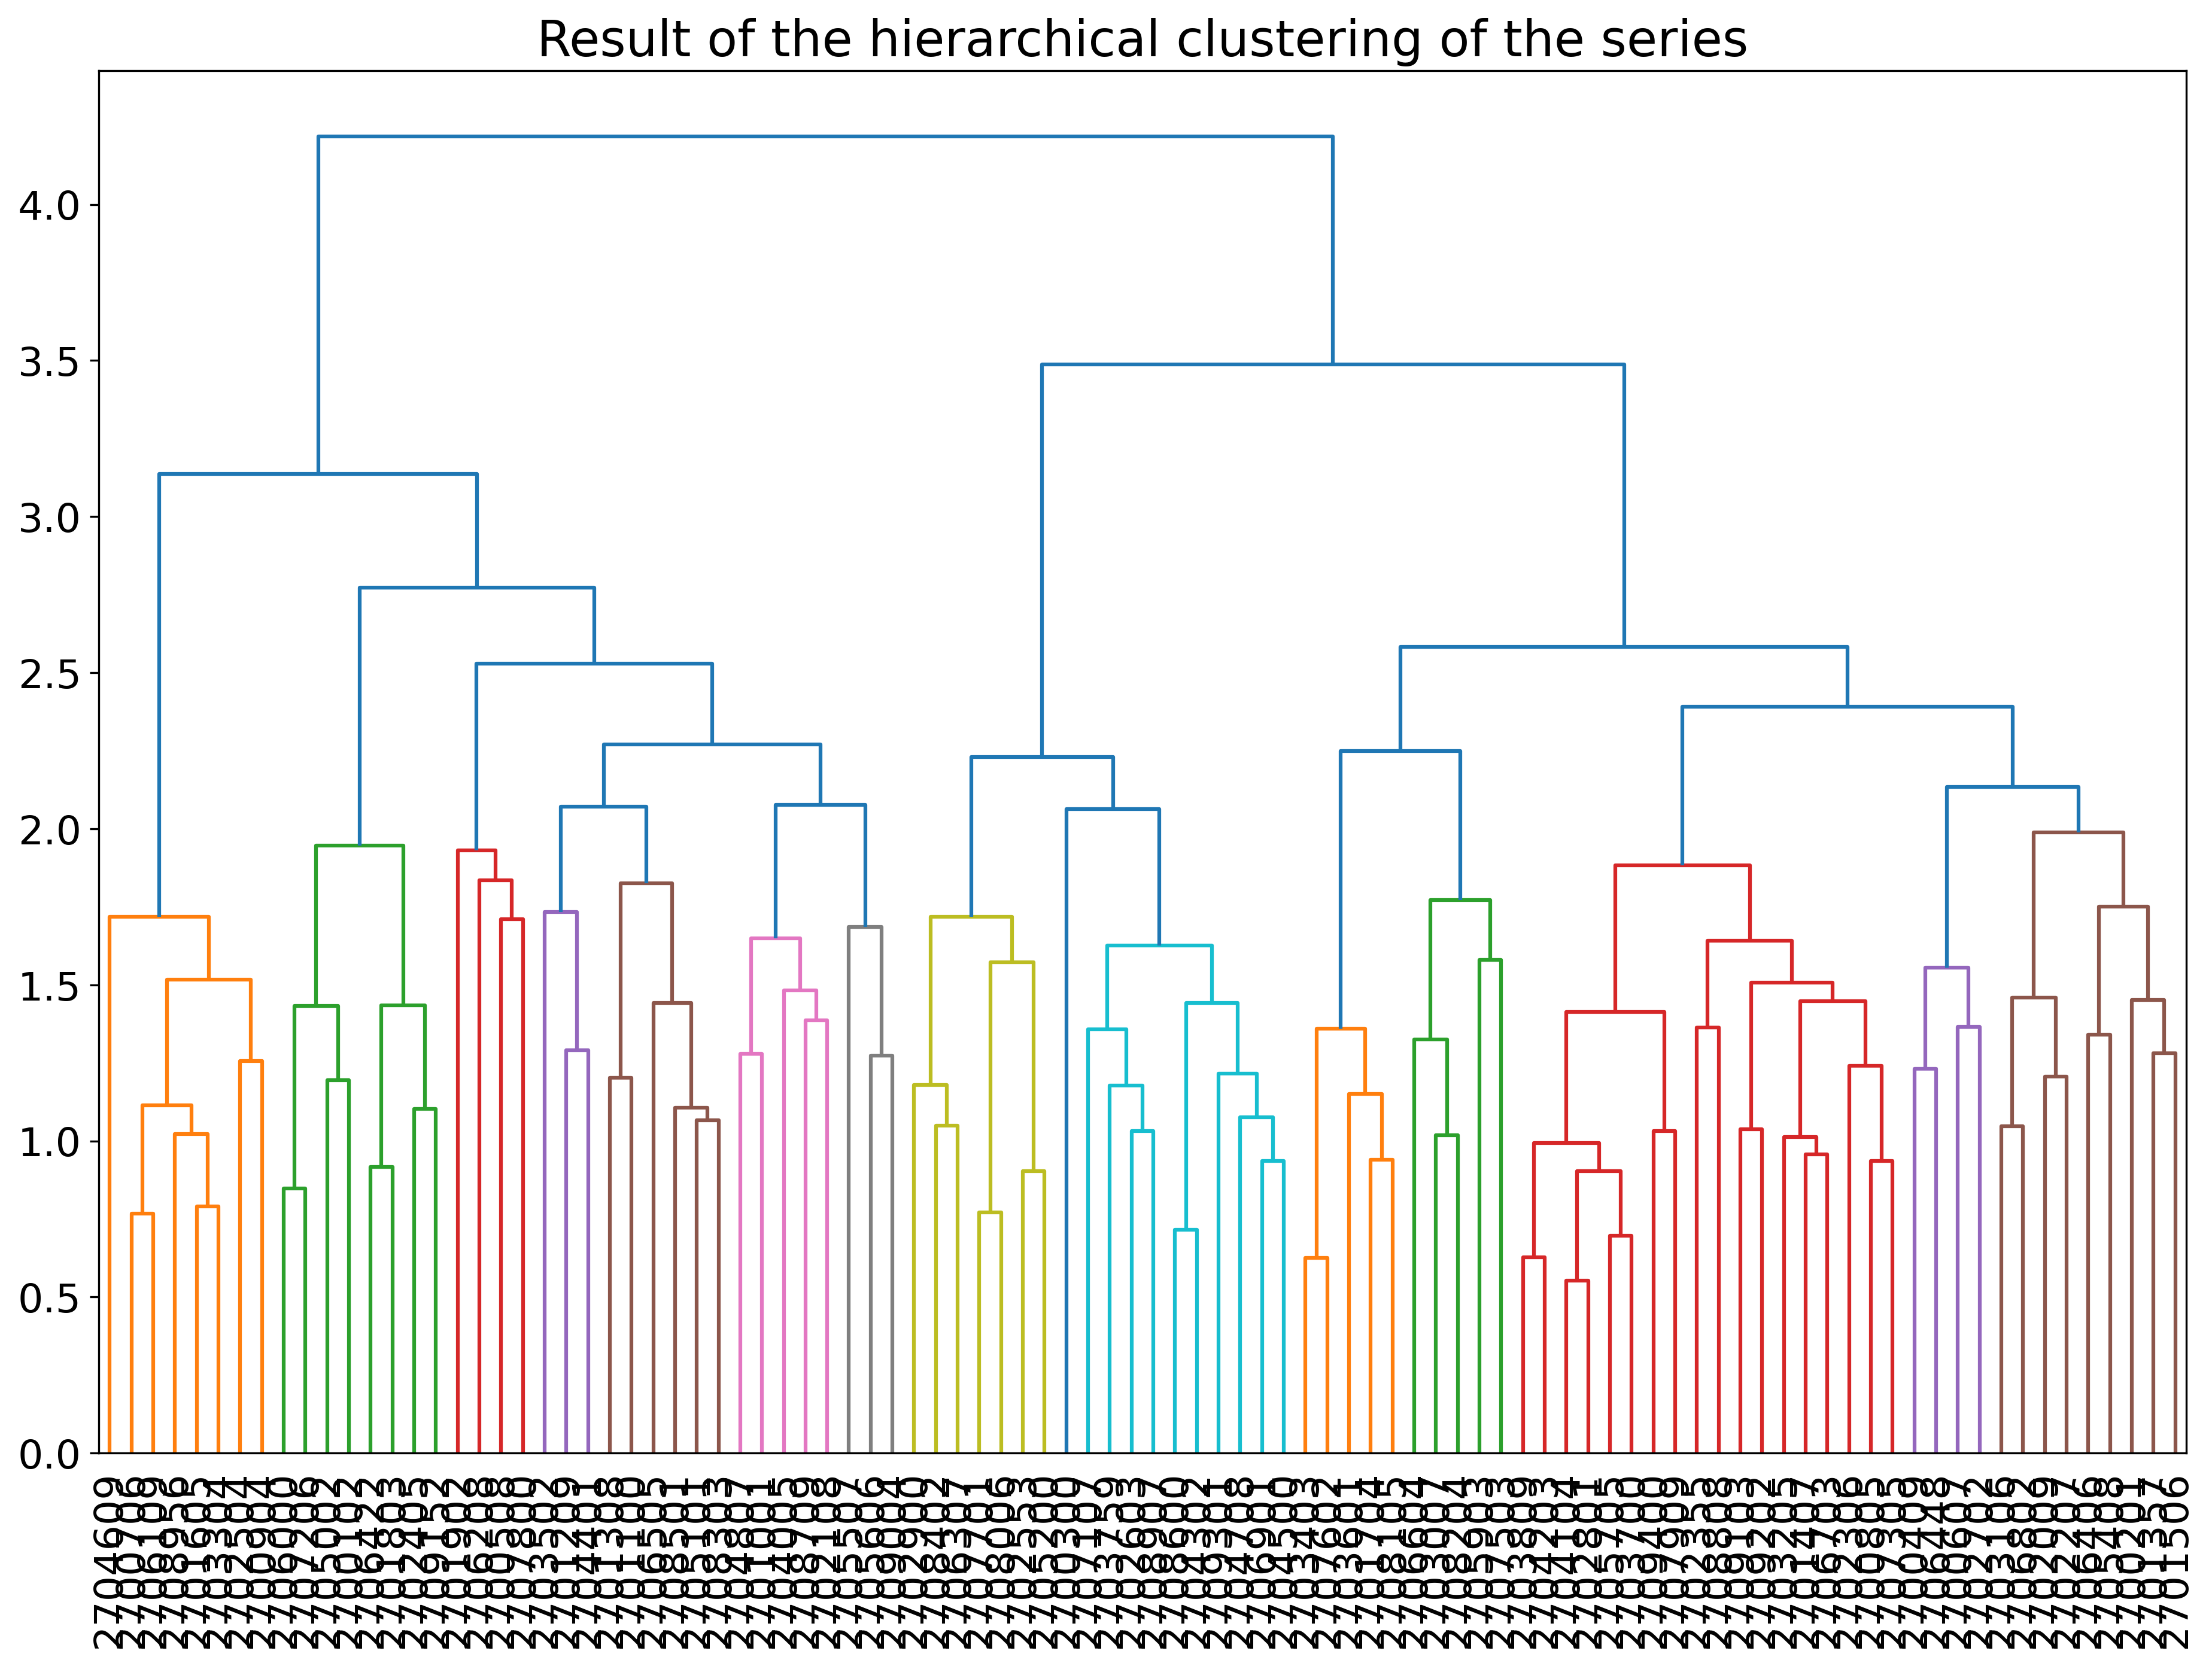

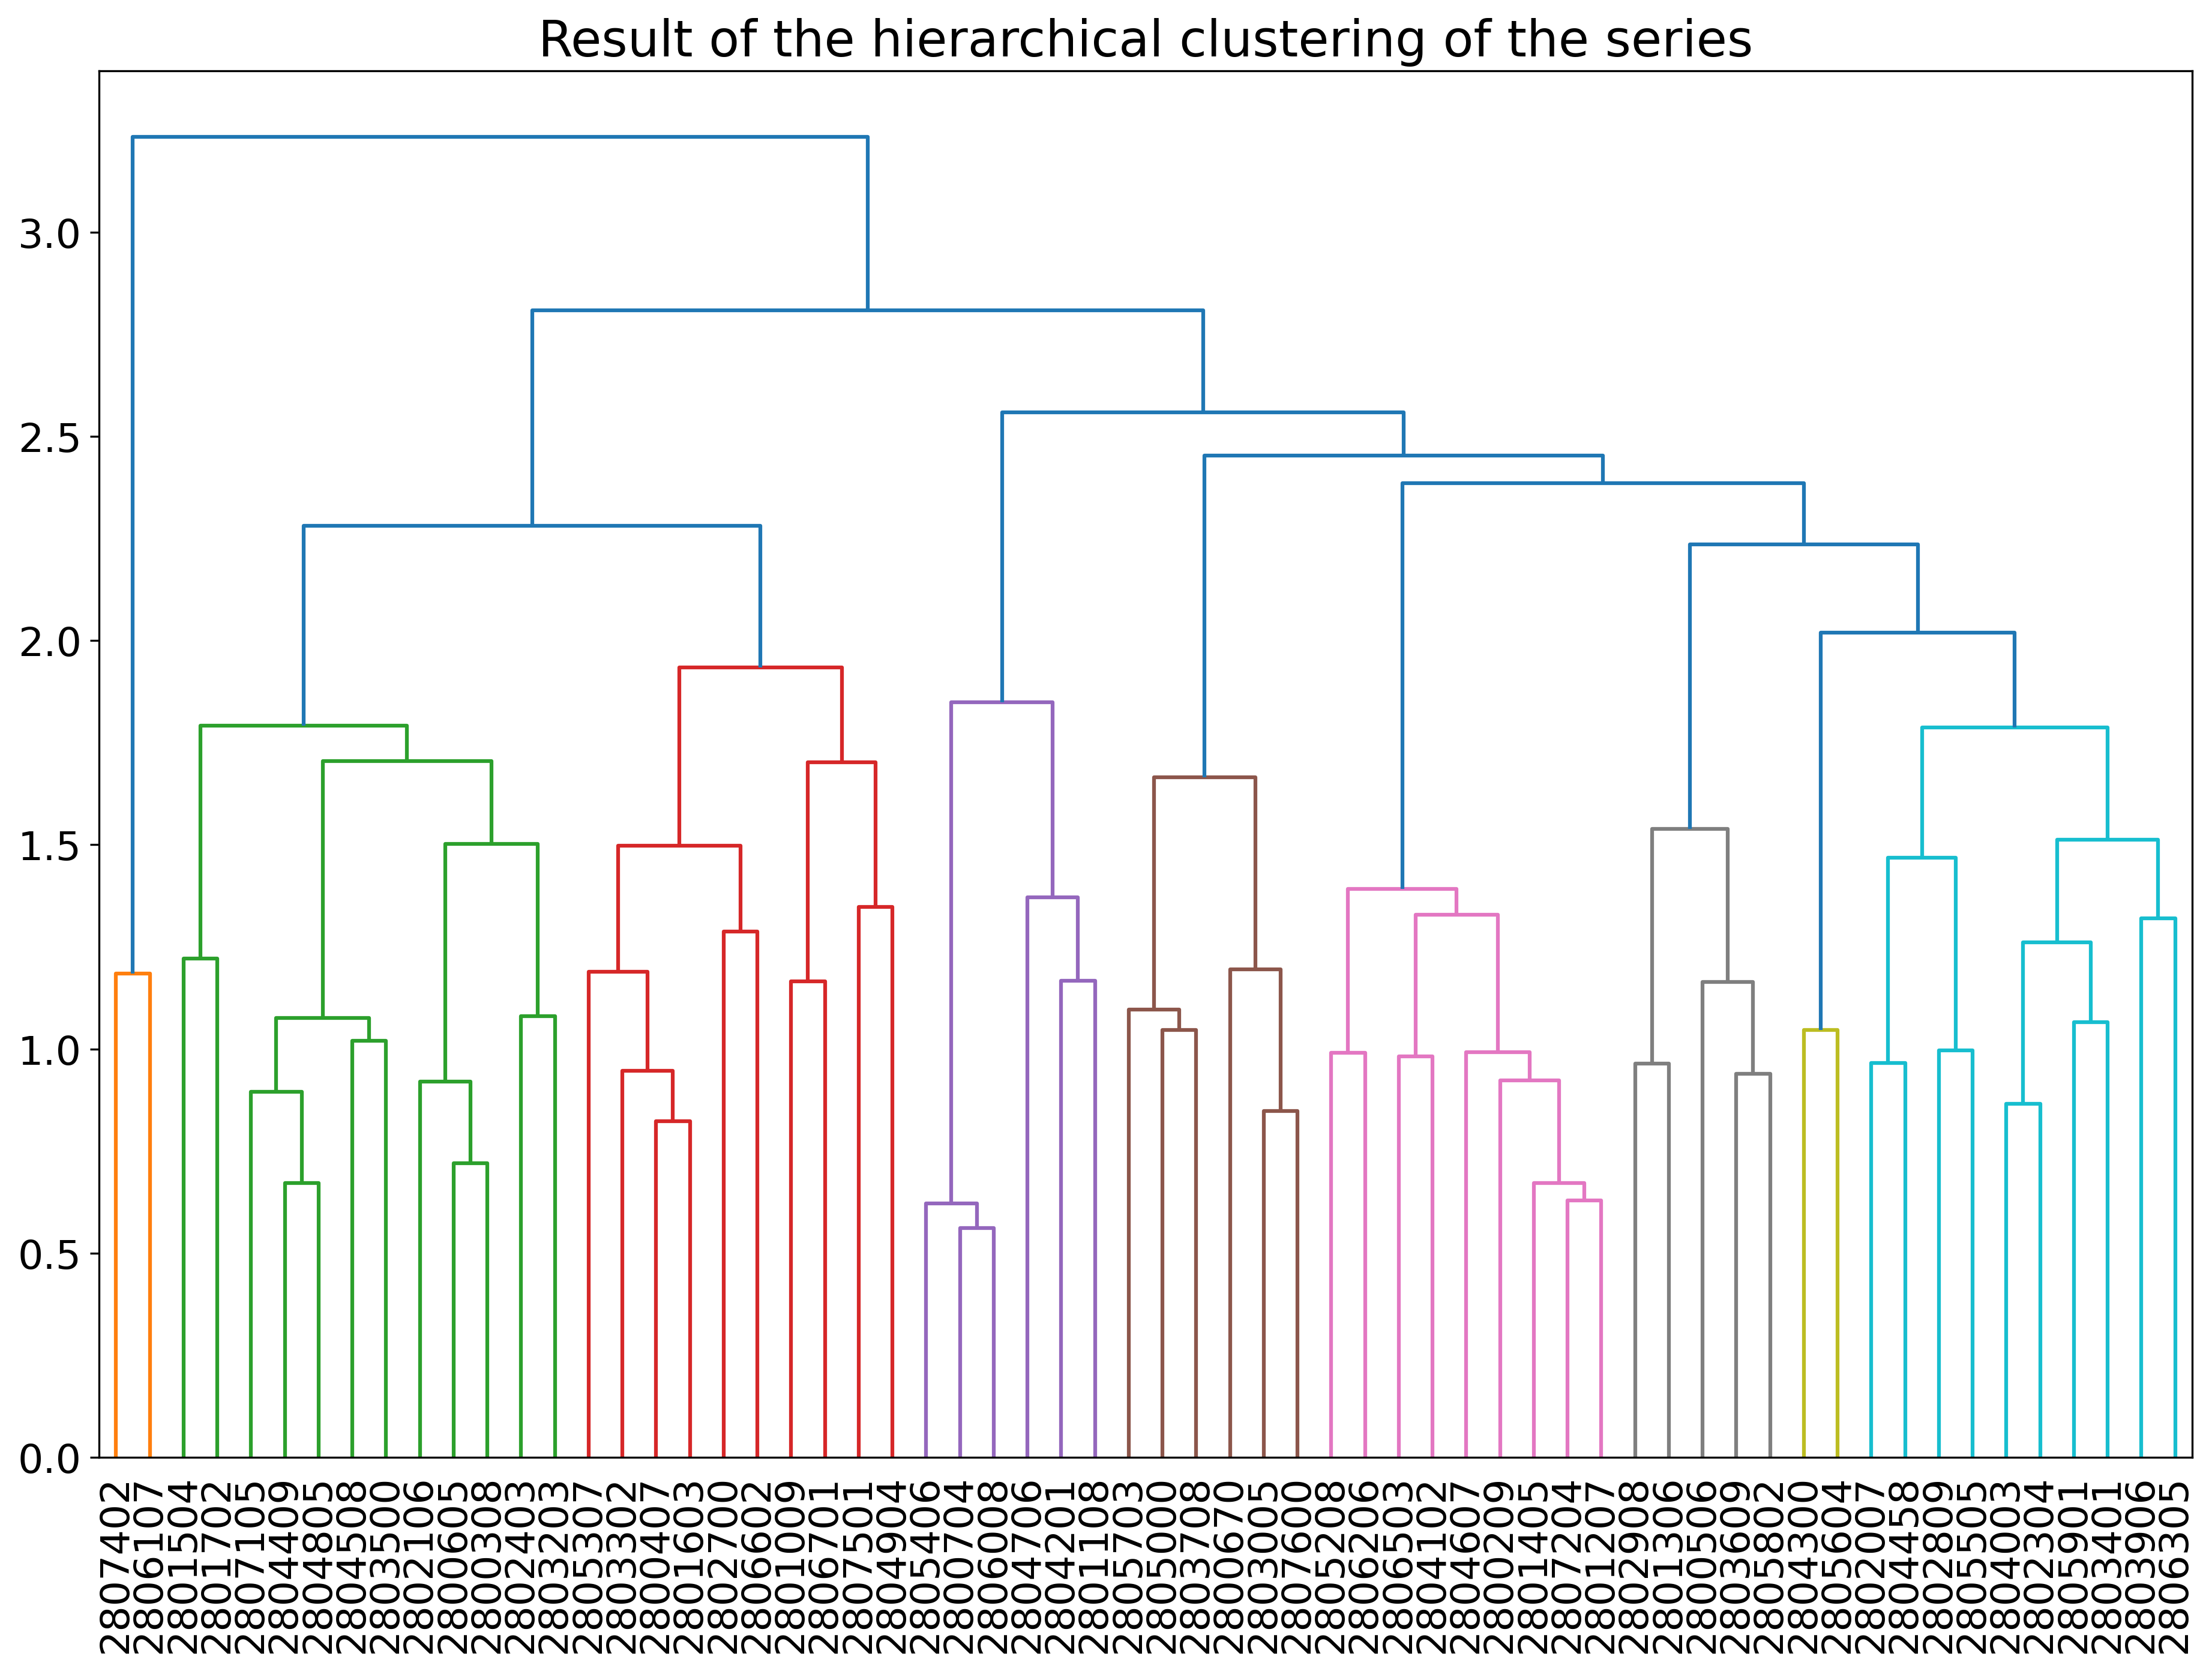

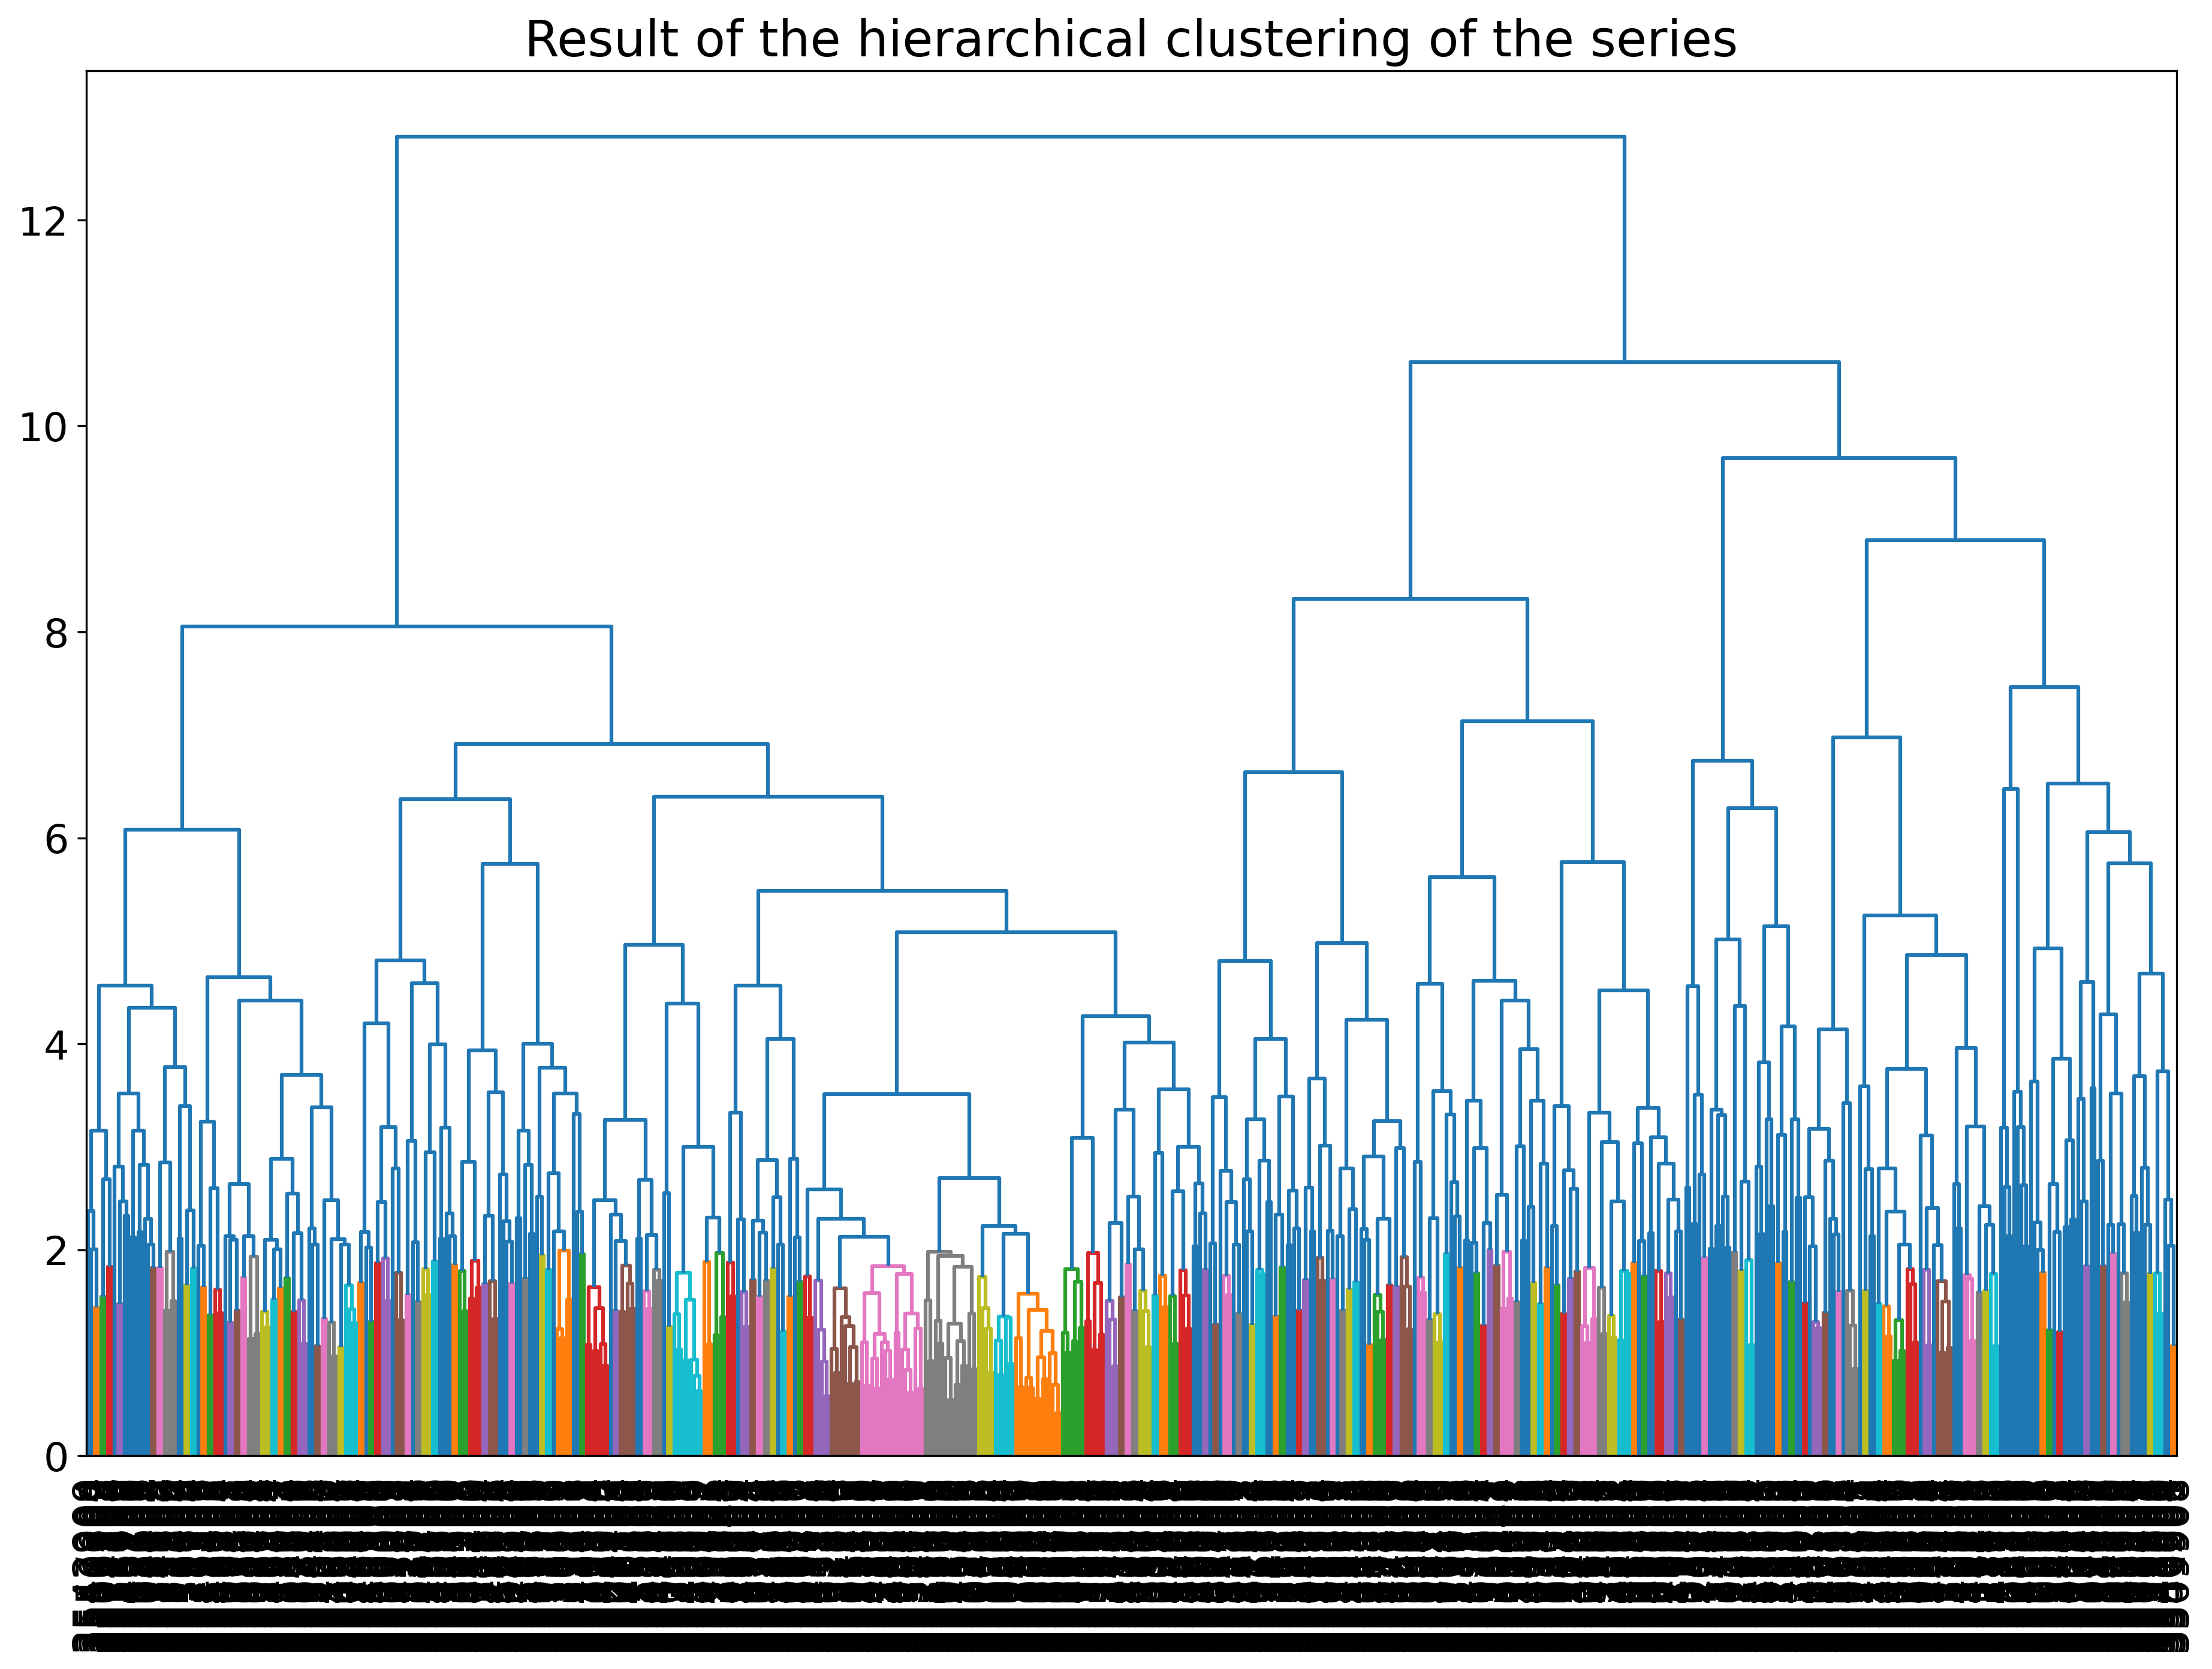

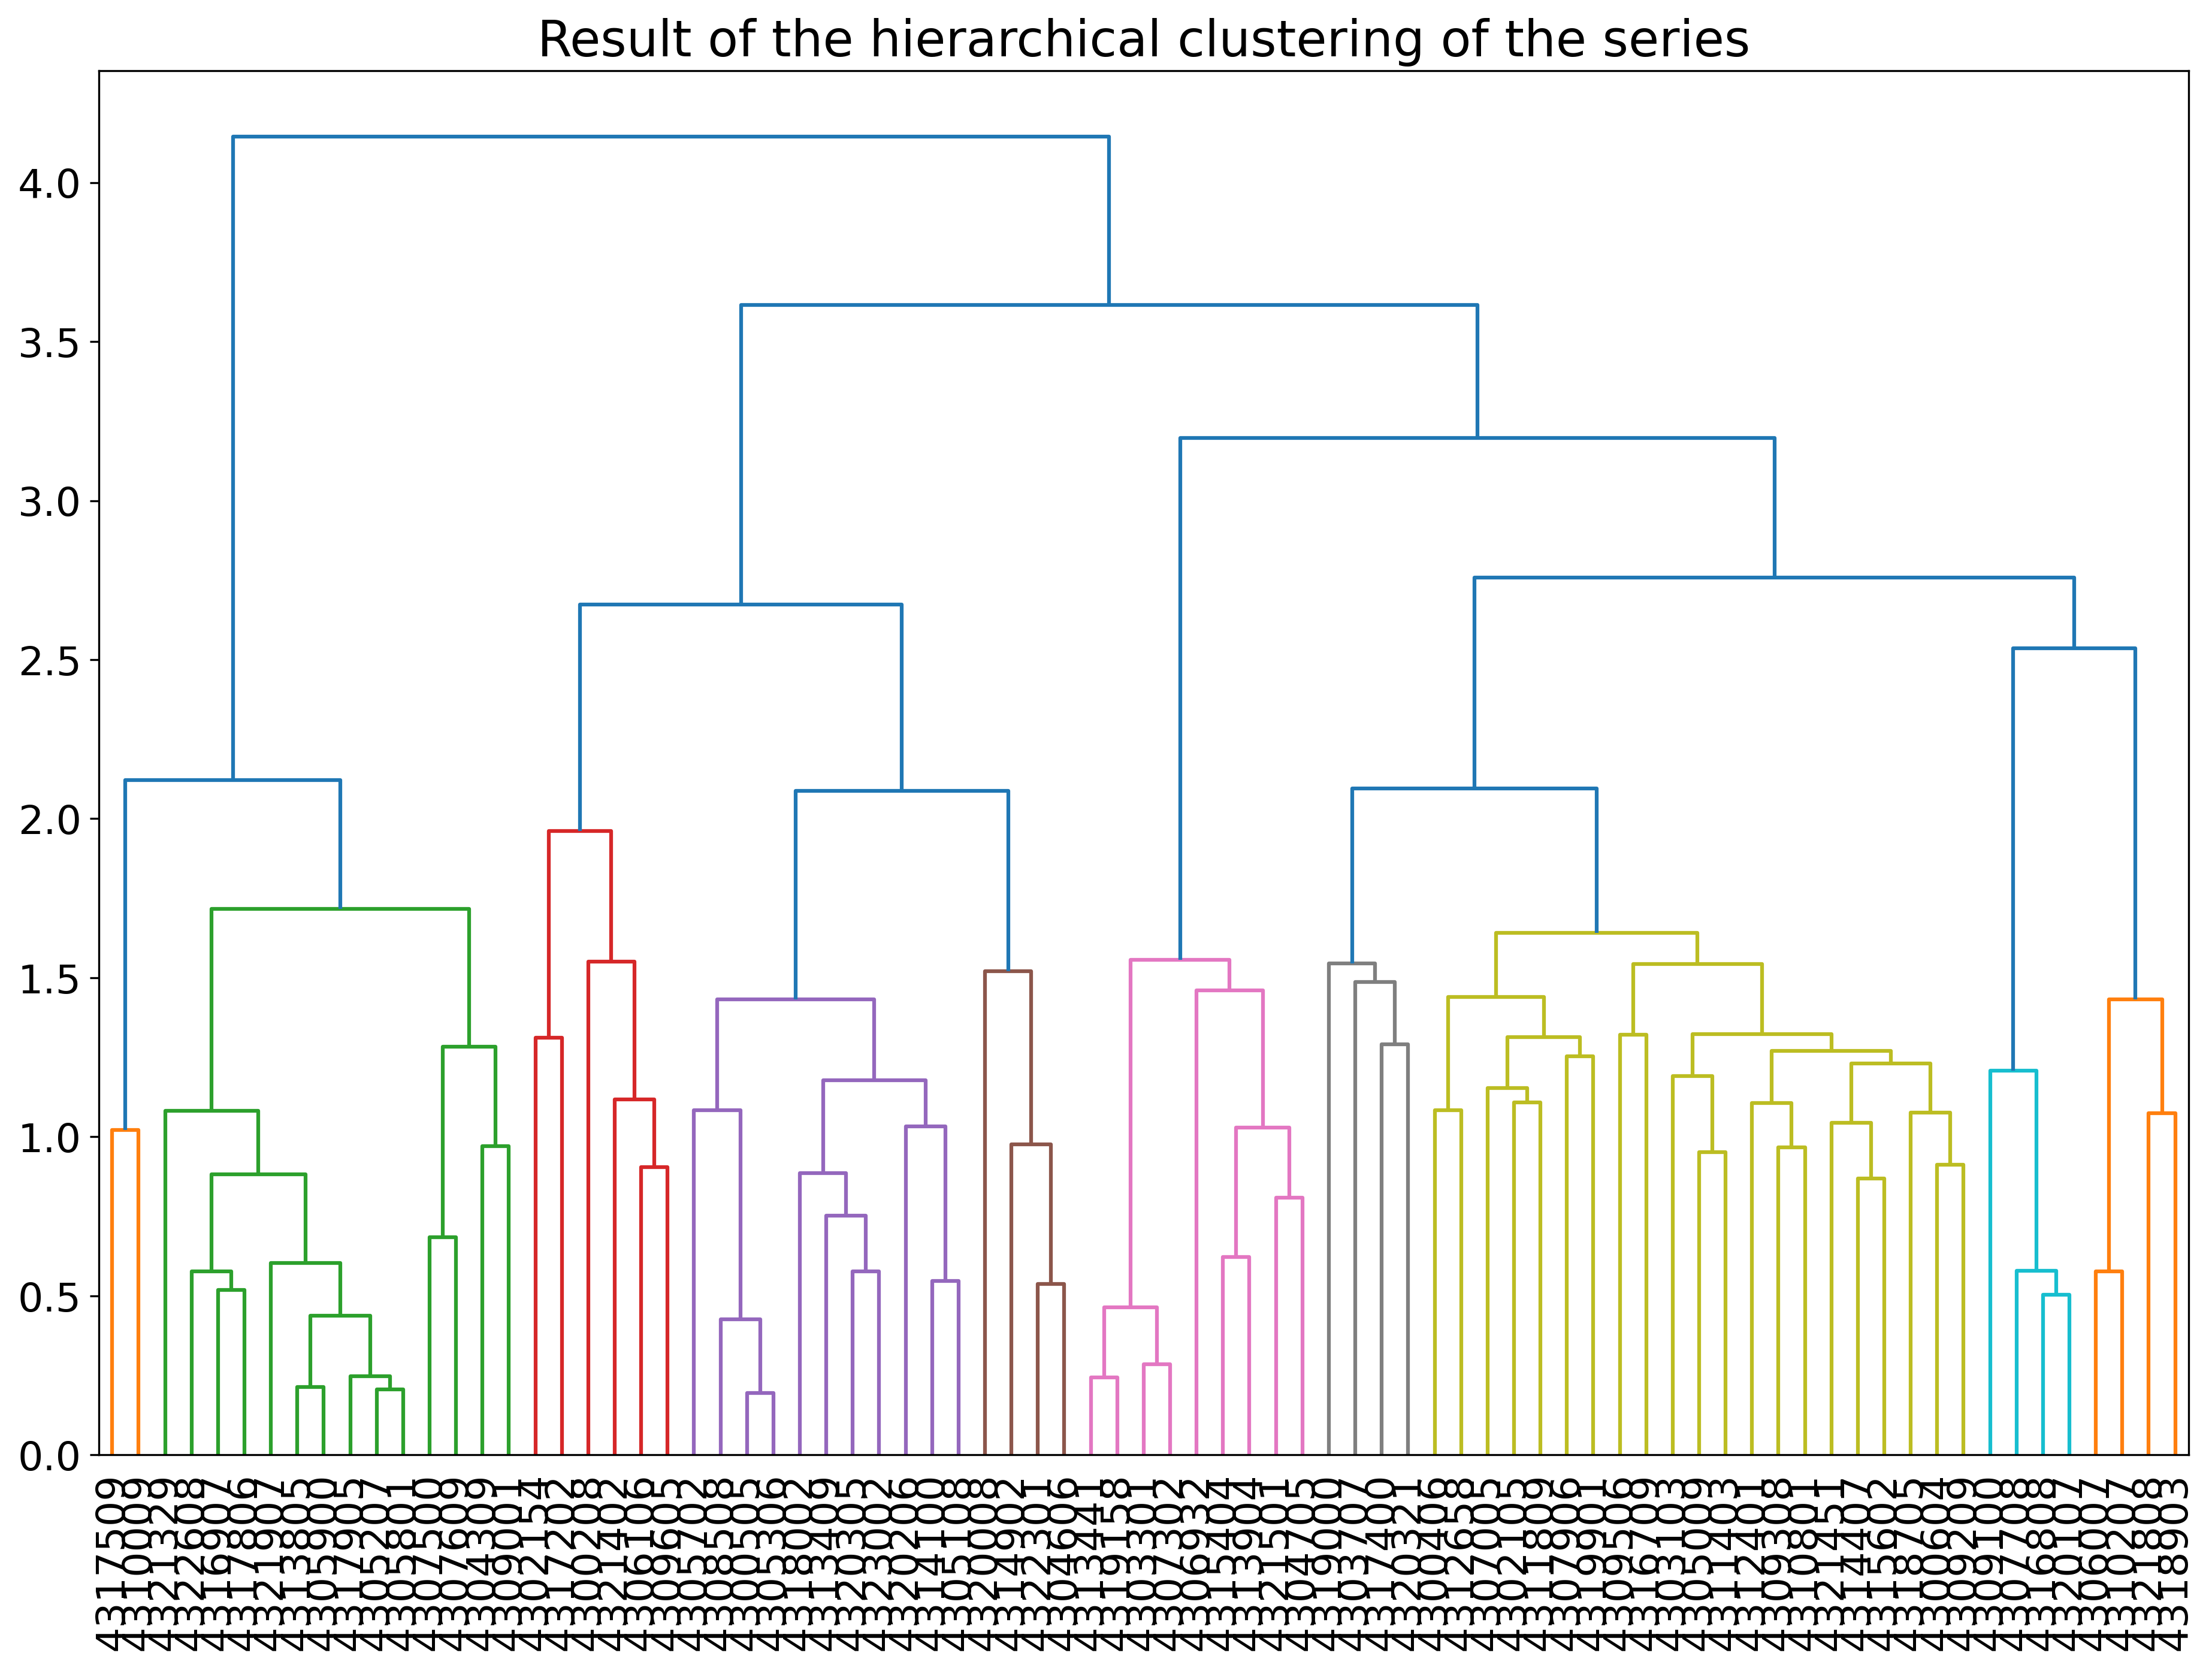

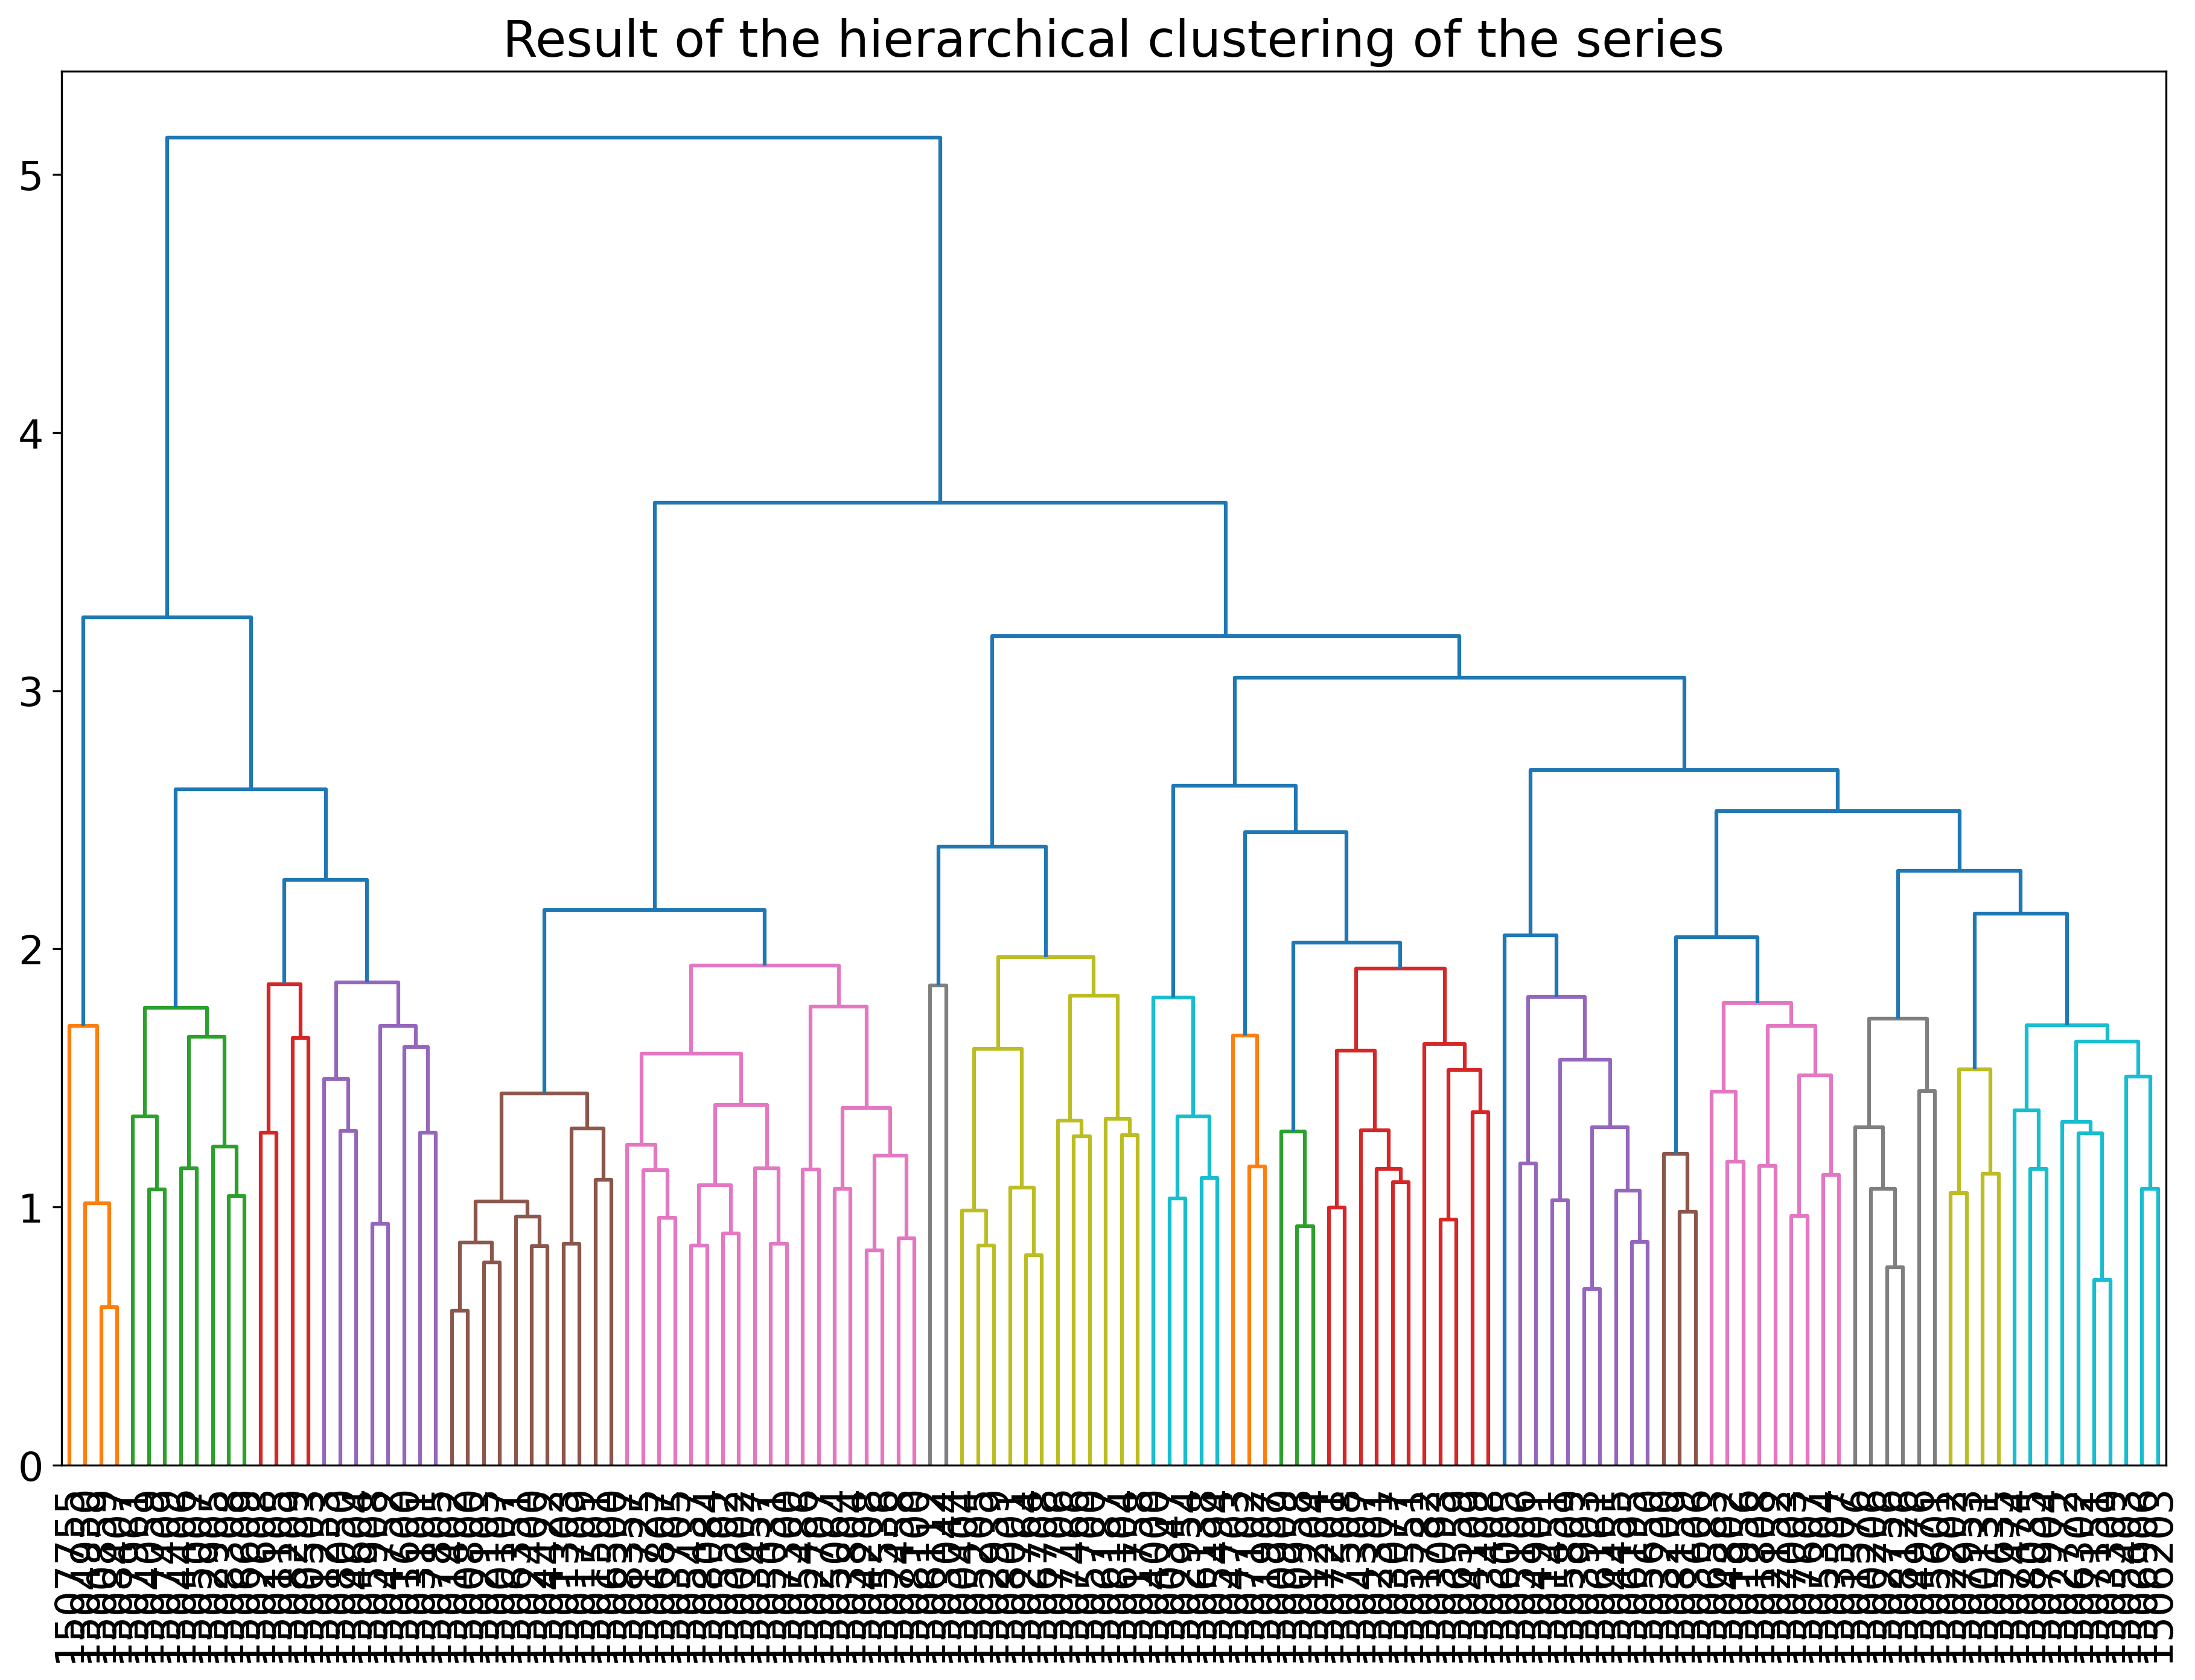

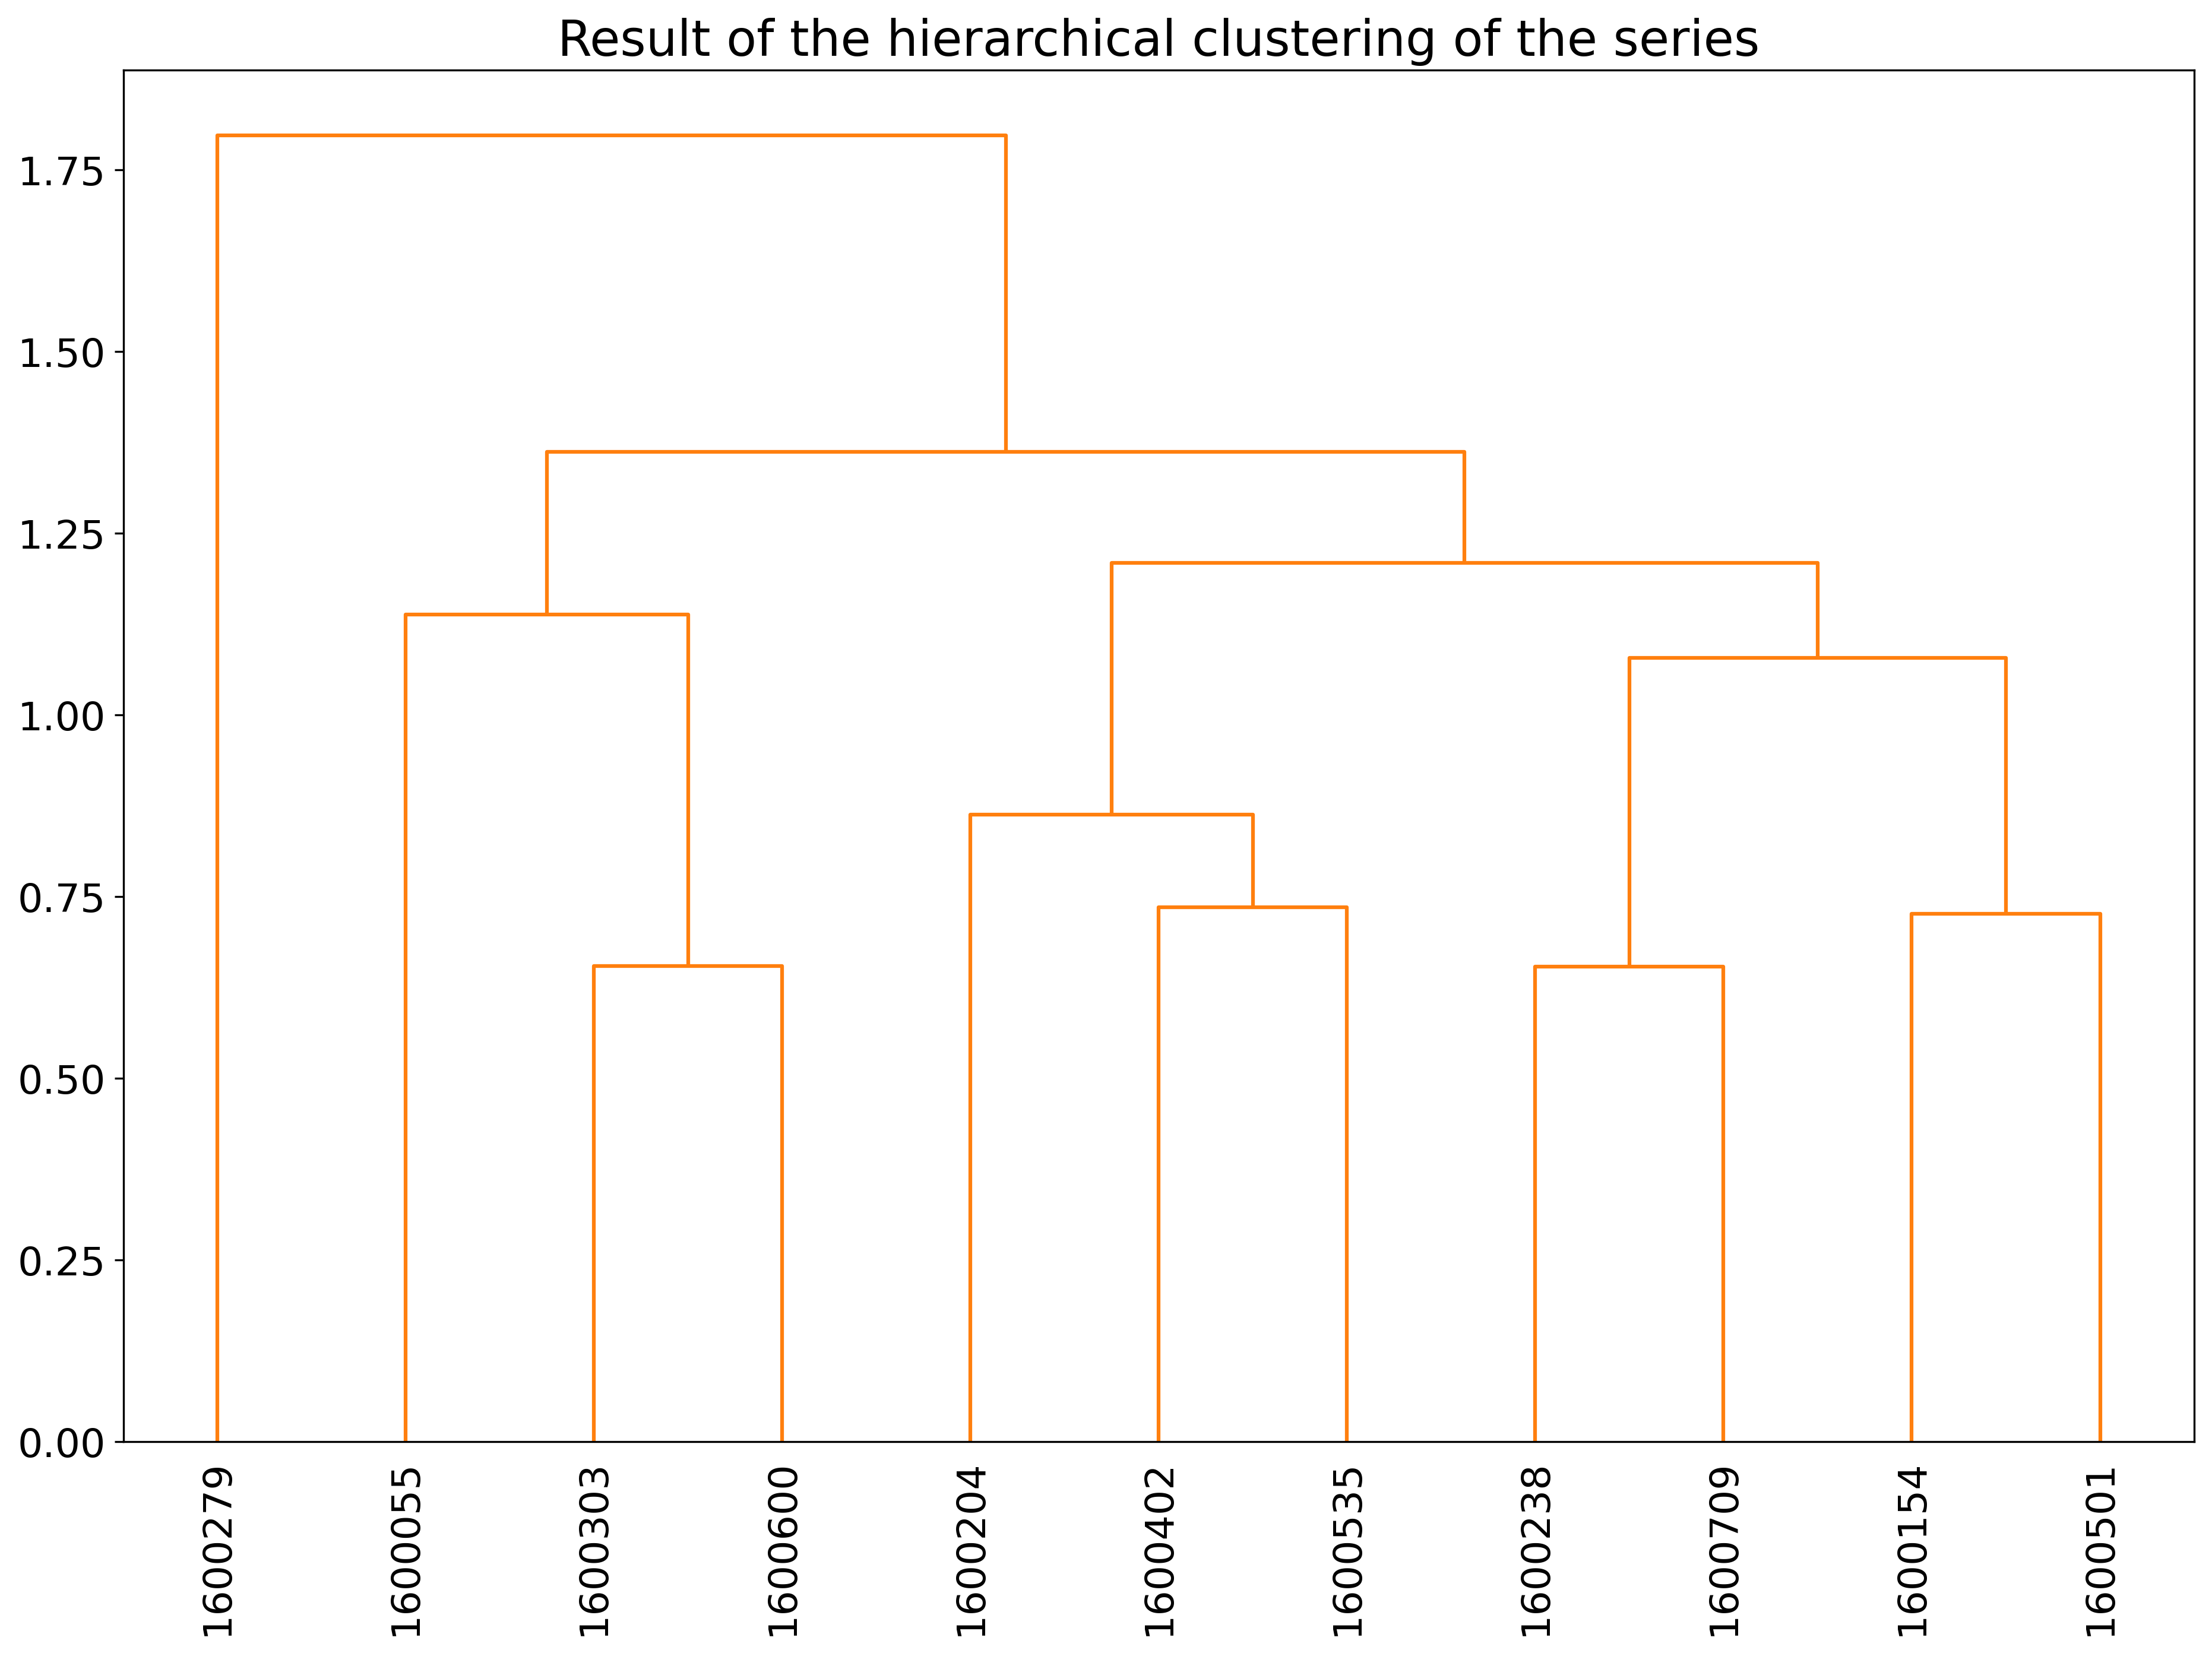

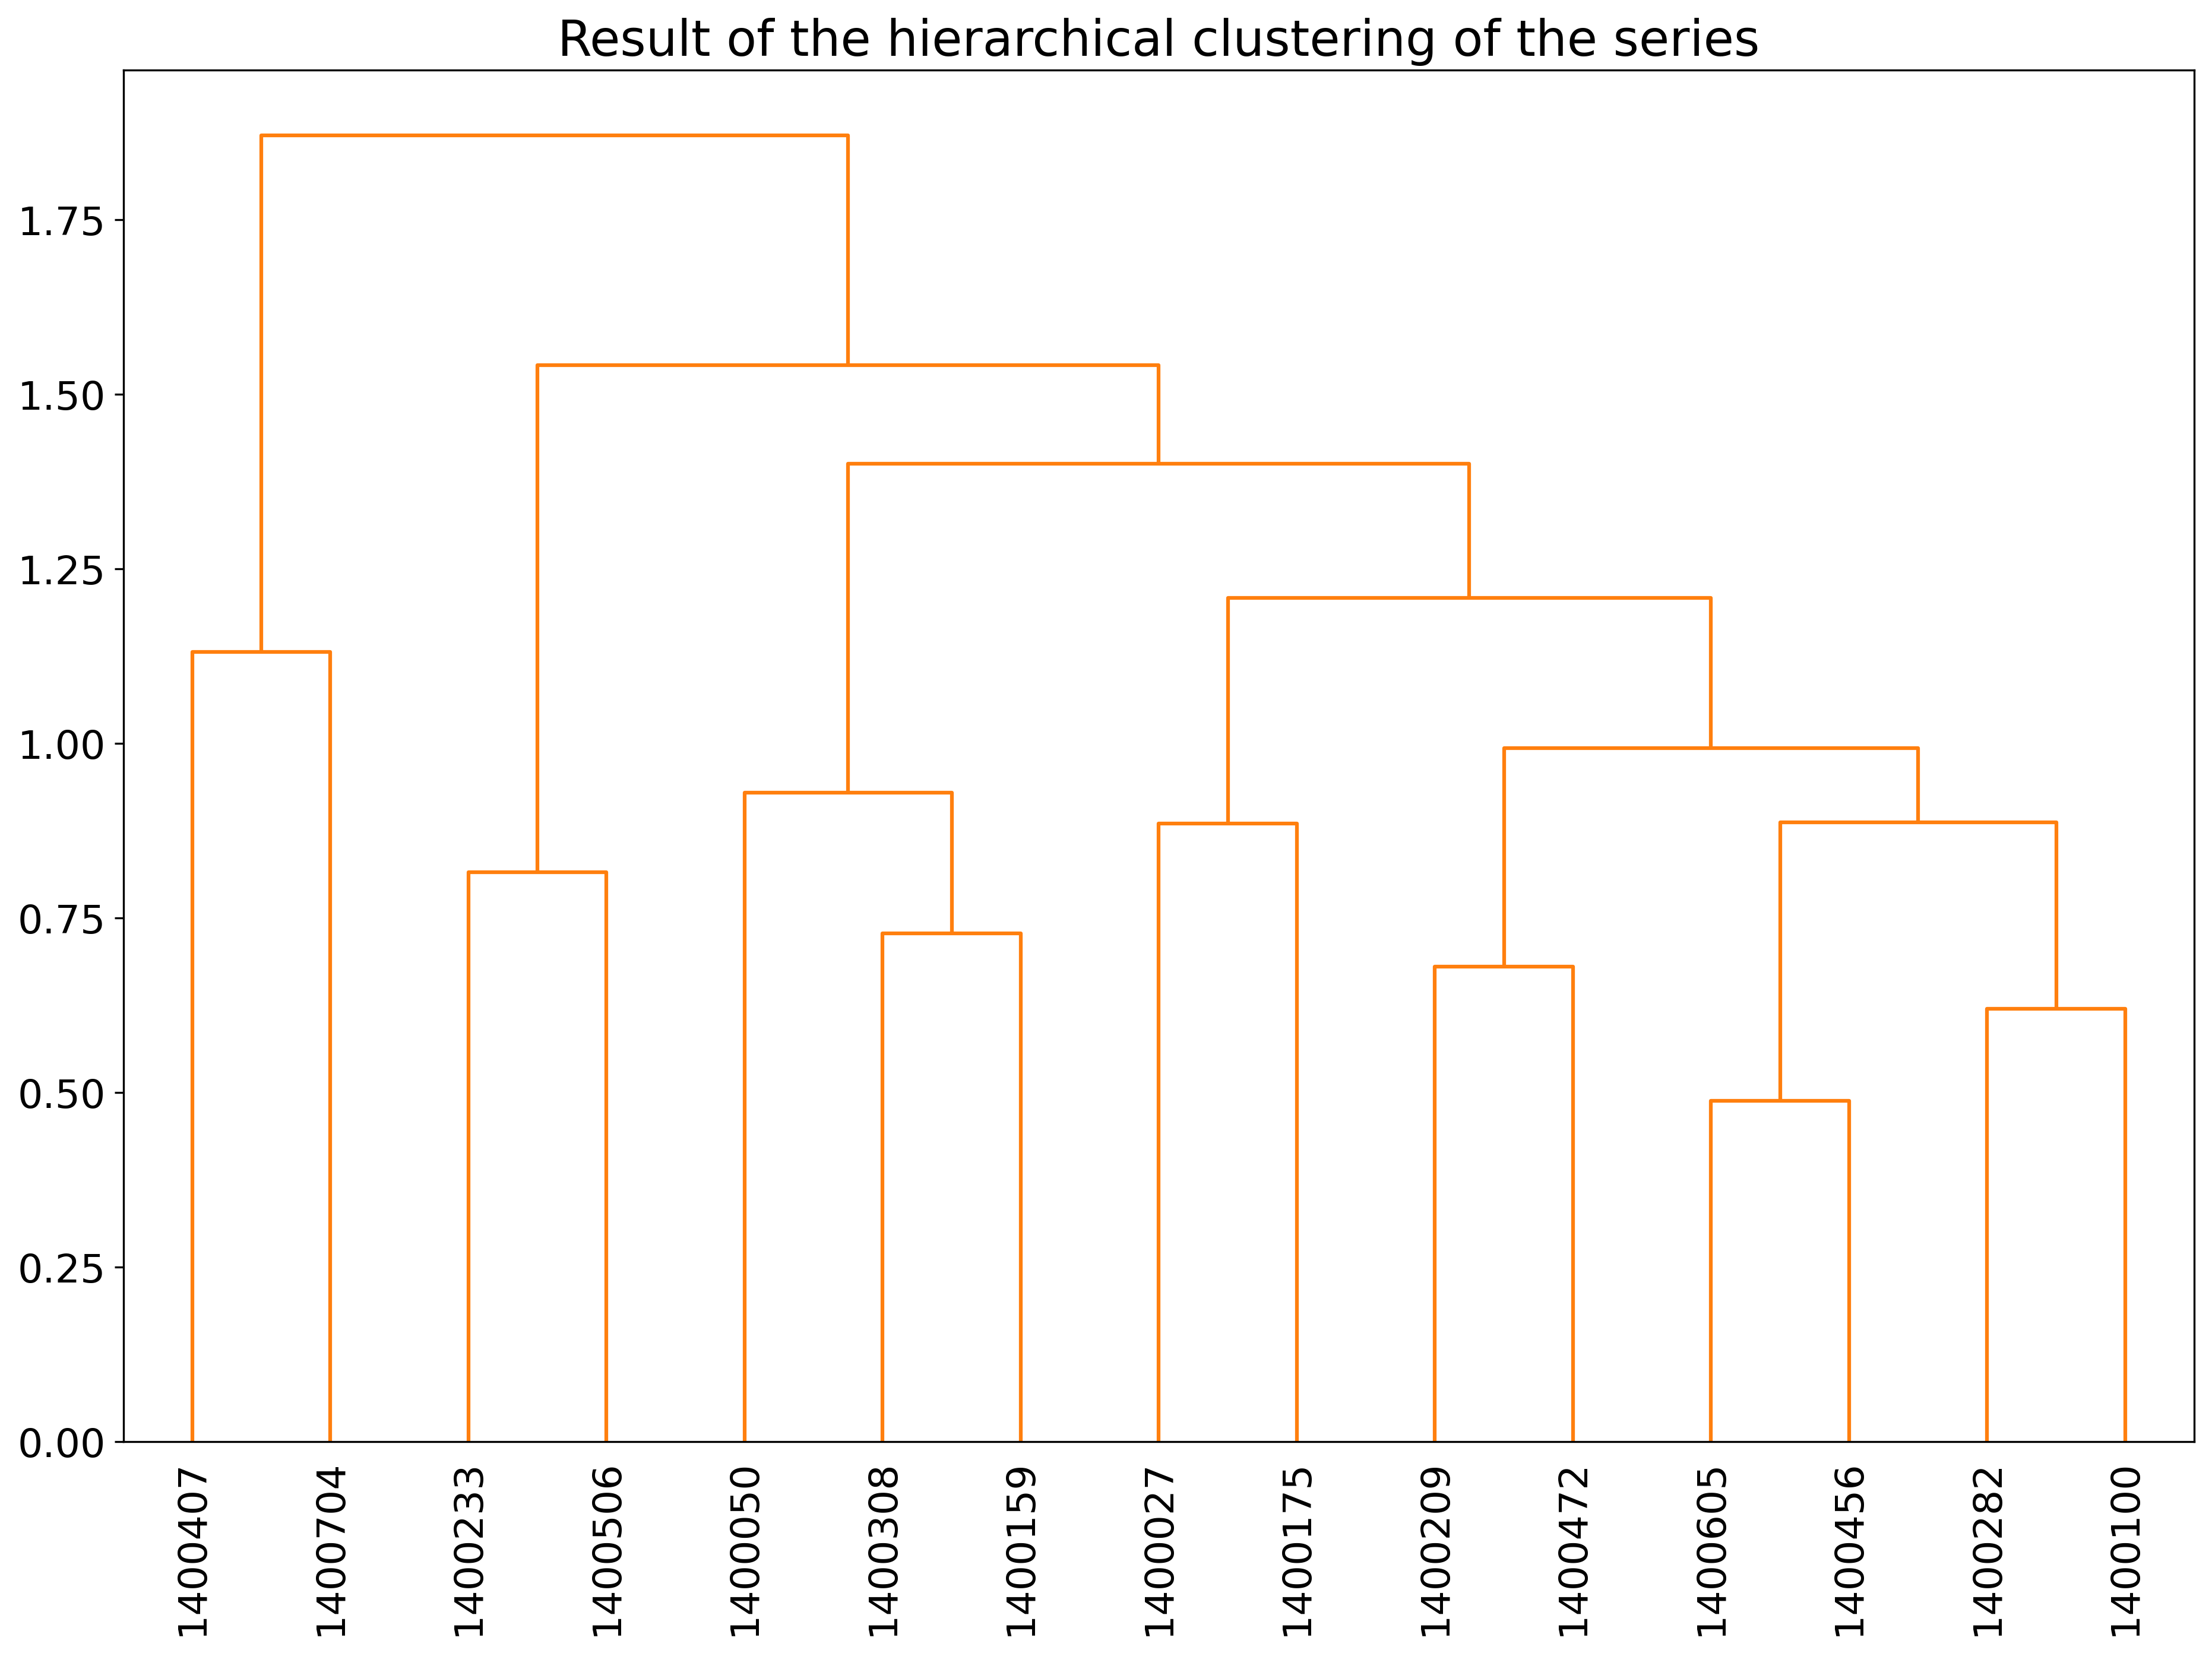

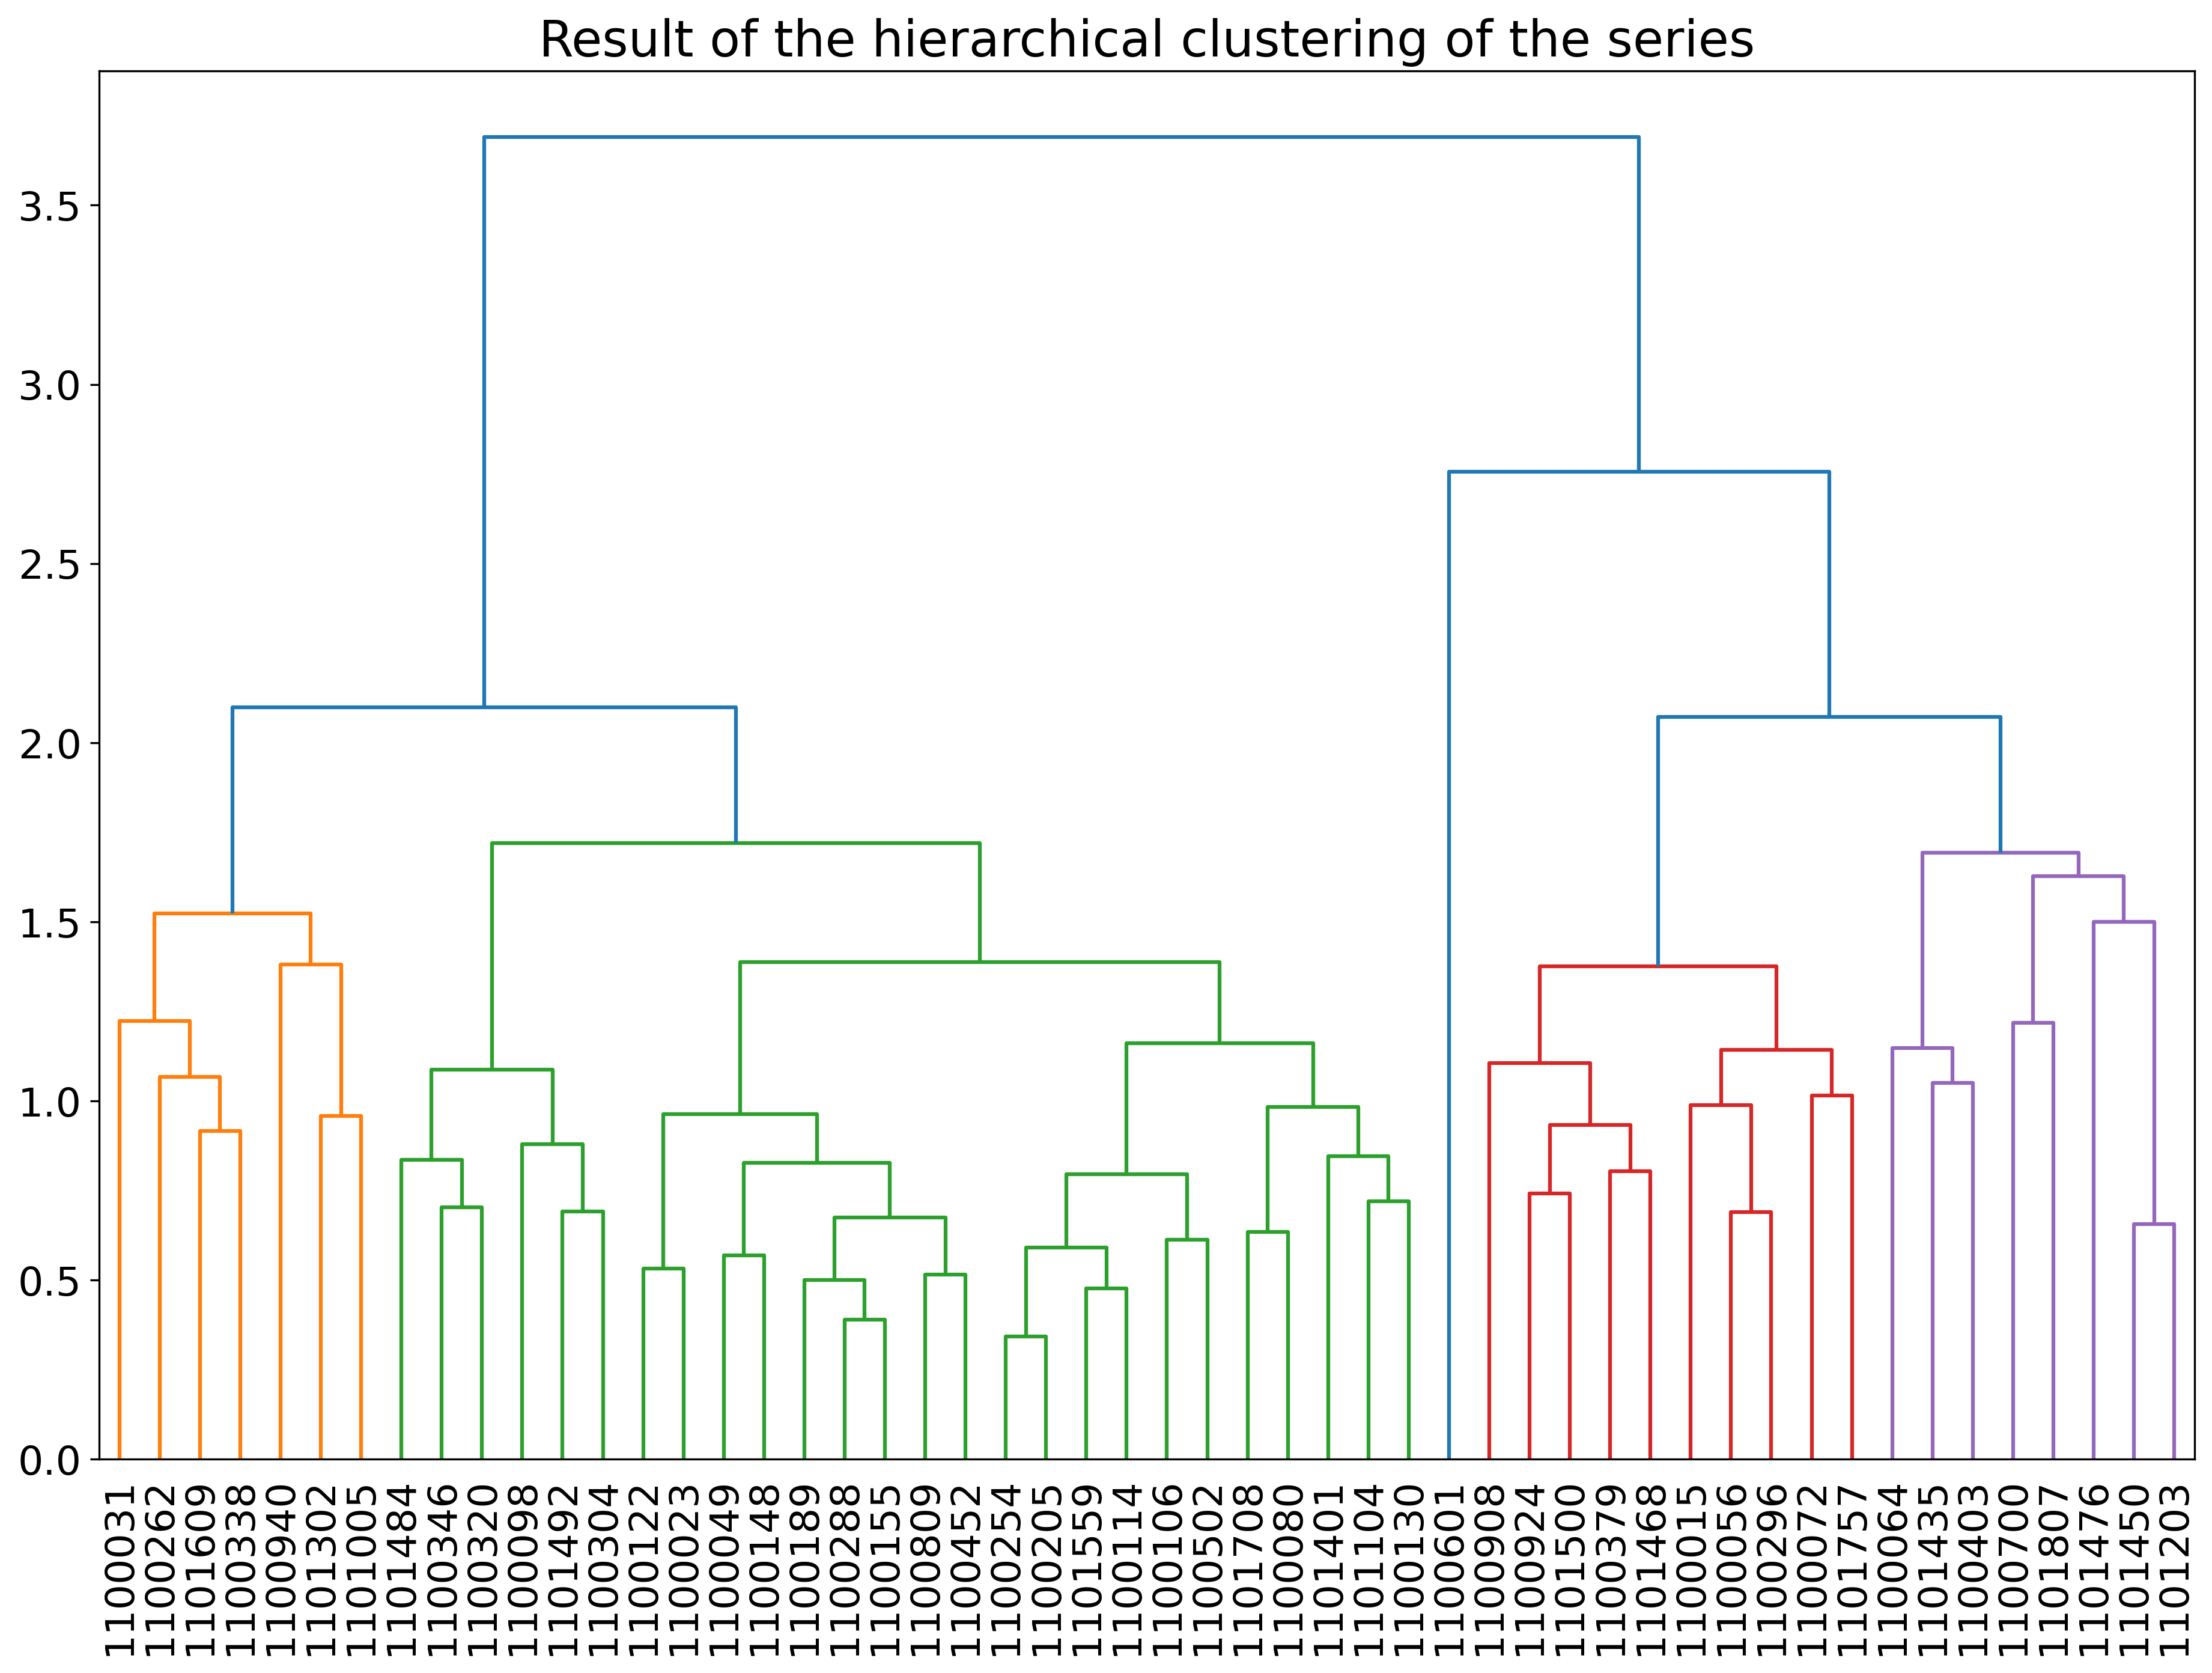

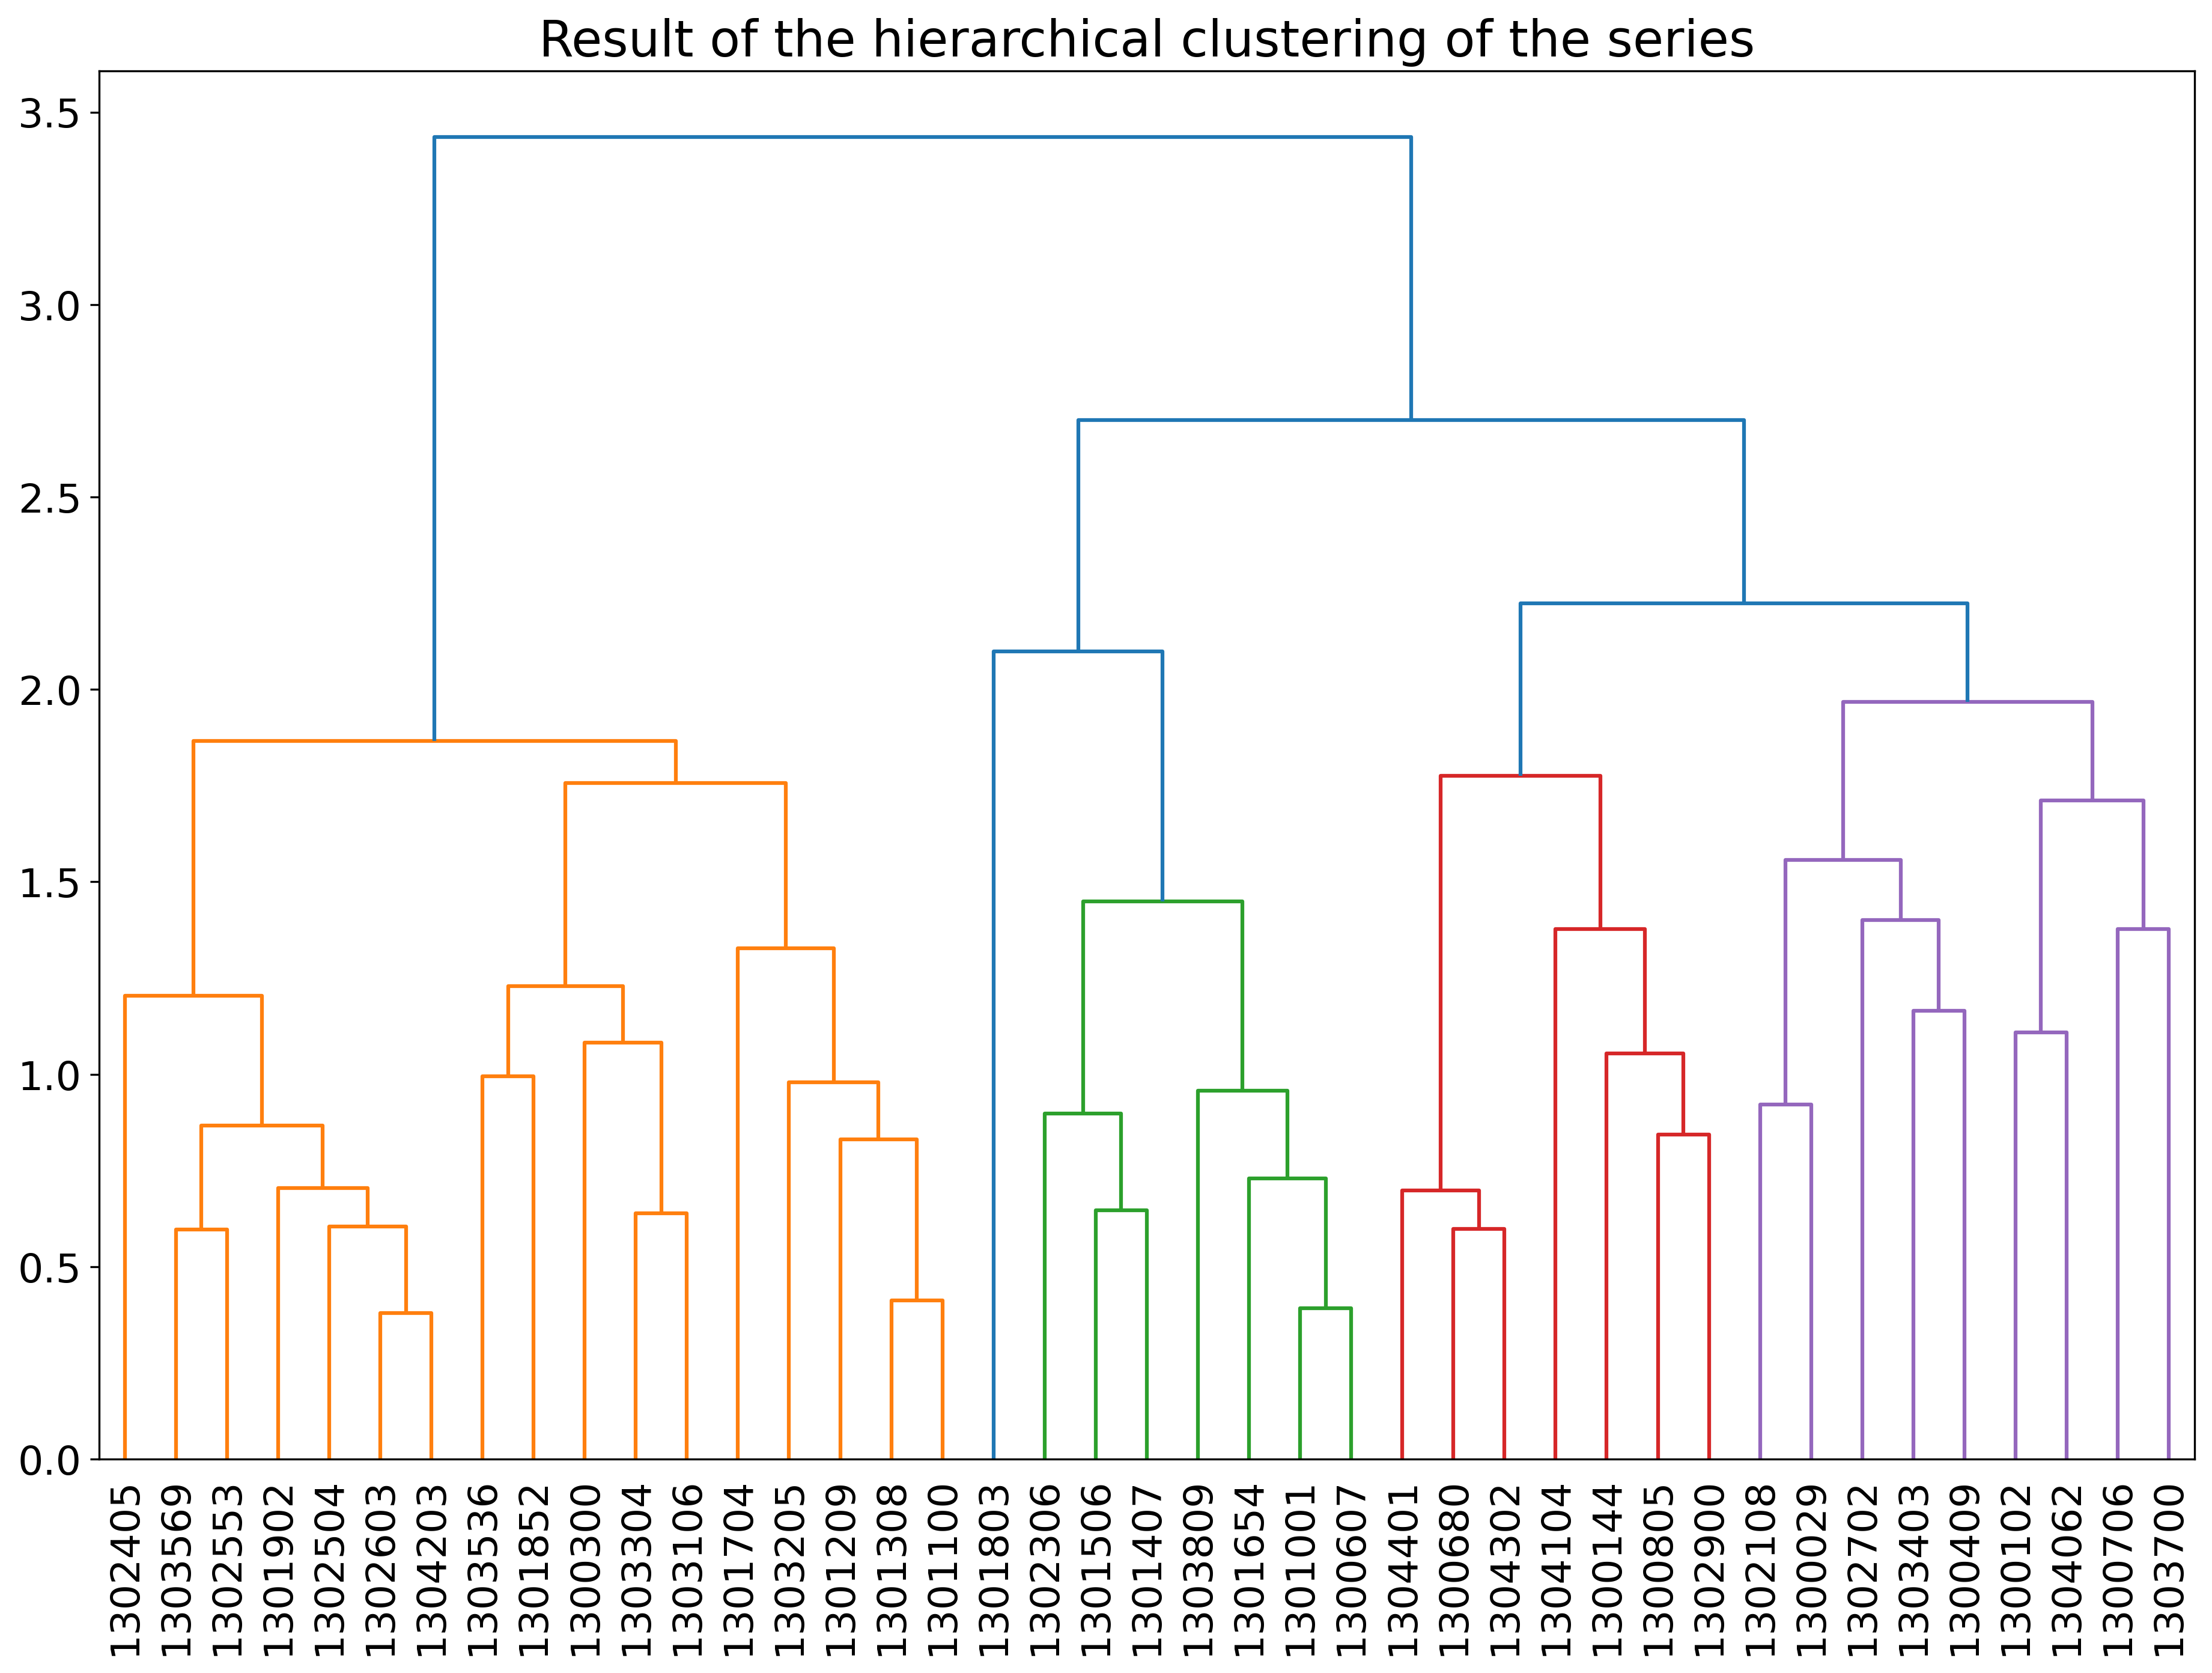

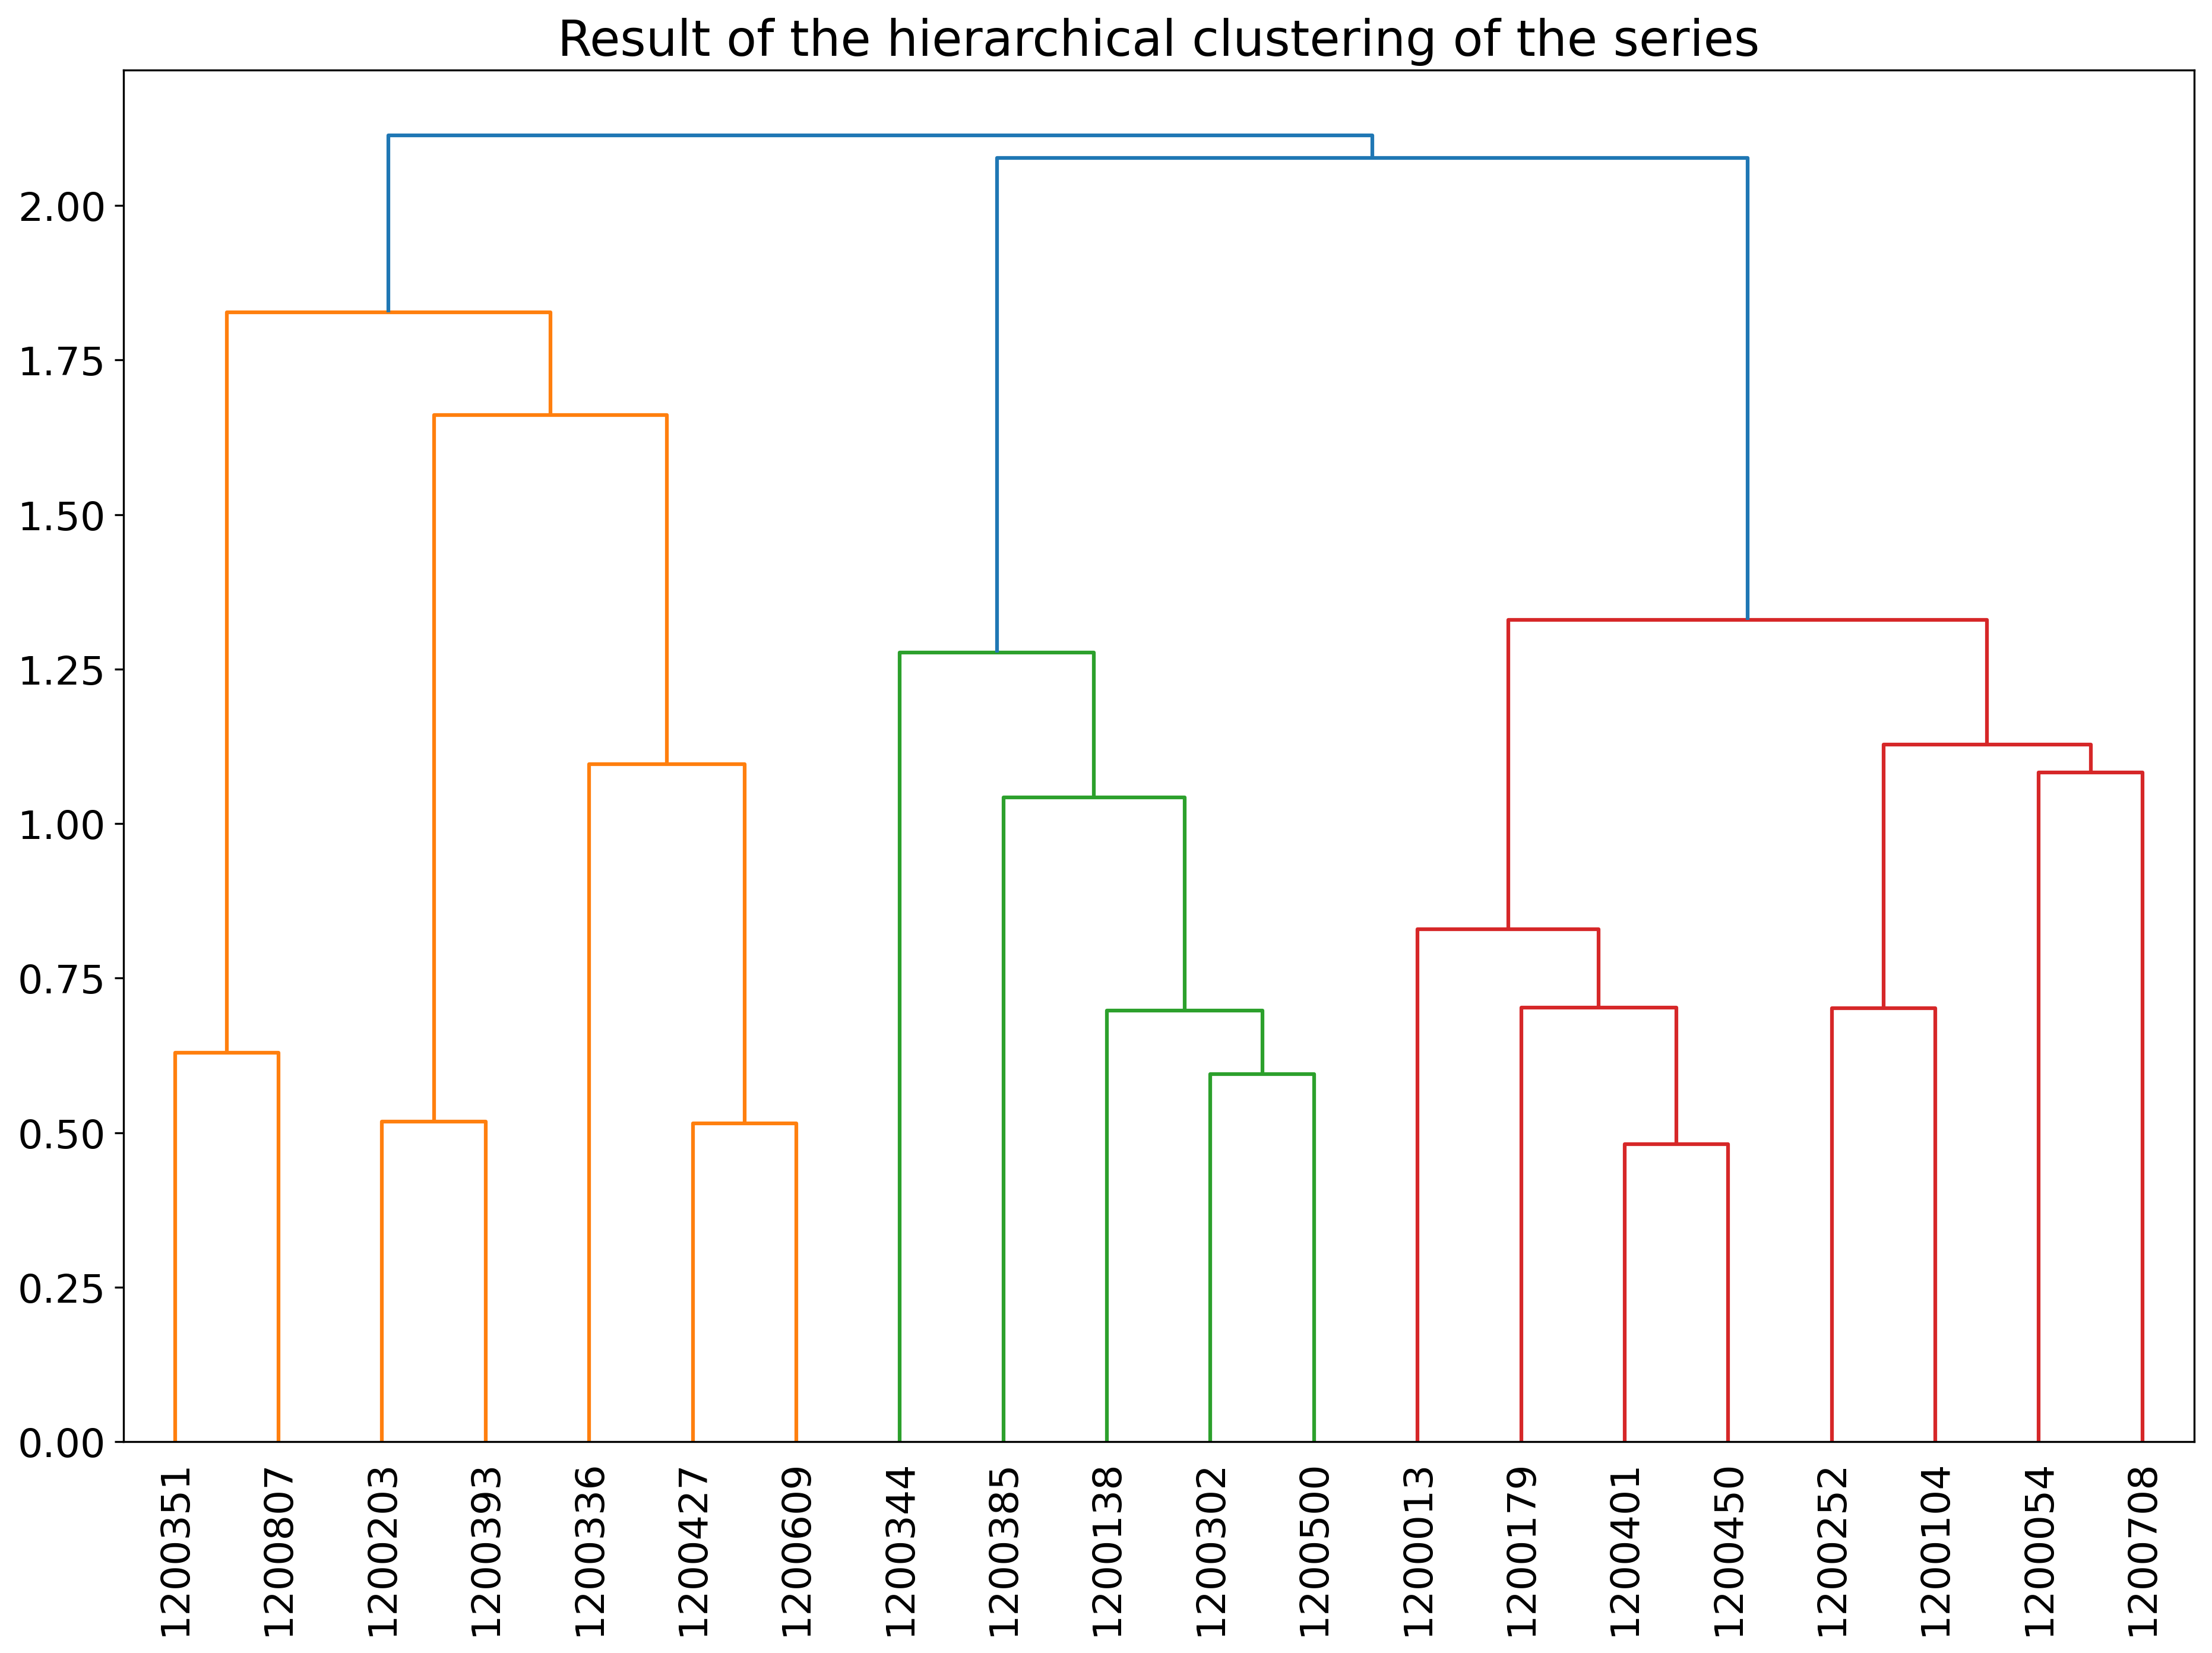

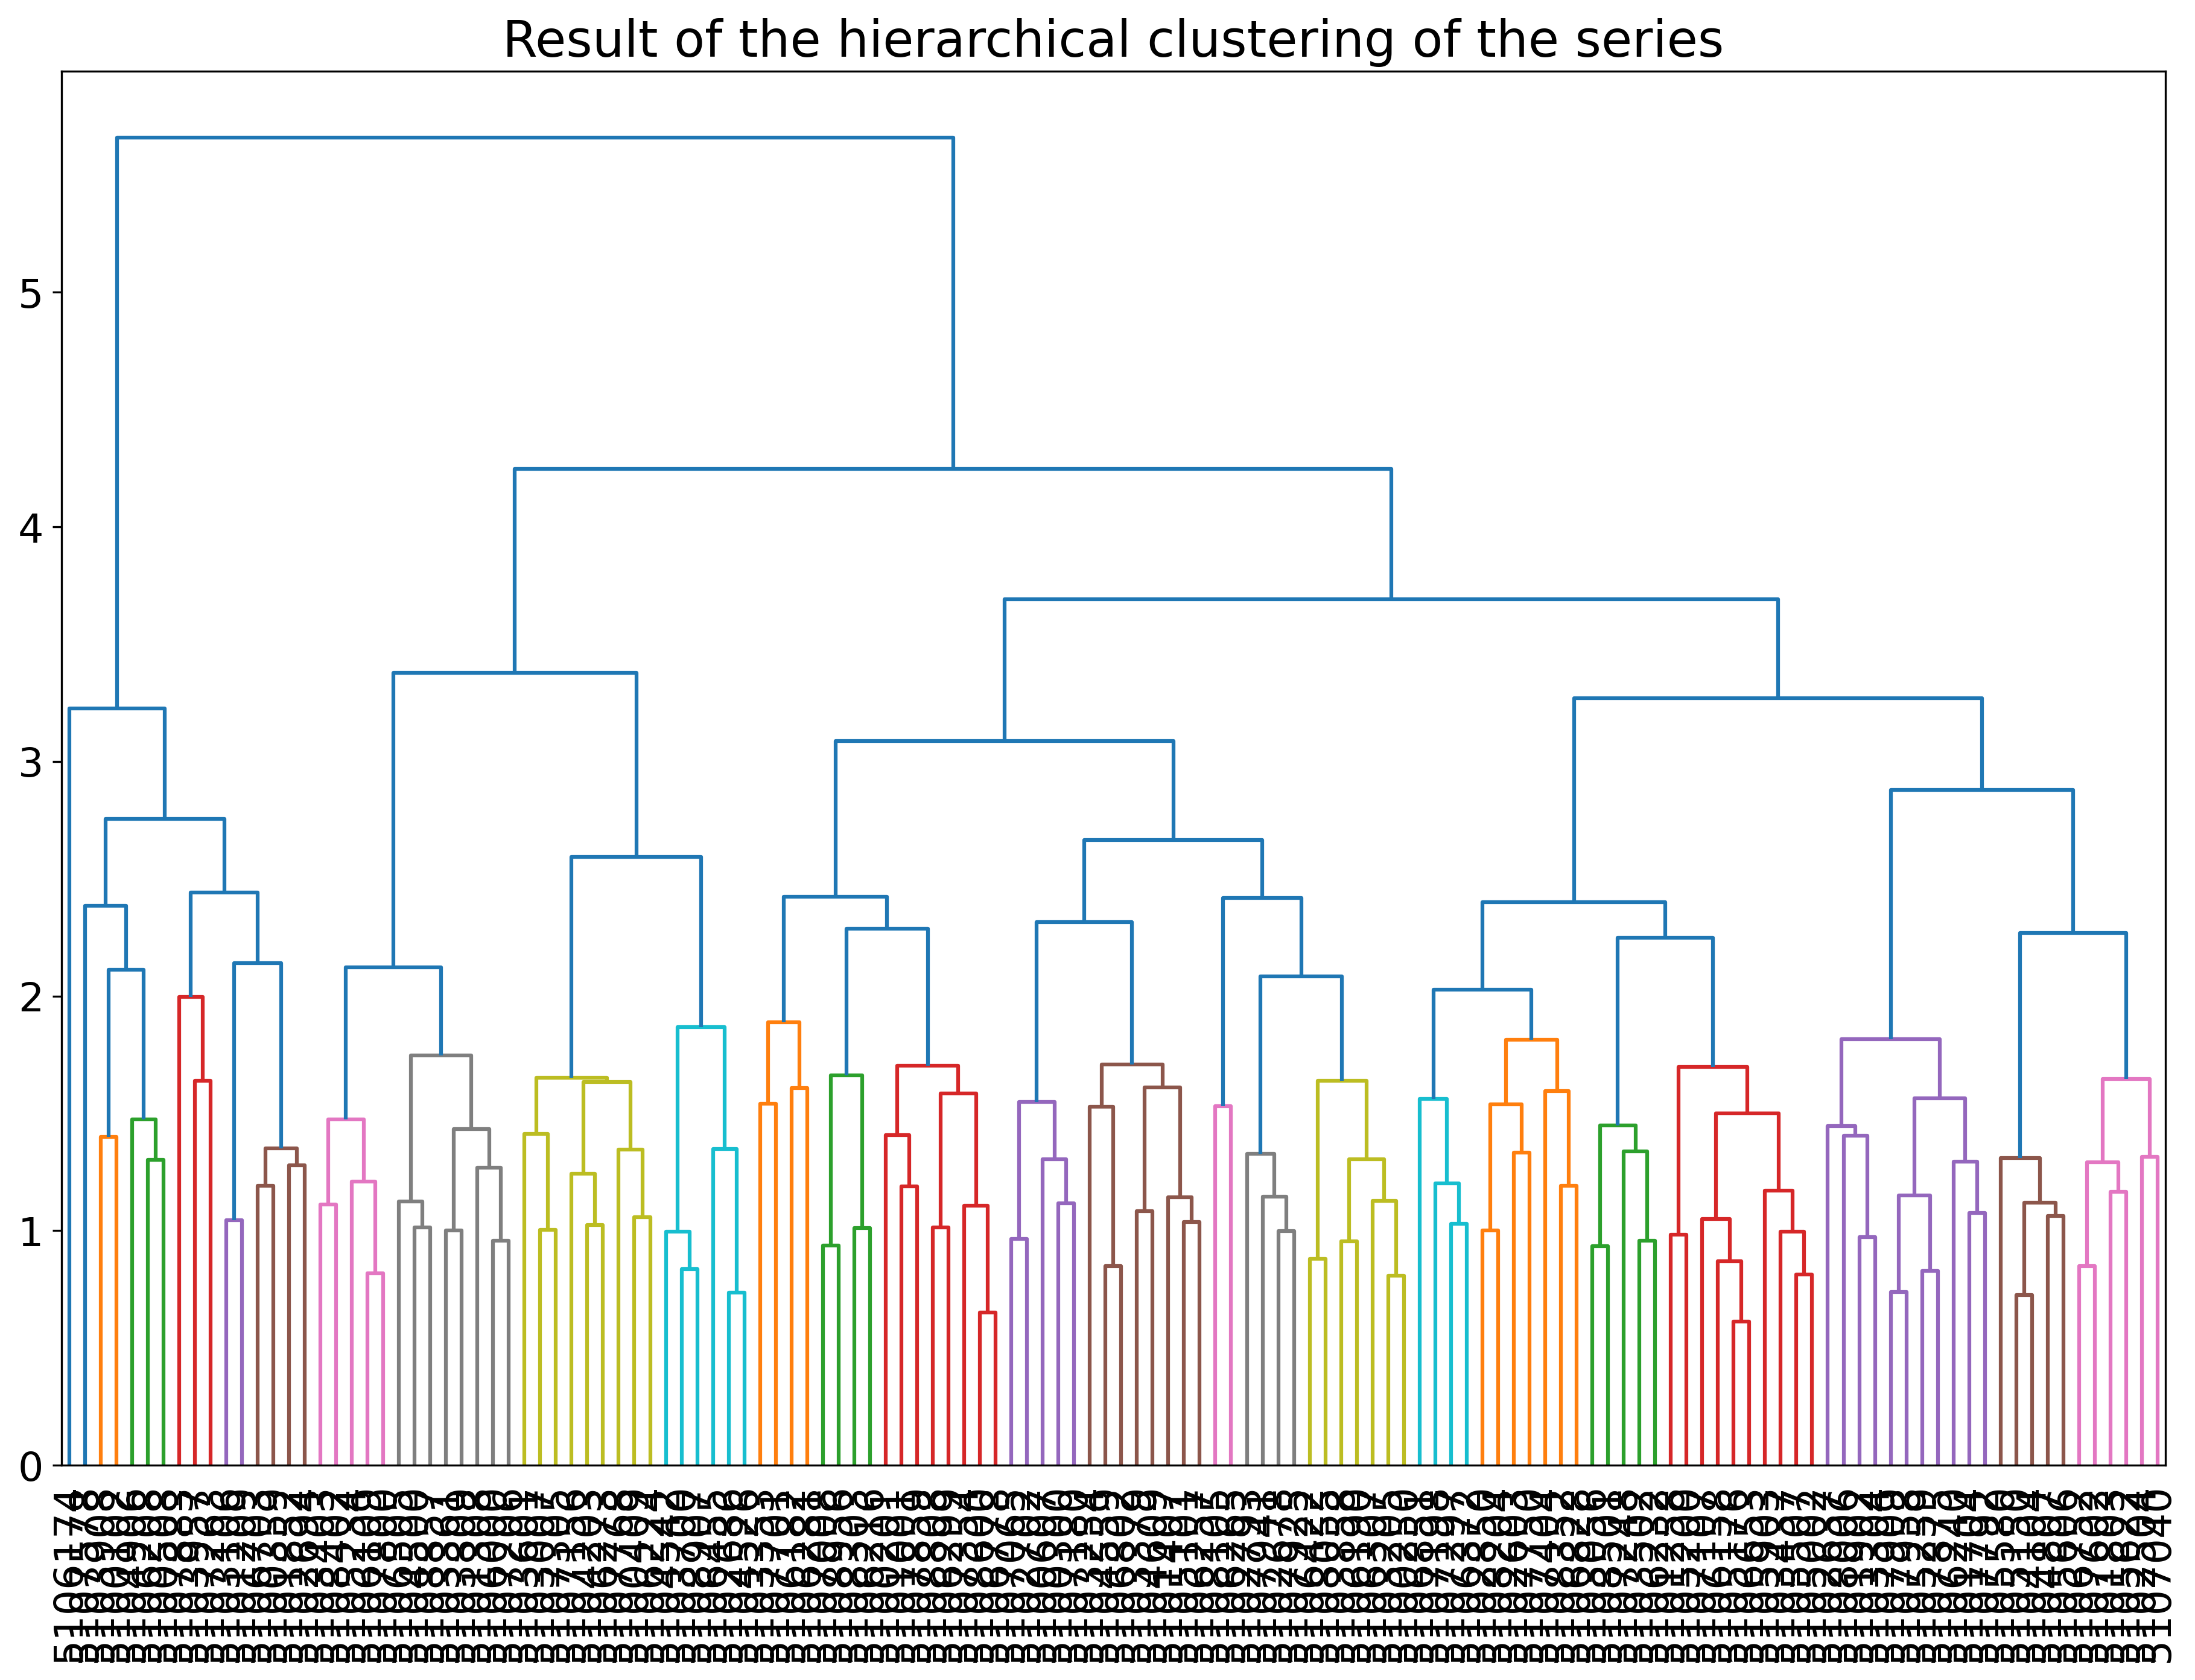

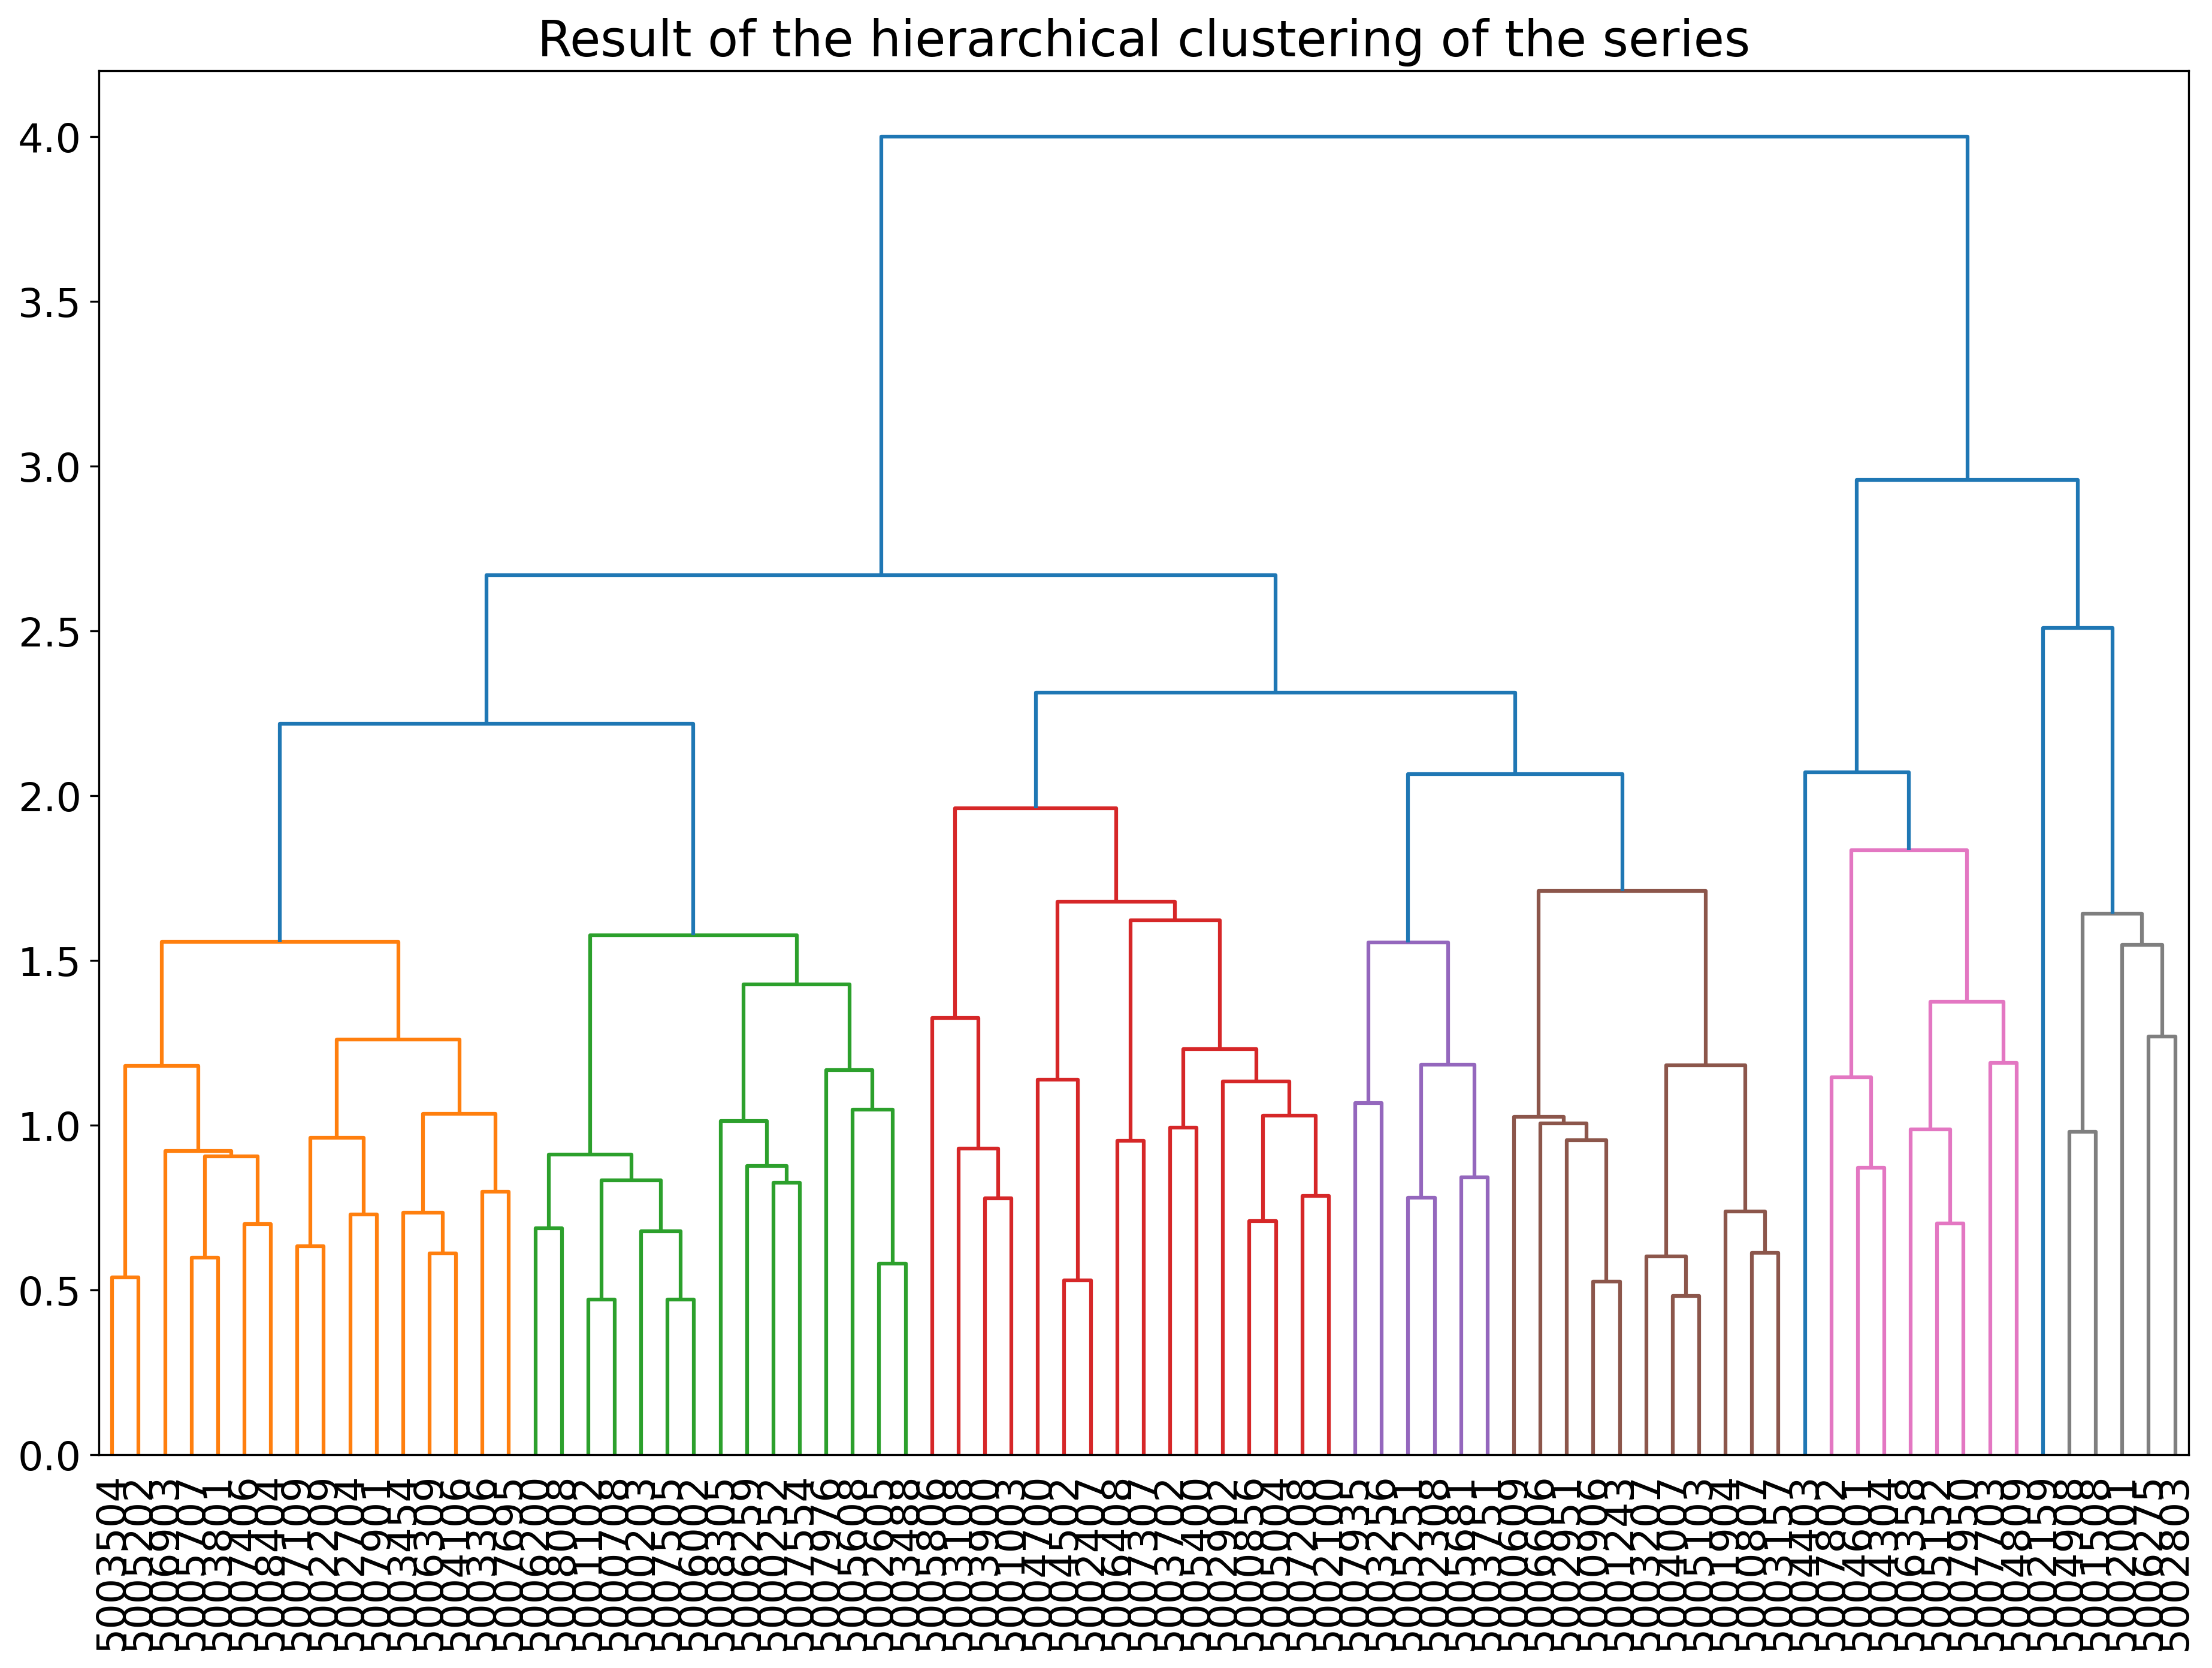

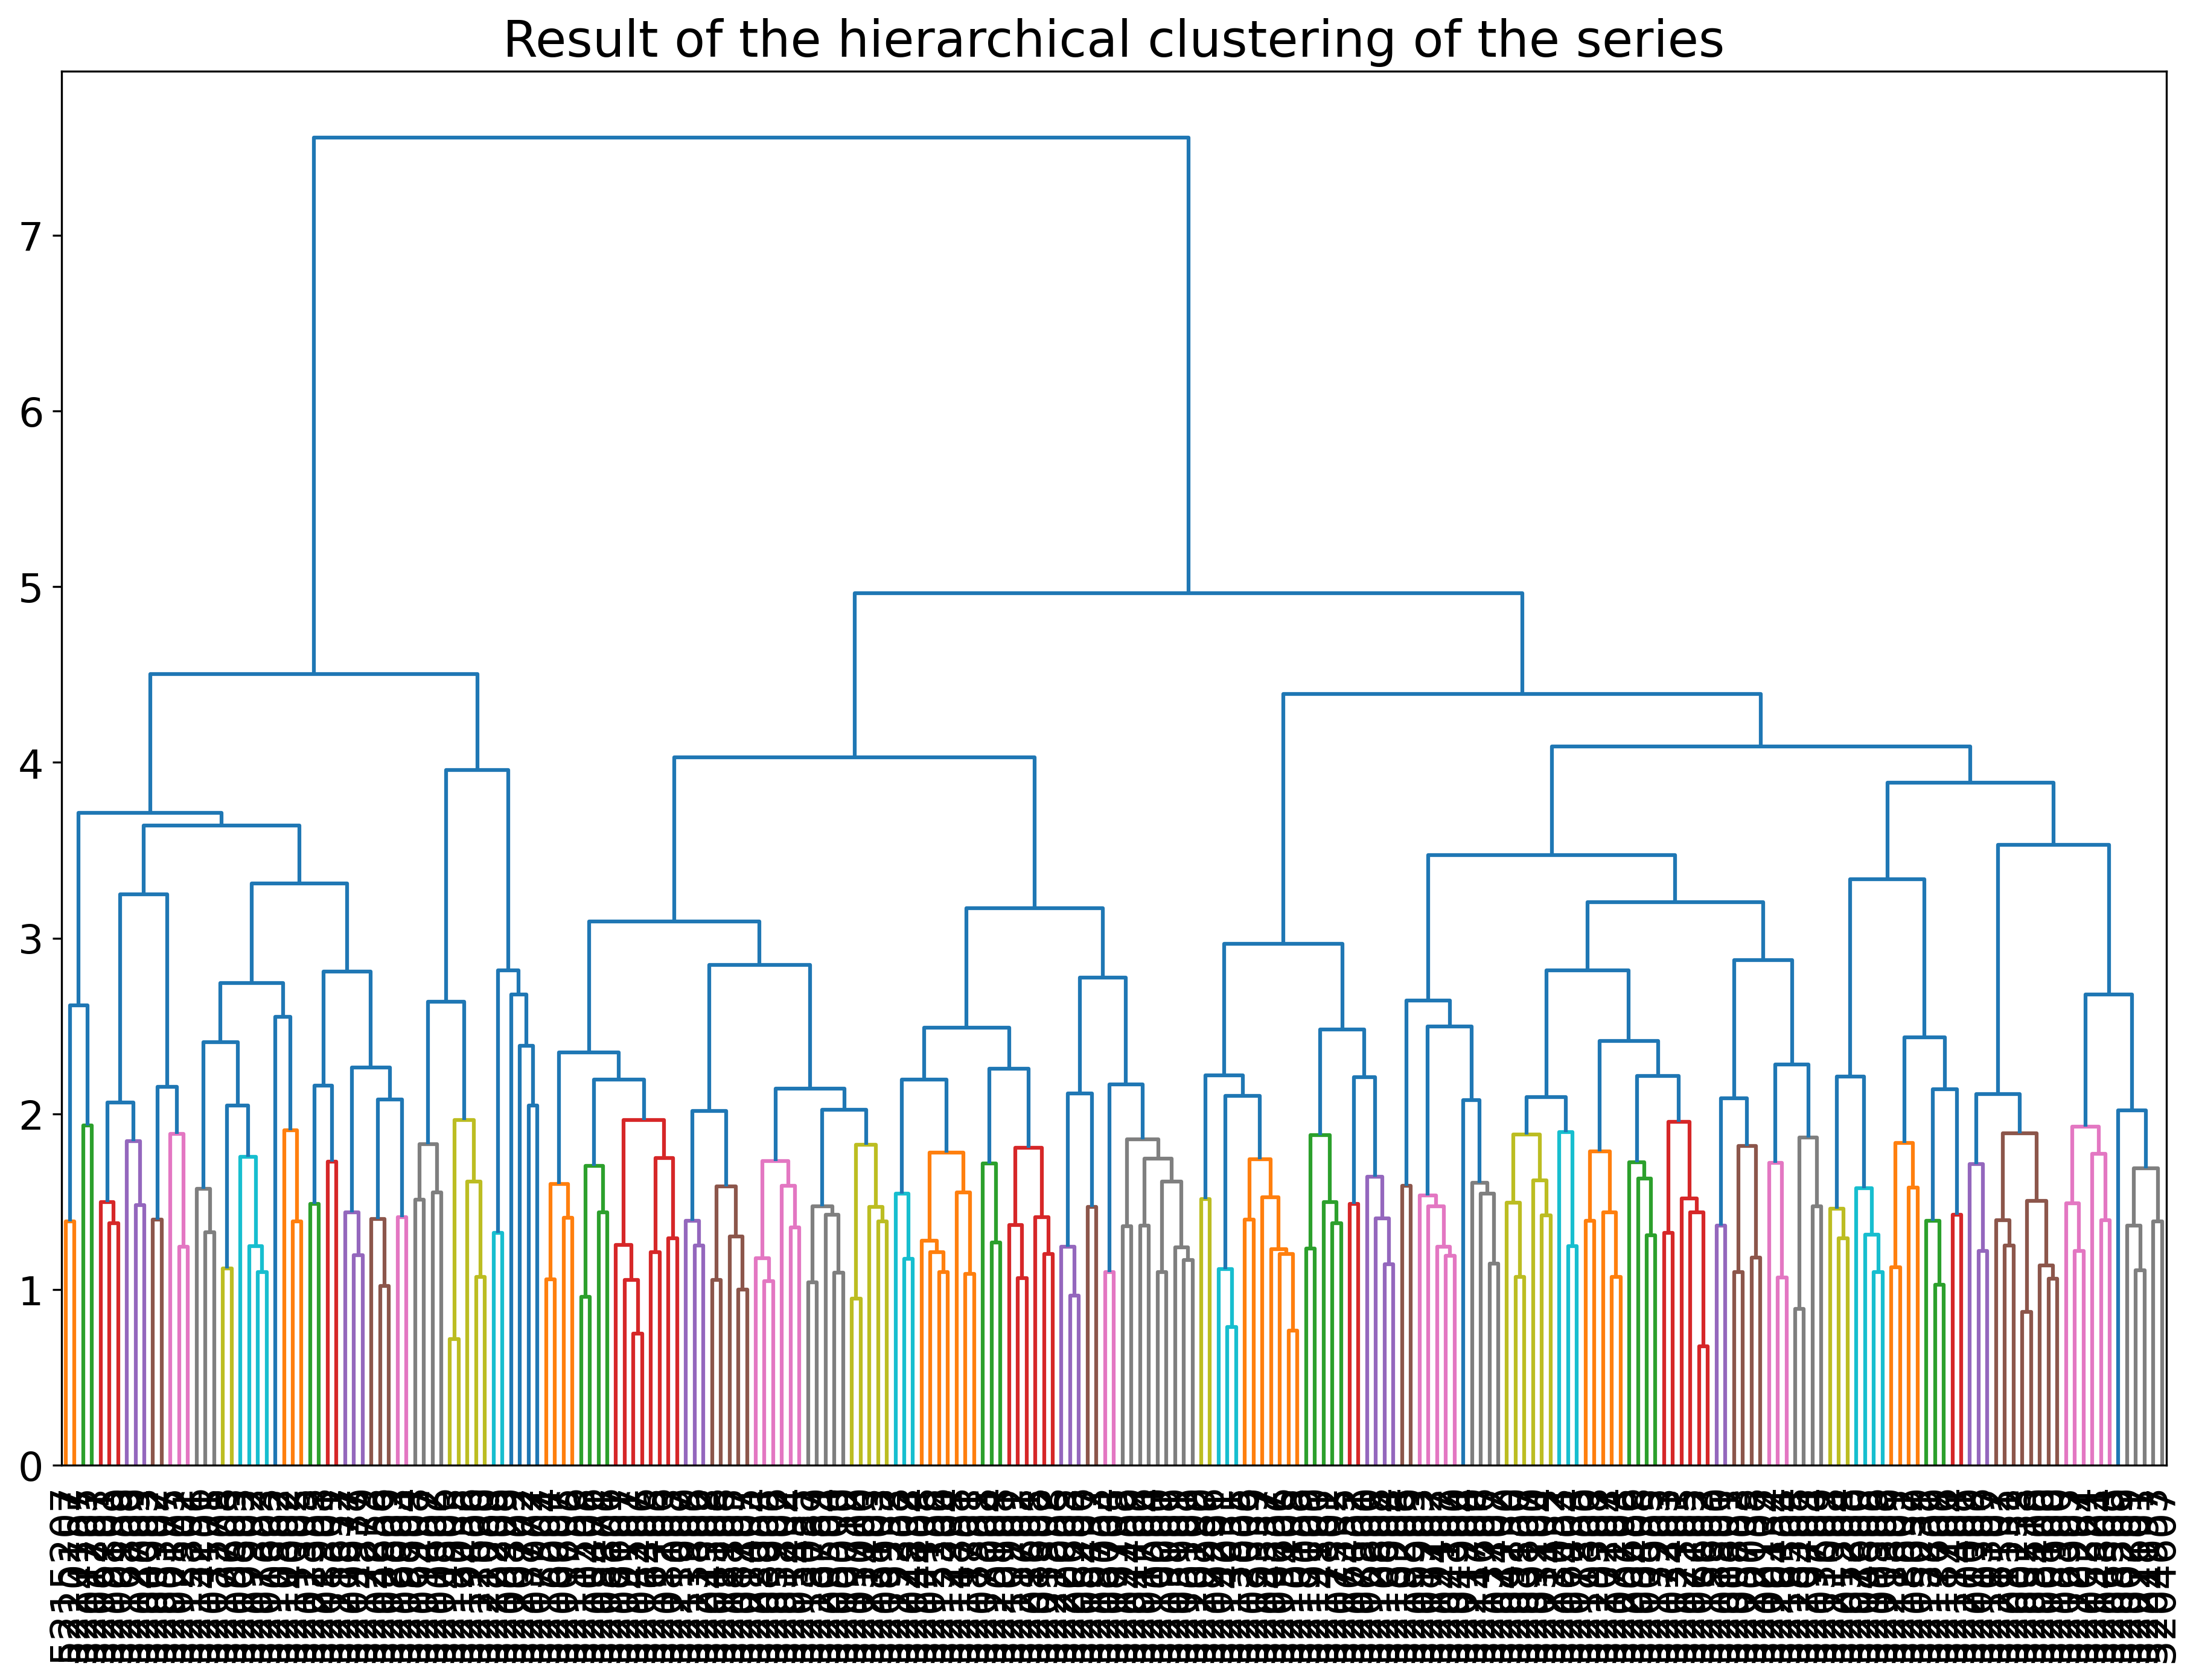

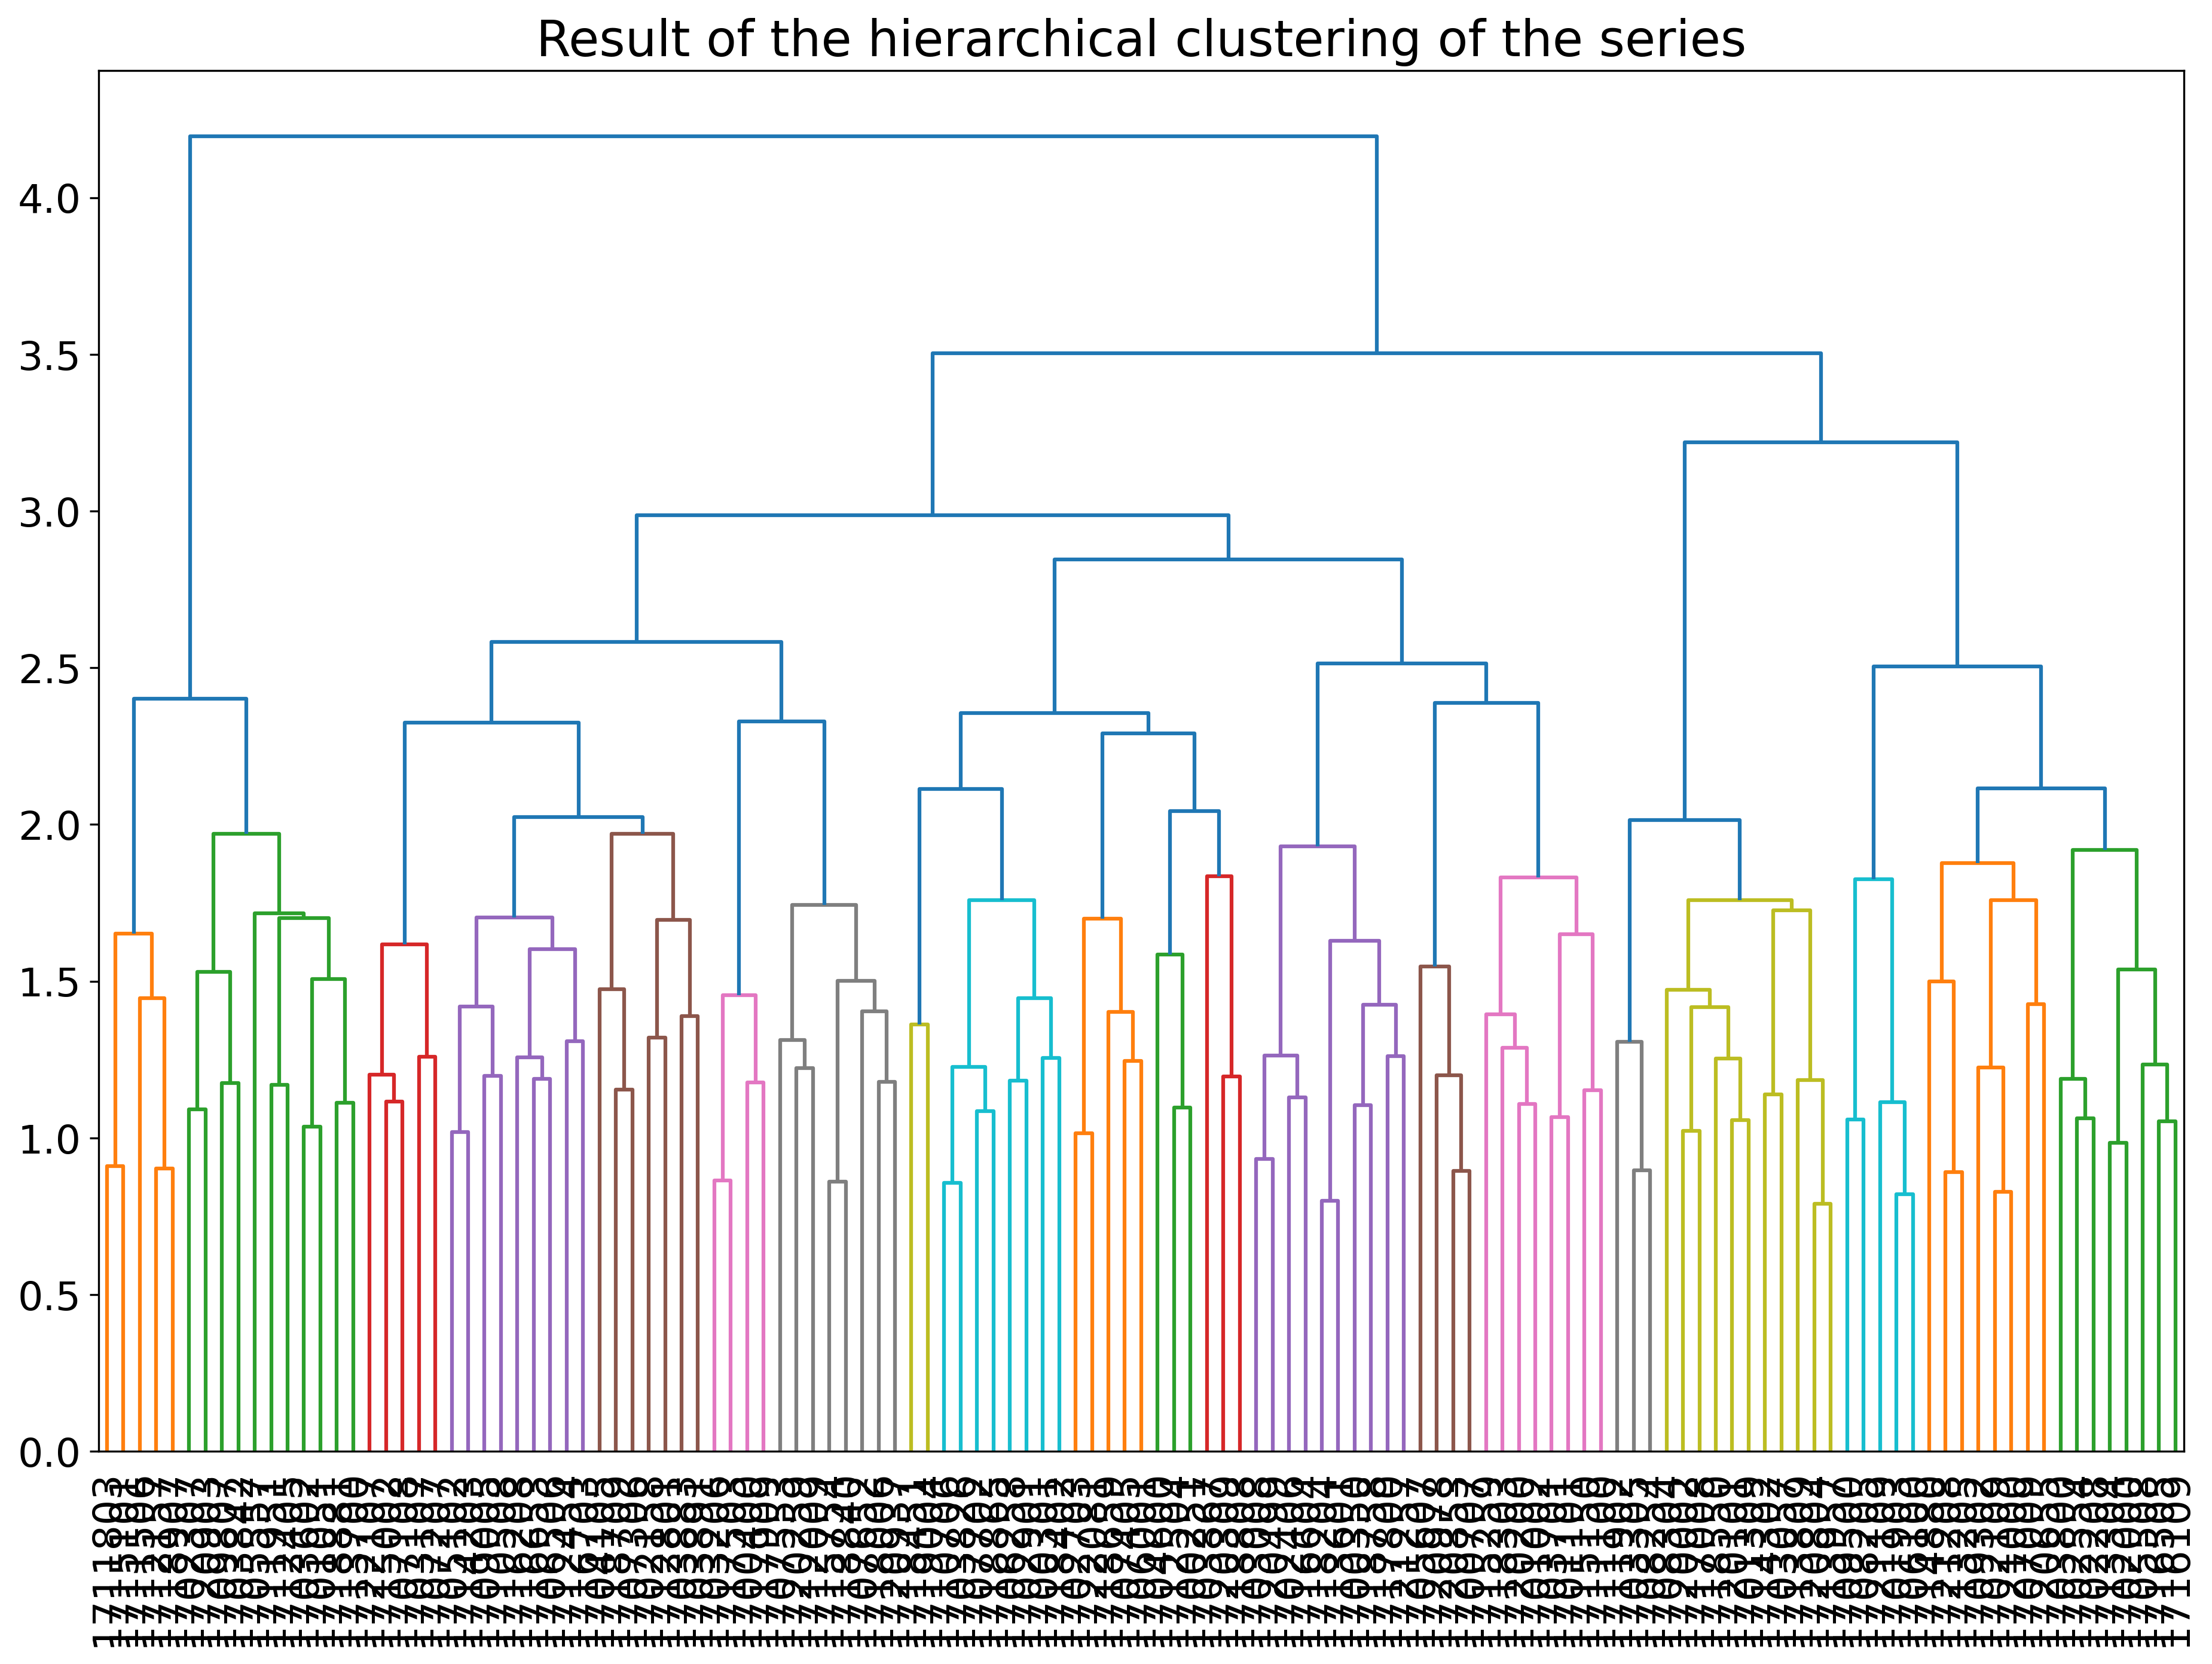

In [11]:
estados = {'RJ': 'Rio de Janeiro', 'ES': 'Espírito Santo', 'PR': 'Paraná', 'CE': 'Ceará',
               'MA': 'Maranhão', 'MG': 'Minas Gerais', 'SC': 'Santa Catarina', 'PE': 'Pernambuco', 
               'PB': 'Paraíba', 'RN': 'Rio Grande do Norte', 'PI': 'Piauí', 'AL': 'Alagoas',
               'SE': 'Sergipe', 'SP': 'São Paulo', 'RS': 'Rio Grande do Sul','PA': 'Pará',
               'AP': 'Amapá', 'RR': 'Roraima', 'RO': 'Rondônia', 'AM': 'Amazonas', 'AC': 'Acre',
               'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'GO': 'Goiás', 'TO': 'Tocantins',
               'DF': 'Distrito Federal', 'BA': 'Bahia'
               }


for state in estados.keys(): 
    
    df = get_data(state)
    
    df = df.loc[df.index.year <= 2020]

    for col in df.columns: 

        if sum(df[col]) <= 50:

            df.drop(col, axis =1, inplace = True)

        else:
            df.rename(columns = {col:col[-7:]}, inplace = True)

    clusters, fig = compute_clusters(df, lags = 10, t = 2, plot = True)
    
    with open(f'clusters/clusters_{state}.pkl', 'wb') as f:
        pickle.dump(clusters, f)